In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
hospital_df = pd.read_csv('train_data.csv')
hospital_df = hospital_df.drop('ID', axis=1)
hospital_df = hospital_df.drop('HealthServiceArea', axis=1)

In [3]:
hospital_df

Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1                  Medicaid         3700   
1                             1                  Medicaid         2900   
2                             1  Private Health Insurance         3200   
3                             1  Private Health Insurance         3300   
4                             1                  Medicaid         2600   
...                         ...                       ...          ...   
59961                         1    Blue Cross/Blue Shield         3600   
59962                         2    Blue Cross/Blue Shield         3300   
59963                         2    Blue Cross/Blue Shield         3400   
59964                         2                  Medicaid         3100   
59965                         2    Blue Cross/Blue Shield         3900   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
0                                N                 2611   
1                                N                 3242   
2                                N                 3155   
3                                N                 3155   
4                                N                 2611   
...                            ...                  ...   
59961                            N                 1826   
59962                            N                 1826   
59963                            N                 1826   
59964                            N                 1826   
59965                            N                 1826   

       AverageChargesInCounty  AverageCostInFacility  \
0                        9227                   1751   
1                        8966                   3338   
2                       11381                   4980   
3                       11381                   5826   
4                        9227                   6000   
...                       ...                    ...   
59961                    4190                   1551   
59962                    4190                   1551   
59963                    4190                   1551   
59964                    4190                   1551   
59965                    4190                   1551   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
0                          8951                      45             1  
1                          6409                      34             1  
2                          9323                      45             1  
3                         15680                      59             1  
4                         14344                      59             1  
...                         ...                     ...           ...  
59961                      3715                      36             4  
59962                      3715                      55             6  
59963                      3715                      55             4  
59964                      3715                      55             4  
59965                      3715                      3

# Exploratory Data Analysis

### Strategy

 - Basic statistics on all the variables are obtained
 - The numerical and categorical variables are separated in order to explore and understand them better 
 - The distribution of each variable is plotted to understand the spread better
 - The relationship of each variable with the target is analyzed
 - The relationship of each variable with each other variable is analyzed


In [4]:
hospital_df.shape

(59966, 14)

In [5]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

<span style="font-size:1em;">✔</span> **Observations:**

- There are no missing values in the dataset, so we don't have to do anything to deal with it

In [6]:
hospital_df.describe()

CCSProcedureCode  APRSeverityOfIllnessCode   BirthWeight  \
count      59966.000000              59966.000000  59966.000000   
mean         155.404229                  1.254594   3336.298903   
std           89.541978                  0.546207    446.244475   
min           -1.000000                  1.000000   2500.000000   
25%          115.000000                  1.000000   3000.000000   
50%          220.000000                  1.000000   3300.000000   
75%          228.000000                  1.000000   3600.000000   
max          231.000000                  4.000000   7500.000000   

       AverageCostInCounty  AverageChargesInCounty  AverageCostInFacility  \
count         59966.000000            59966.000000           59966.000000   
mean           2372.806690             7979.126922            2396.414318   
std             639.755096             3220.291347            1248.501189   
min             712.000000             1243.000000             457.000000   
25%            2041.000000             4620.000000            1551.000000   
50%            2533.000000             9227.000000            1967.000000   
75%            2785.000000            10644.000000            2895.000000   
max            3242.000000            11381.000000            8114.000000   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
count              59966.000000            59966.000000  59966.000000  
mean                7958.472668               59.811143      2.538405  
std                 3859.294711               21.470170      1.171246  
min                 1120.000000               28.000000      1.000000  
25%                 4438.000000               45.000000      2.000000  
50%                 7945.000000               55.000000      2.000000  
75%                11619.000000               74.000000      3.000000  
max                18466.000000              115.000000     10.000000

<span style="font-size:1em;">✔</span> **Observations:**
- Each numerical variable here has very different range (minimum and maximum value), thus they will have to be scaled/normalized
- Some categorical variables such as 'CCSProcedureCode', 'APRSeverityOfIllnessCode', and 'LengthOfStay' are included as numerical here, they will have to be converted to string and later one-hot encoded
- Most babies in the dataset weigh 3.3 (+/- 0.4) kg
- On average most babies stay in the hospital for 2 and a half days, which is also below 4 within 1 standard deviation 

In [7]:
# We now convert the target variable to two separate classes
hospital_df.loc[hospital_df['LengthOfStay'] < 4, 'LengthOfStay'] = 0
hospital_df.loc[hospital_df['LengthOfStay'] >= 4, 'LengthOfStay'] = 1

In [8]:
hospital_df

Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0          F              Other Race         Newborn               228   
1          M  Black/African American         Newborn               228   
2          M              Other Race         Newborn               220   
3          F              Other Race         Newborn                 0   
4          F              Other Race         Newborn               228   
...      ...                     ...             ...               ...   
59961      M  Black/African American         Newborn               115   
59962      M                   White         Newborn               115   
59963      M                   White         Newborn               115   
59964      M                   White         Newborn                -1   
59965      F                   White         Newborn               231   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                             1                  Medicaid         3700   
1                             1                  Medicaid         2900   
2                             1  Private Health Insurance         3200   
3                             1  Private Health Insurance         3300   
4                             1                  Medicaid         2600   
...                         ...                       ...          ...   
59961                         1    Blue Cross/Blue Shield         3600   
59962                         2    Blue Cross/Blue Shield         3300   
59963                         2    Blue Cross/Blue Shield         3400   
59964                         2                  Medicaid         3100   
59965                         2    Blue Cross/Blue Shield         3900   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
0                                N                 2611   
1                                N                 3242   
2                                N                 3155   
3                                N                 3155   
4                                N                 2611   
...                            ...                  ...   
59961                            N                 1826   
59962                            N                 1826   
59963                            N                 1826   
59964                            N                 1826   
59965                            N                 1826   

       AverageChargesInCounty  AverageCostInFacility  \
0                        9227                   1751   
1                        8966                   3338   
2                       11381                   4980   
3                       11381                   5826   
4                        9227                   6000   
...                       ...                    ...   
59961                    4190                   1551   
59962                    4190                   1551   
59963                    4190                   1551   
59964                    4190                   1551   
59965                    4190                   1551   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
0                          8951                      45             0  
1                          6409                      34             0  
2                          9323                      45             0  
3                         15680                      59             0  
4                         14344                      59             0  
...                         ...                     ...           ...  
59961                      3715                      36             1  
59962                      3715                      55             1  
59963                      3715                      55             1  
59964                      3715                      55             1  
59965                      3715                      3

<span style="font-size:1em;">✔</span> **Observations:**
 
- 'Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode', 'PaymentTypology', 'EmergencyDepartmentIndicator', 'LengthOfStay' are all nominal categorical variables
- 'APRSeverityOfIllnessCode' is an ordinal categorical variable
- 'BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode' are numerical variables

## Data Distribution

Before plotting the histograms, it's worth looking at the unique values in each variable to understand what kind of data the variable has - some variables may have numeric values but they may not necessarily represent real numbers (e.g. CCSProcedureCode)

In [9]:
for column in hospital_df.columns:
    print(column + ": " + str(hospital_df[column].unique()))
    print(hospital_df[column].value_counts())
    print()

Gender: ['F' 'M' 'U']
M    30978
F    28987
U        1
Name: Gender, dtype: int64

Race: ['Other Race' 'Black/African American' 'White' 'Multi-racial']
White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64

TypeOfAdmission: ['Newborn' 'Emergency' 'Elective' 'Urgent']
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64

CCSProcedureCode: [228 220   0 231 115  -1 216]
 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64

APRSeverityOfIllnessCode: [1 2 3 4]
1    47953
2     8760
3     3252
4        1
Name: APRSeverityOfIllnessCode, dtype: int64

PaymentTypology: ['Medicaid' 'Private Health Insurance' 'Blue Cross/Blue Shield' 'Self-Pay'
 'Managed Care, Unspecified' 'Miscellaneous/Other'
 'Federal/State/Local/VA' 'Medicare' 'Unknown']
Medicaid           

<span style="font-size:1em;">✔</span> **Observations on value counts:** 

- There are unique values in Gender and APRSeverityOfIllnessCode that only have 1 row of data each. Since these are categorical variables, it makes sense to remove these rows since it will create problems when we are splitting the data into train and test sets, since both sets wont have unique values of both.  

In [10]:
# obtaining the index value of the row to remove
hospital_df[hospital_df['APRSeverityOfIllnessCode'] == 4]

Gender   Race TypeOfAdmission  CCSProcedureCode  \
59136      M  White         Newborn               216   

       APRSeverityOfIllnessCode         PaymentTypology  BirthWeight  \
59136                         4  Blue Cross/Blue Shield         2500   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
59136                            N                 1826   

       AverageChargesInCounty  AverageCostInFacility  \
59136                    4190                   2635   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
59136                      5268                      41             1

In [11]:
# obtaining the index value of the row to remove
hospital_df[hospital_df['Gender'] == 'U']

Gender   Race TypeOfAdmission  CCSProcedureCode  \
56744      U  White         Newborn               231   

       APRSeverityOfIllnessCode PaymentTypology  BirthWeight  \
56744                         2        Medicaid         3200   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
56744                            N                 2208   

       AverageChargesInCounty  AverageCostInFacility  \
56744                   10134                   1927   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
56744                      8584                     104             1

In [12]:
hospital_df = hospital_df.drop([59136, 56744])

The categorical variables with numeric values are converted to strings so that the histograms clearly show the value distribution for each individual value

In [13]:
categorical_columns = ['Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode', 'APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator', 'LengthOfStay']
numerical_columns = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode']
hospital_df['CCSProcedureCode'] = hospital_df['CCSProcedureCode'].astype(str)
hospital_df['APRSeverityOfIllnessCode'] = hospital_df['APRSeverityOfIllnessCode'].astype(str)

### Distribution of Categorical Variables

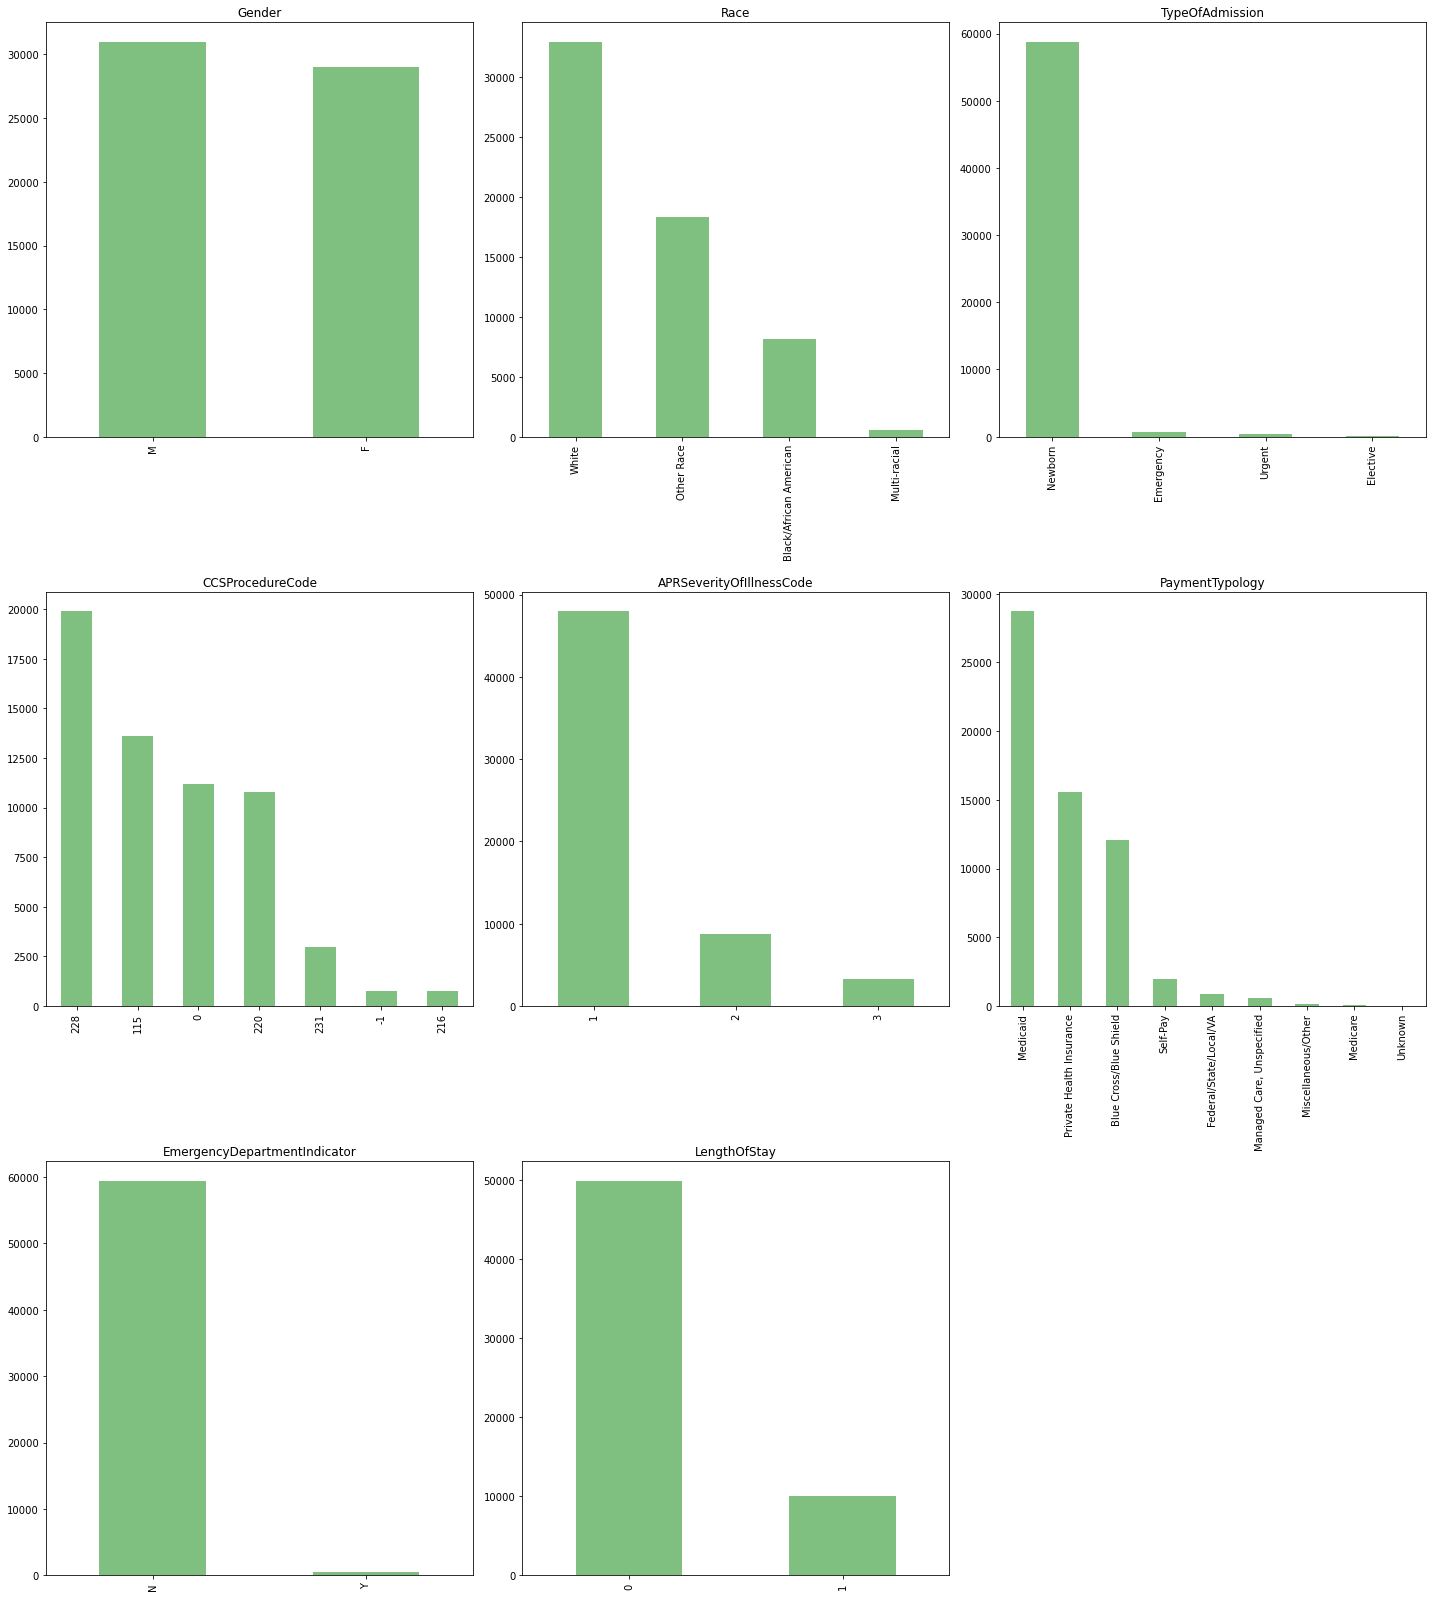

In [14]:
plt.figure(figsize=(20,30))
for i, column in enumerate(categorical_columns):
    
    plt.subplot(4,3,i+1)
    hospital_df[column].value_counts().plot.bar(color = 'g', alpha = 0.5)
    plt.title(column)
    plt.tight_layout()
    

<span style="font-size:1em;">✔</span> **Observations on categorical variables:** 

- Gender - Male/Female almost evenly balanced.
- Race - More than half the babies are white
- TypeOfAdmission - An overwhelming majority of the babies are newborns in this dataset
- APRSeverityOfIllnessCode - 80% of the babies' All Patient Refined Severity of Illness (APR SOI) rank is 1 (minor).
- PaymentTypology - Most people used Medicaid to cover their costs. 
- EmergencyDepartmentIndicator - Most data instances are 'N'
- LengthOfStay - Target variable, there is an imbalance in the class distribution between the two classes




In [15]:
hospital_df['LengthOfStay'].value_counts()

0    49895
1    10069
Name: LengthOfStay, dtype: int64

### Distribution of Numerical Variables

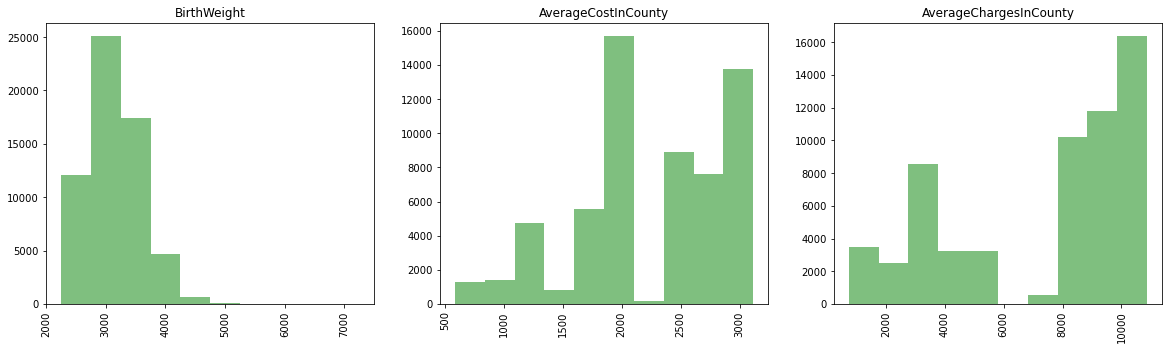

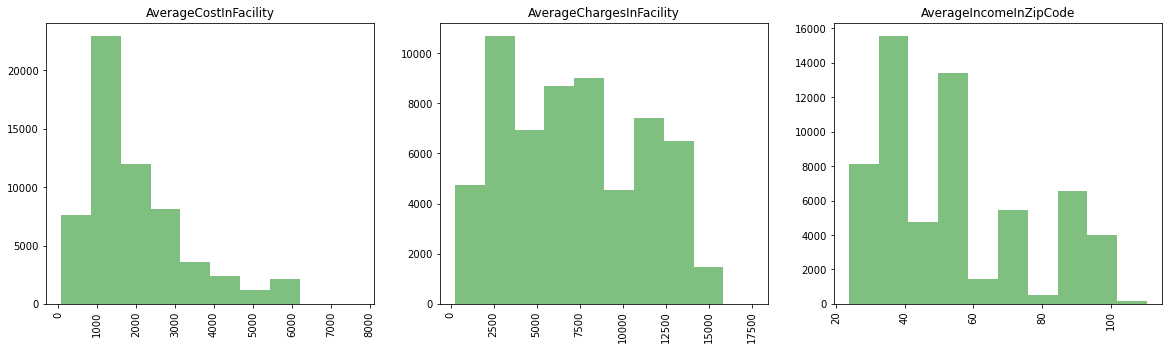

In [16]:

for i, col in enumerate(numerical_columns):
    if( i % 3 == 0): 
        plt.figure(figsize=(20,30))
    plt.subplot(5,3,i+1)
    plt.hist(hospital_df[col], alpha=0.5, color='g', align= 'left')#, density=True)#, bins = len(hospital_df[col].unique()))
    plt.title(col)
    plt.xticks(rotation='vertical')

    


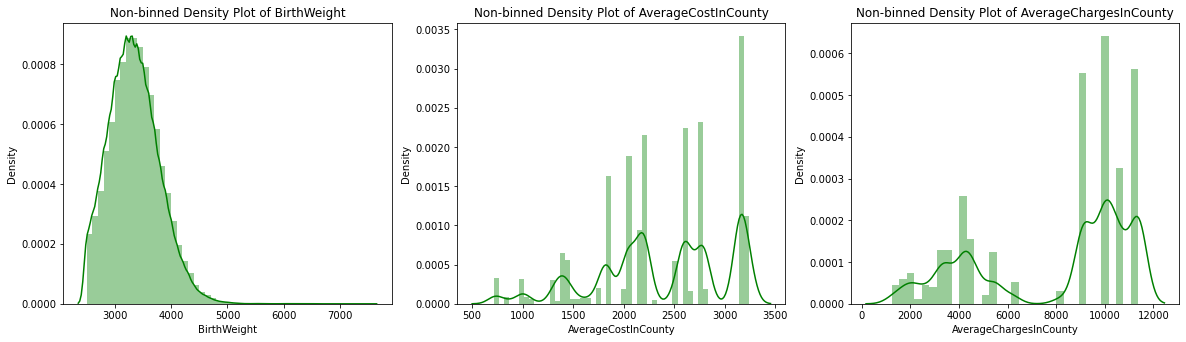

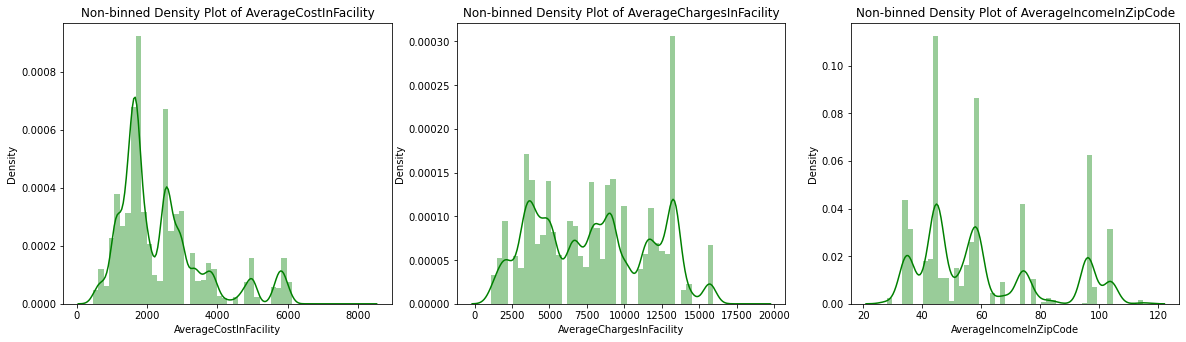

In [17]:
for i, col in enumerate(numerical_columns):
    if( i % 3 == 0): 
        plt.figure(figsize=(20,30))
    plt.subplot(5,3,i+1)
    sns.distplot(hospital_df[col], color = 'g')
    plt.title('Non-binned Density Plot of '+col)
    

<span style="font-size:1em;">✔</span> **Observations on numerical variables:** 

- BirthWeight, AverageCostInFacility - These two are right skewed
- AverageCostInCounty, AverageChargesInCounty, AverageIncomeInZipCode - These variables are unevenly distributed
- AverageChargesInFacility - Somewhat normally distributed when we consider the binned histogram (except for extremely high values at 2500 and extremely low values at 10000) 
- It would be worth trying to power scale these variables

### Boxplots of numerical variables with target

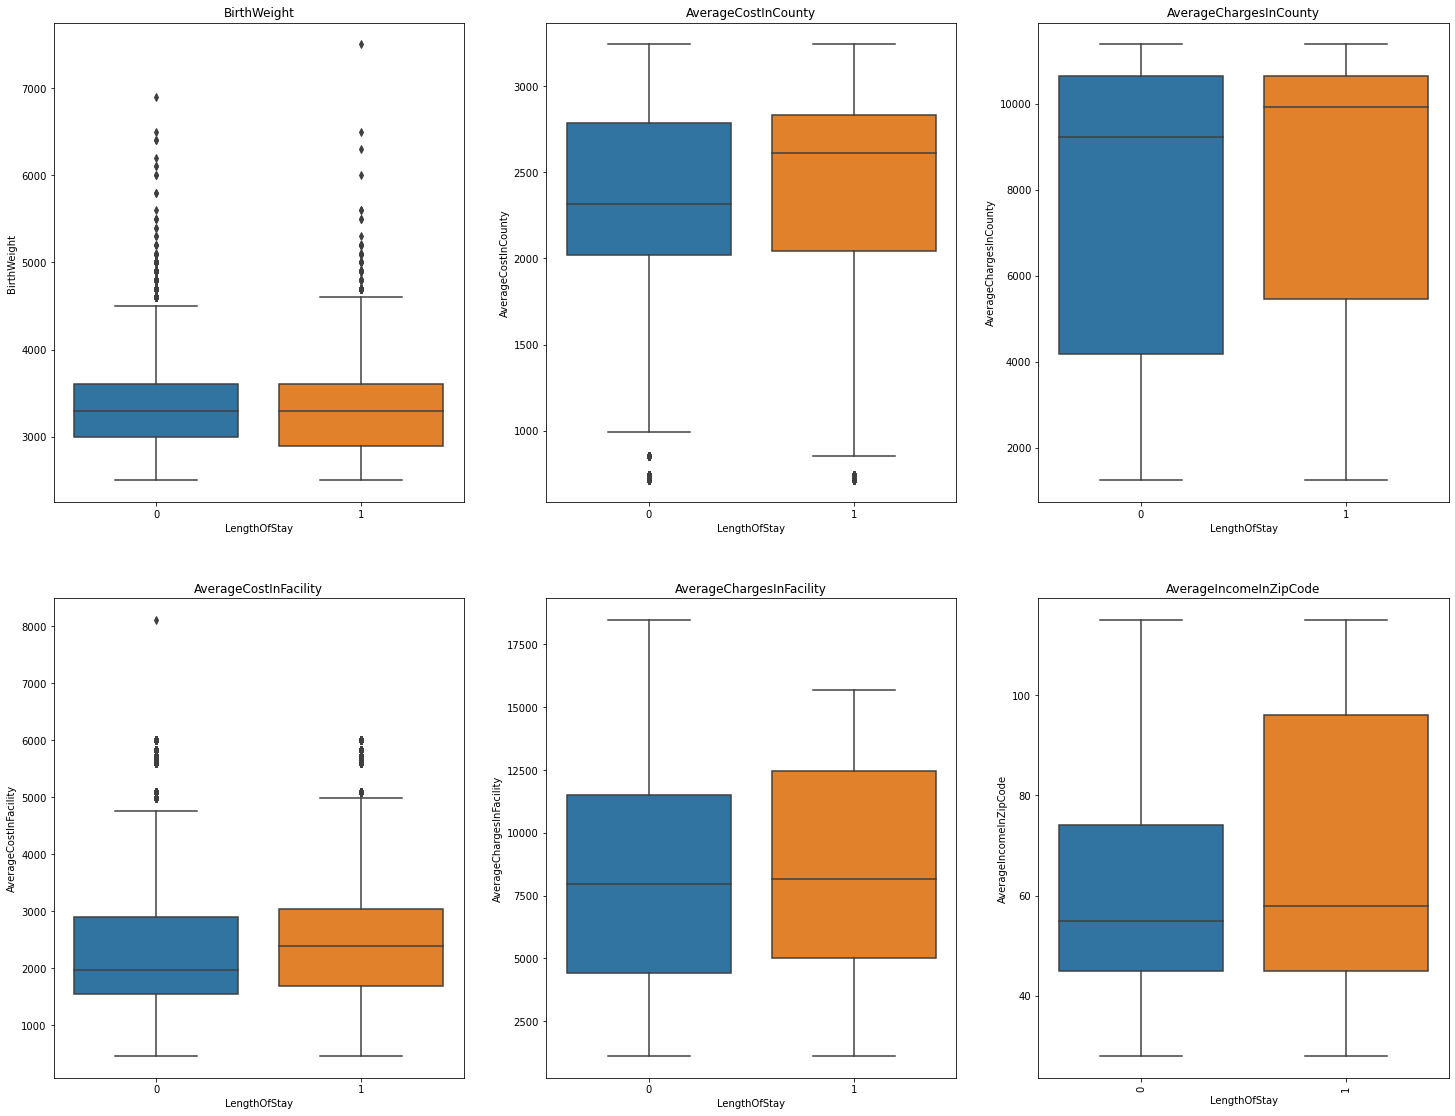

In [18]:
plt.figure(figsize=(25,30))
i=1
for col in numerical_columns:
  
  if col != 'LengthOfStay':
    plt.subplot(3,3,i)
    sns.boxplot(x='LengthOfStay',y=col,data=hospital_df)
    i = i+1
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

<span style="font-size:1em;">✔</span> **Observations on boxplots:** 
- None of the variables here seem like they could properly separate the two classes, with the average values for each very close except for AverageCostInCounty, however there is a lot of overlap even there 
- Almost all the datapoints overlap for BirthWeight, AverageCostInFacility, and AverageChargesInFacility

### Scatterplots of numerical variables with target

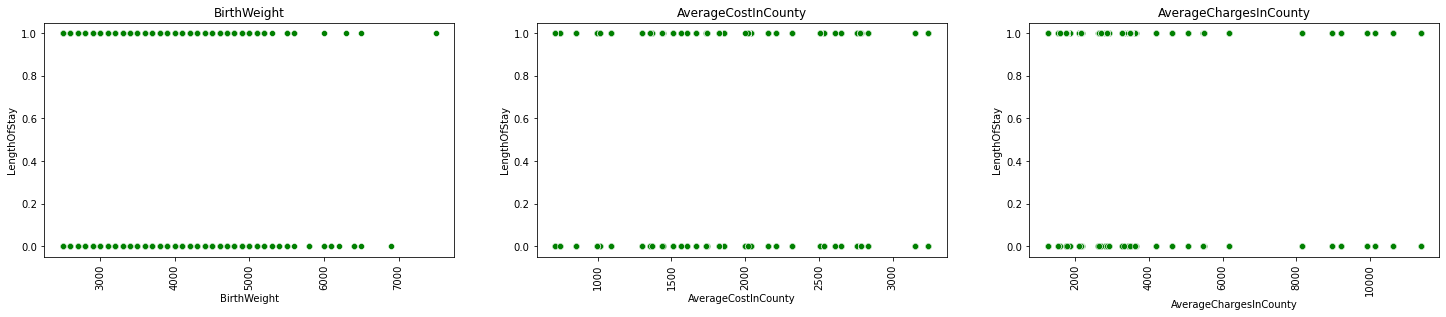

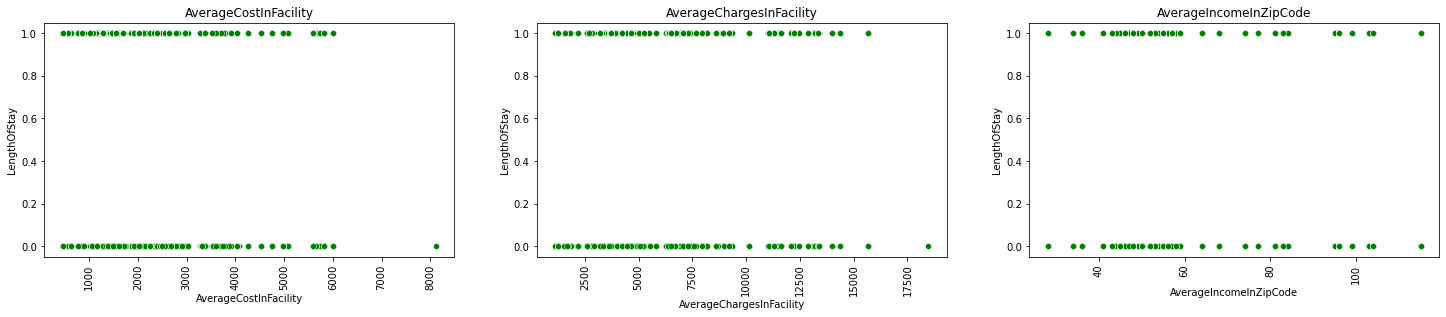

In [19]:
for i, col in enumerate(numerical_columns):
    if( i % 3 == 0): 
        plt.figure(figsize=(25,25))
    plt.subplot(5,3,i+1)
    sns.scatterplot(data=hospital_df, color = 'g', x=col, y='LengthOfStay')
    plt.xticks(rotation='vertical')
    
    plt.title(col)



plt.show()

<span style="font-size:1em;">✔</span> **Observations on scatterplots:** 
- Confirms the intuition from the boxplots, since it doesnt seeem like any of these variables can separate the two classes individually, there is too much overlap

### Scatterplots of numerical variables with each other

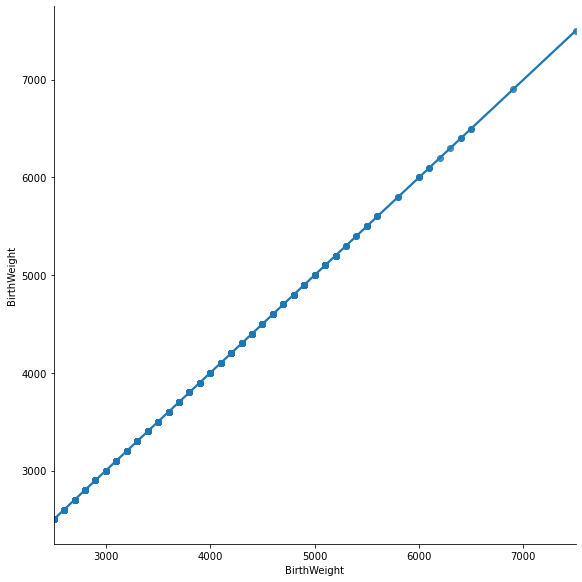

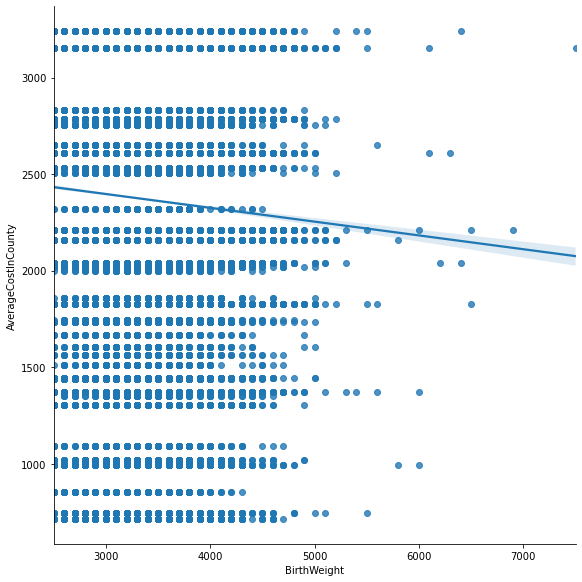

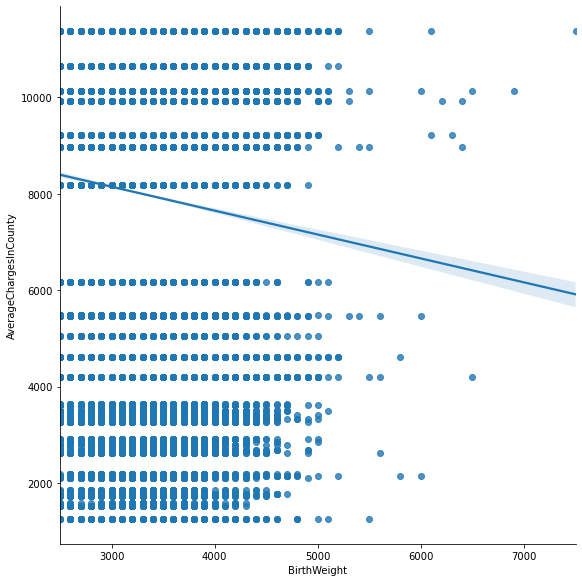

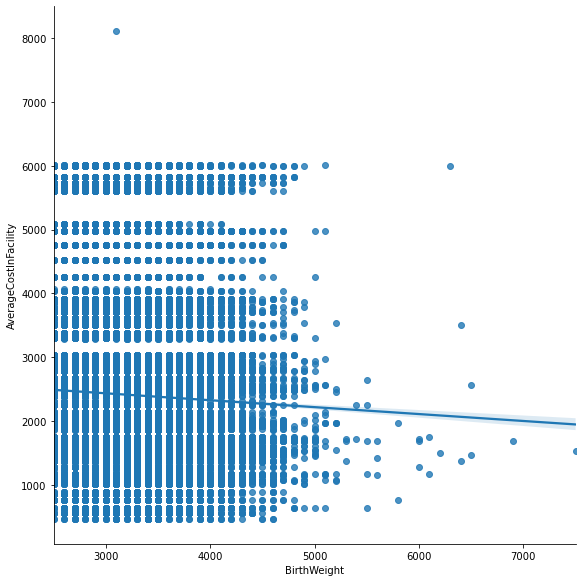

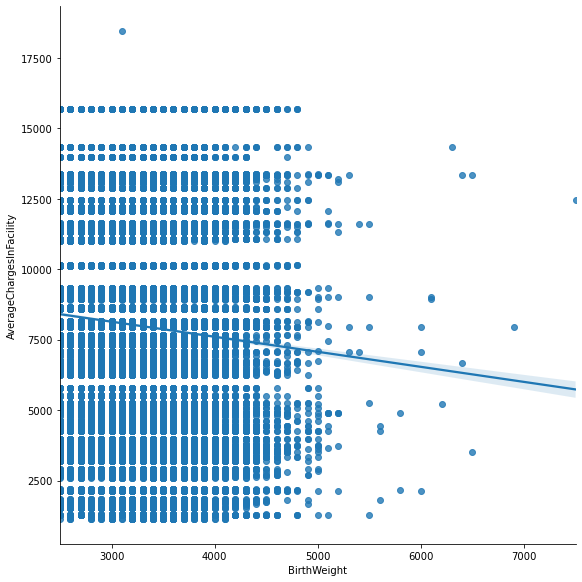

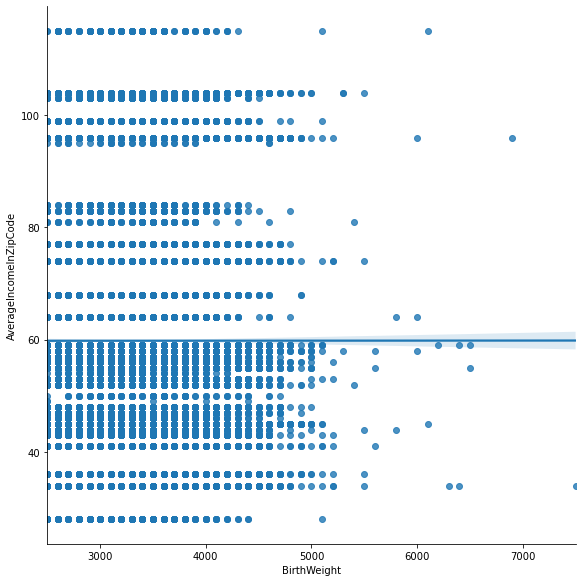

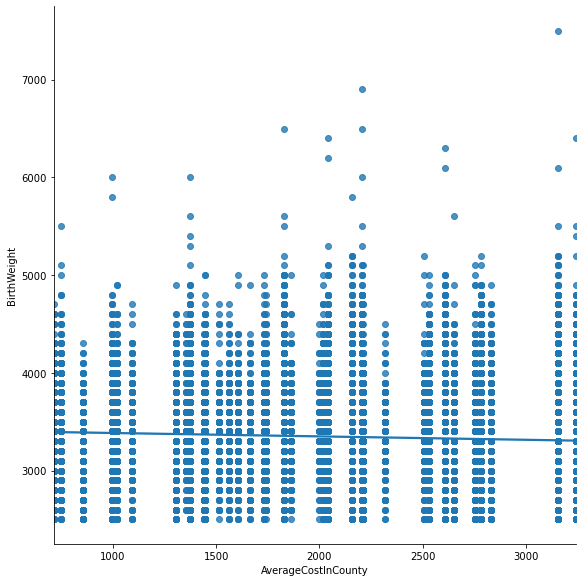

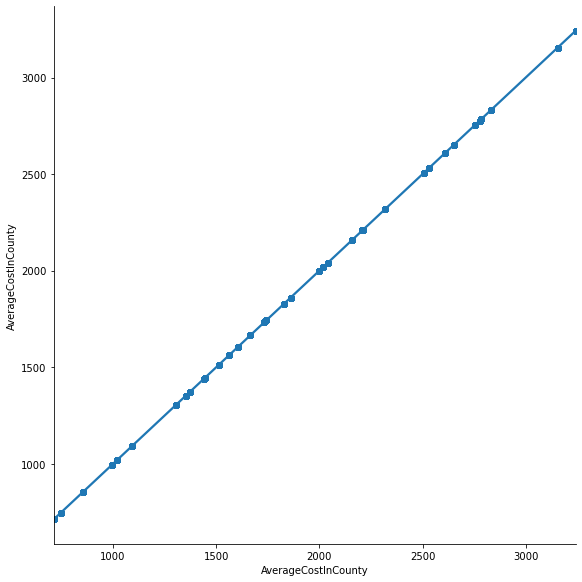

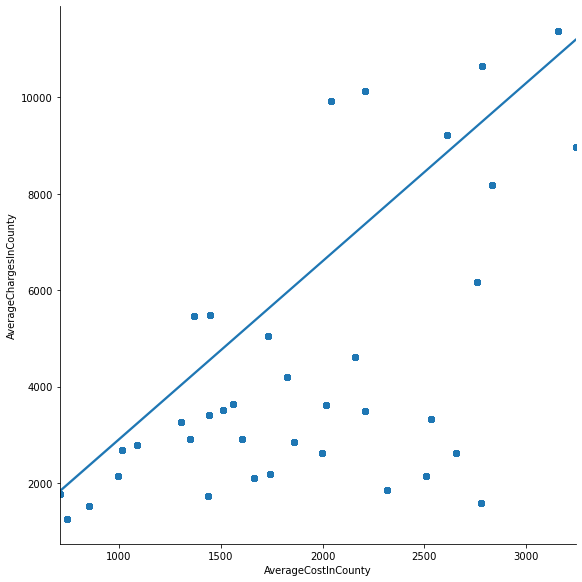

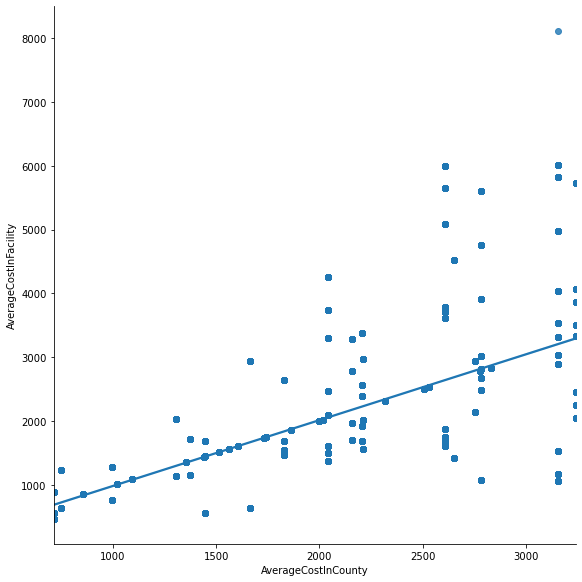

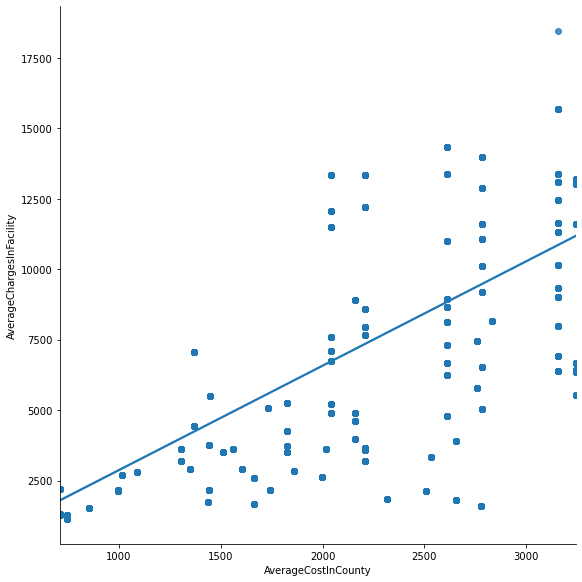

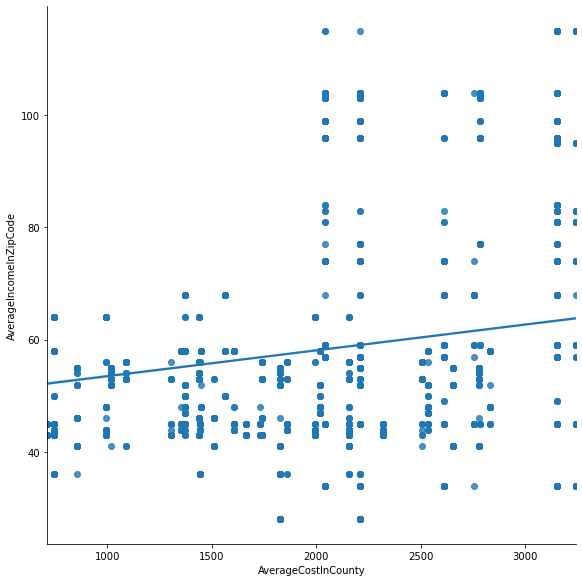

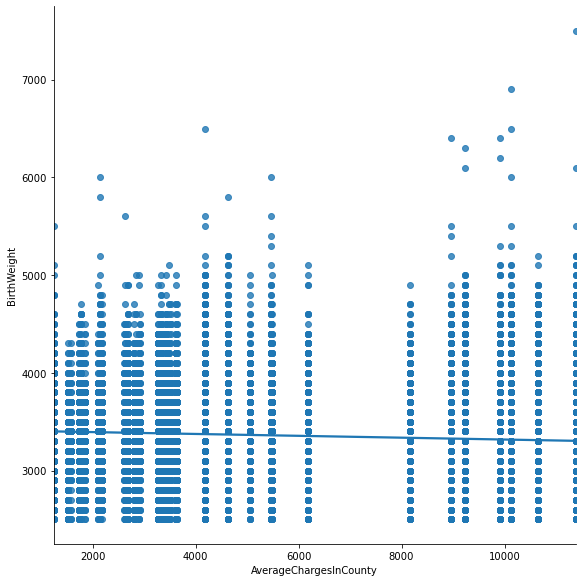

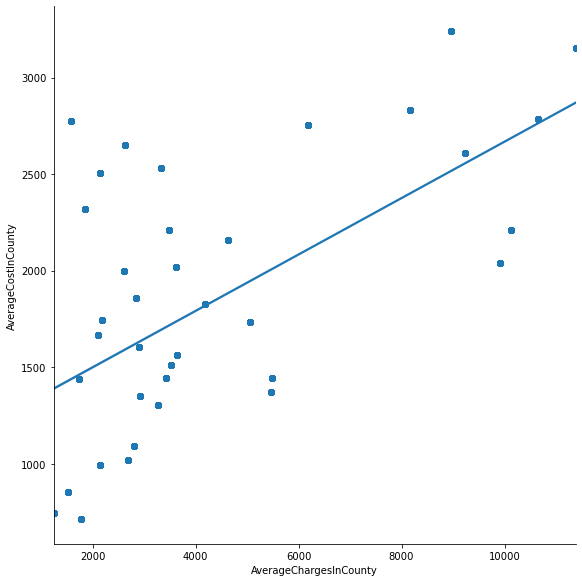

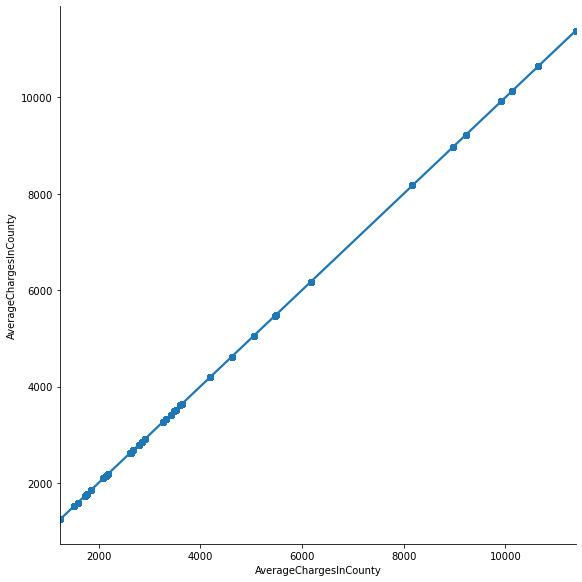

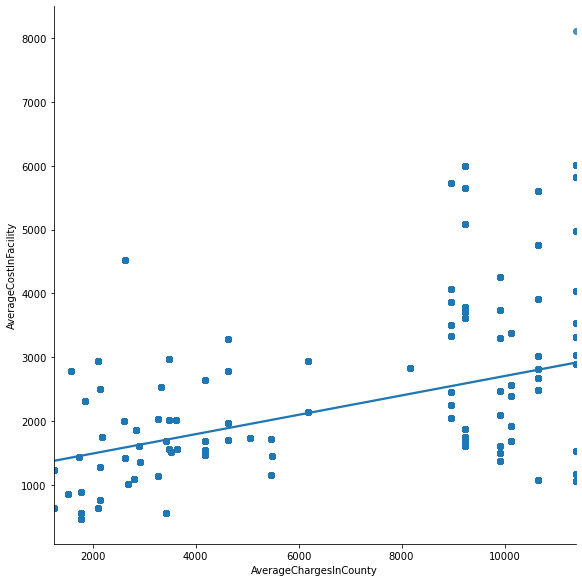

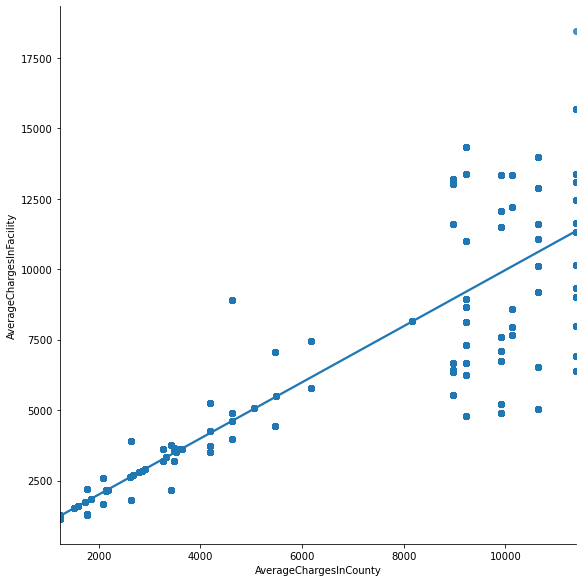

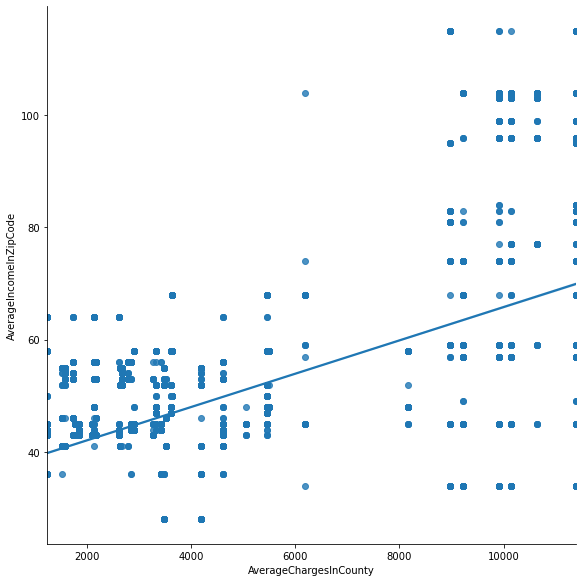

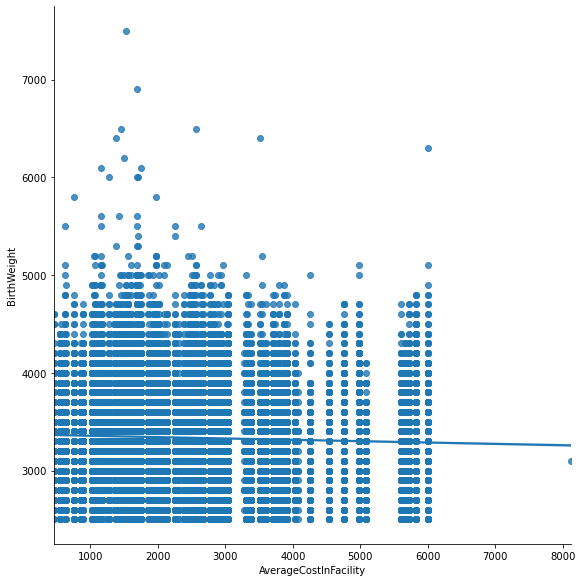

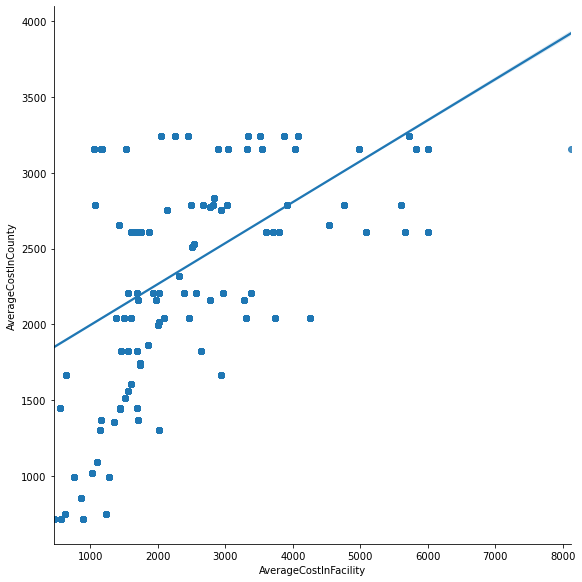

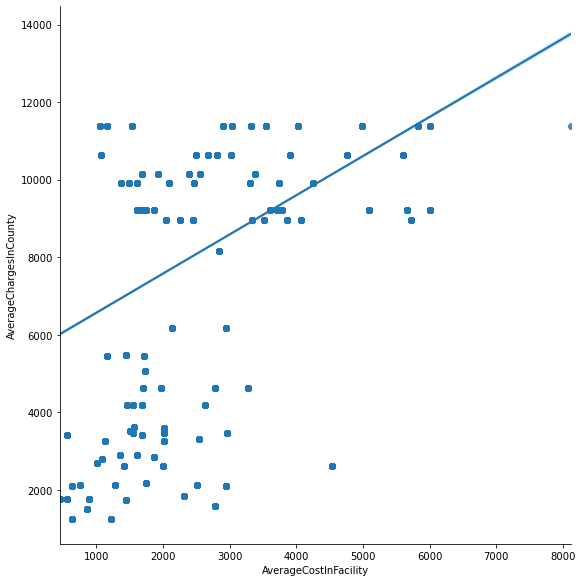

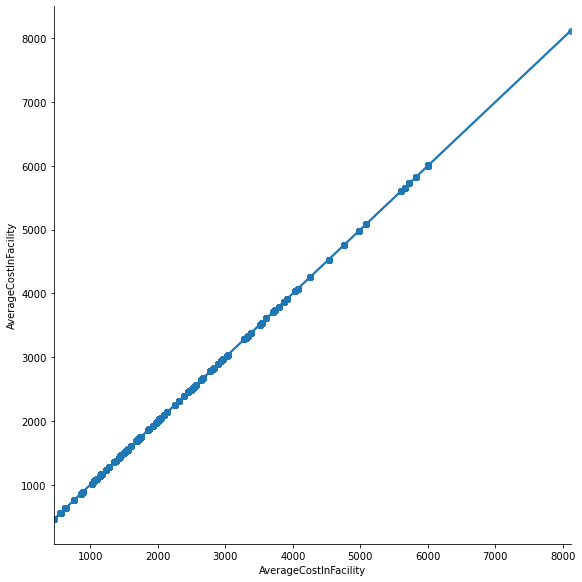

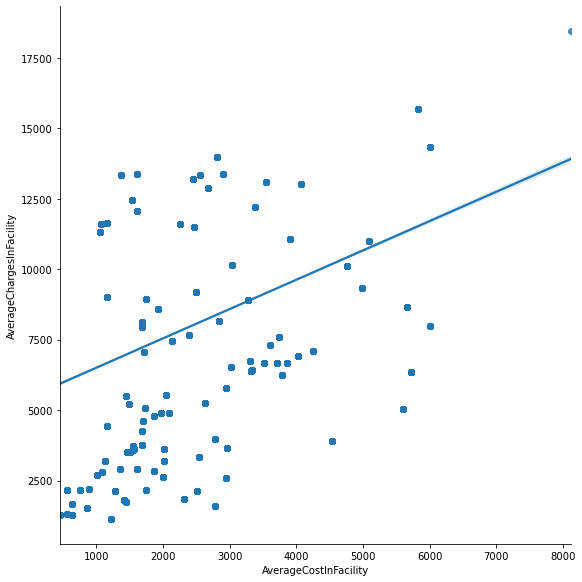

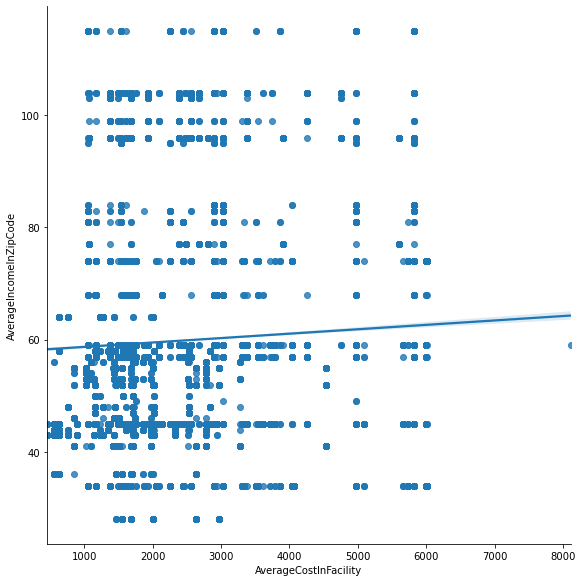

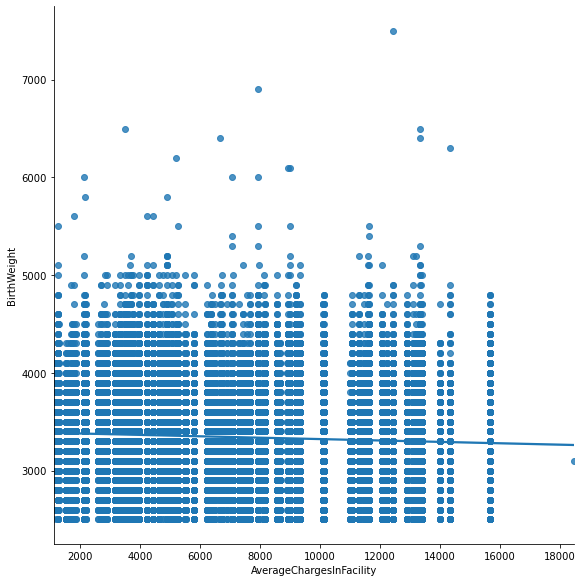

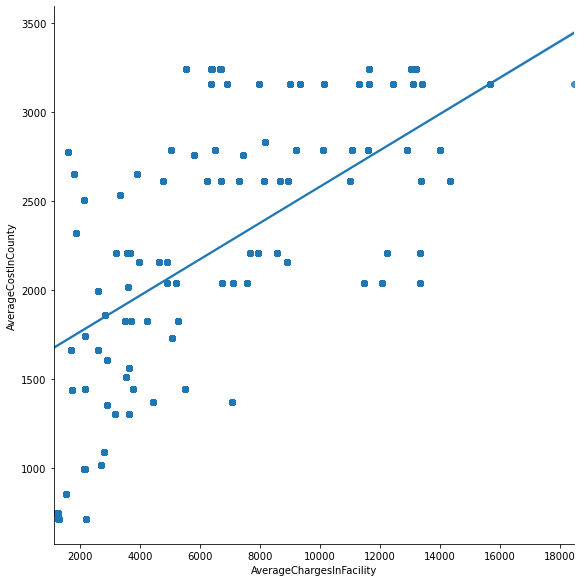

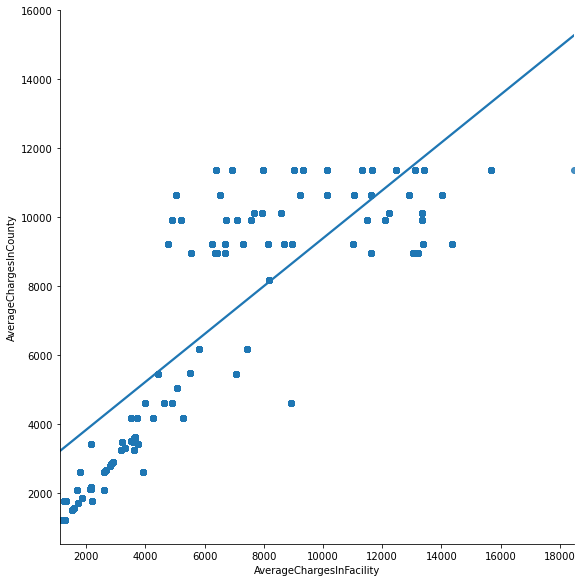

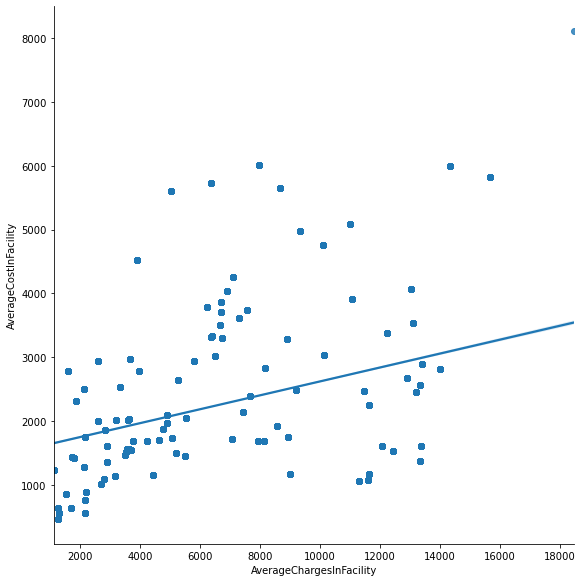

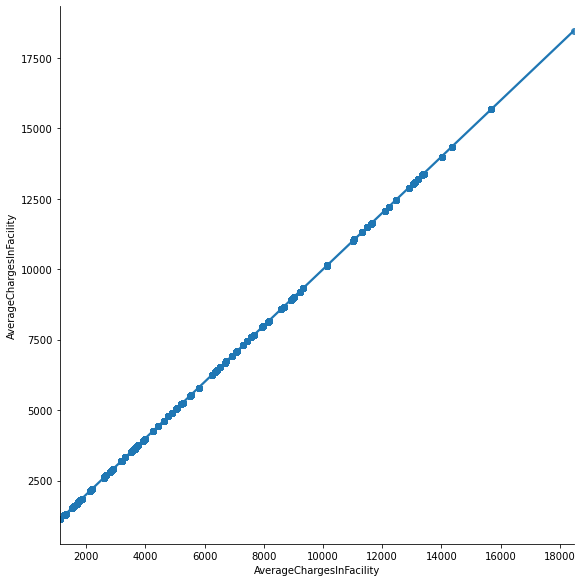

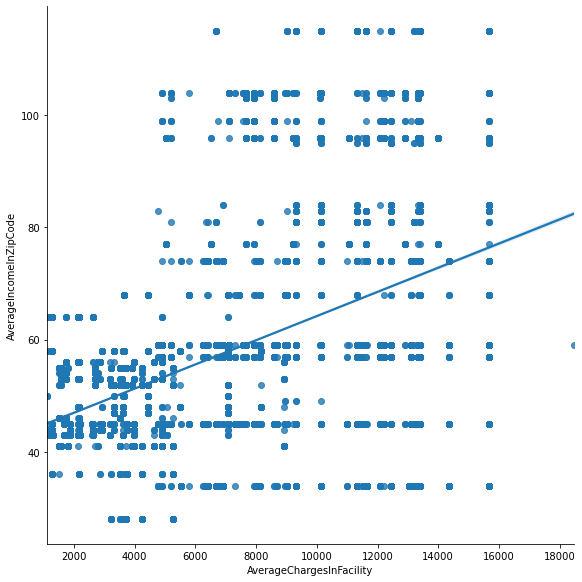

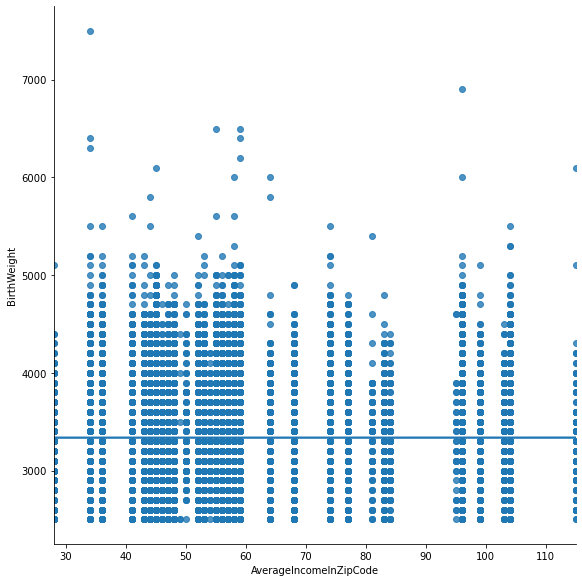

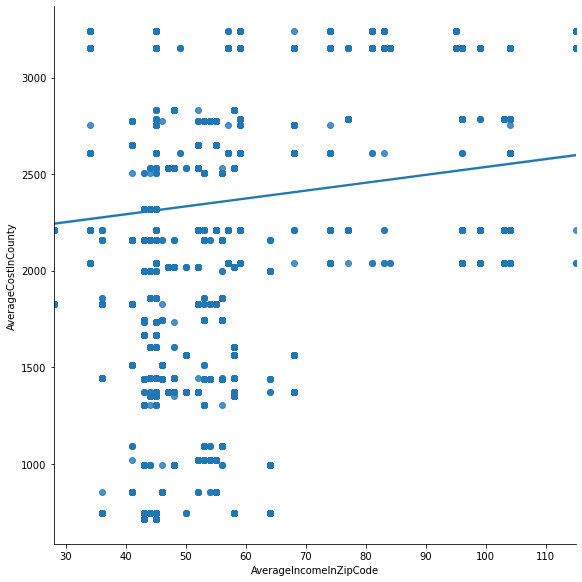

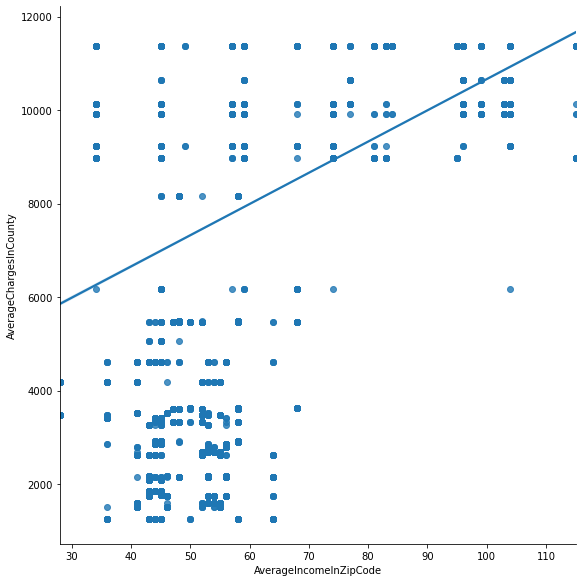

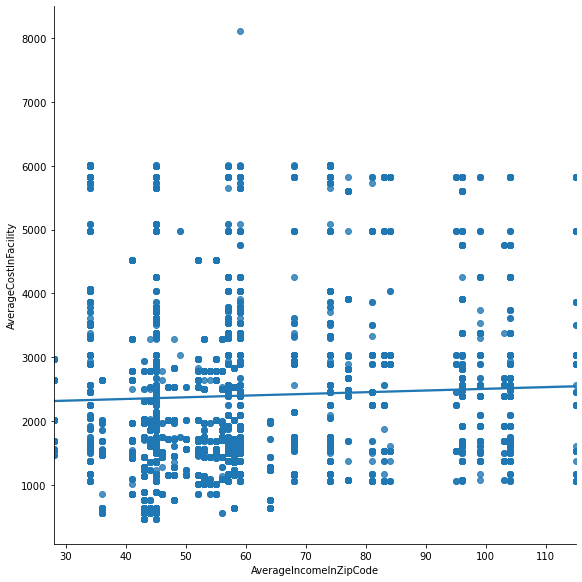

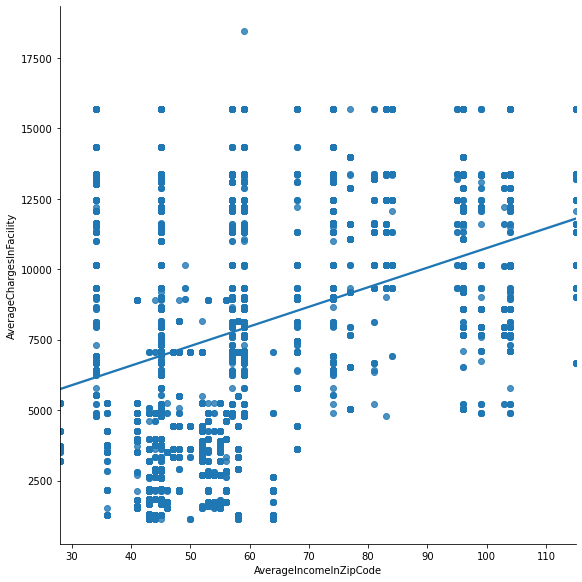

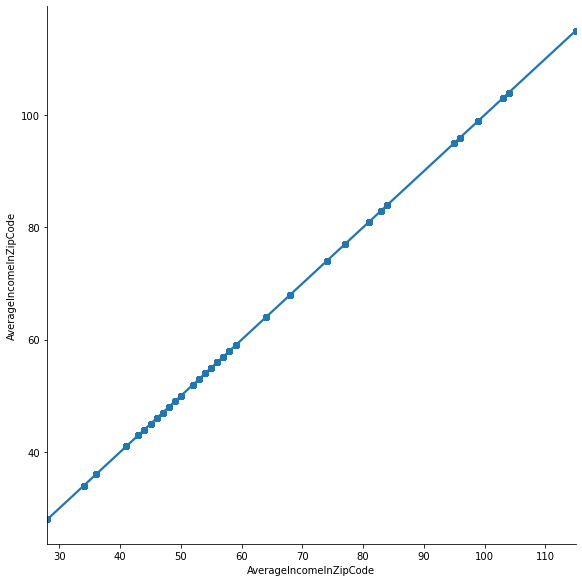

In [20]:
for i, col in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        sns.lmplot(col, col2, data = hospital_df, fit_reg=True, size=8)
        plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- There seem to be some slightly linear relationships (albeit with high error), it is worth exploring these relations more in detail with a Correlation Matrix

### Correlation Matrix

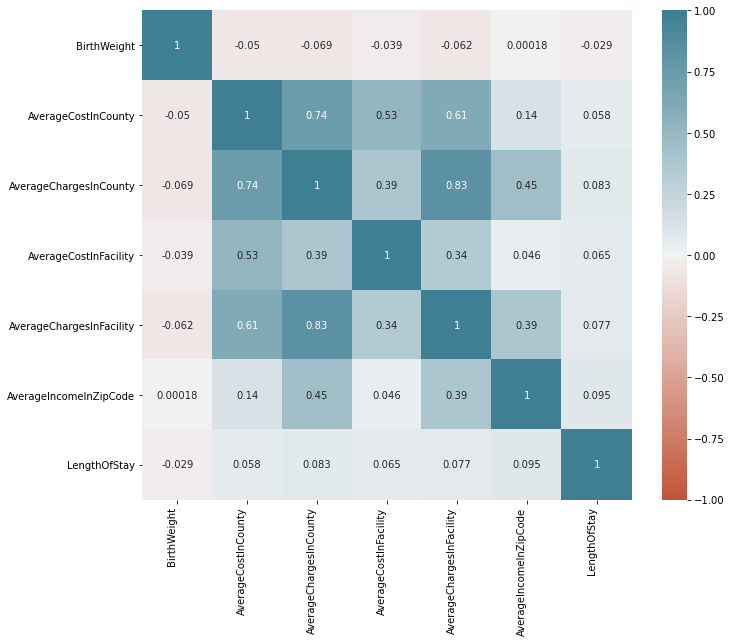

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
corr = hospital_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<span style="font-size:1em;">✔</span> **Observations on correlation matrix:** 
 
- AverageCostInCounty is positively correlated with AverageChargesInCounty (0.74), AverageCostInFacility (0.53), and AverageChargesInFacility (0.61)
- AverageChargesInFacility and AverageChargesInCounty are strongly positively correlated (0.83)
- AverageChargesInCounty is somewhat positively correlated with AverageCostInFacility (0.39) and AverageIncomeInZipCode (0.45)
- AverageCostInFacility is somewhat positively correlated with AverageChargesInFacility (0.34)
- AverageChargesInFacility is somewhat positively correlated with AverageIncomeInZipCode (0.39)
- On average there is very little correlation between the numerical variables and the target variable - LengthOfStay, with APRSeverityOfIllnessCode being the strongest of the lot (0.27)
- Since we have so many correlated variables, regularization will be very useful when deriving the optimal hypothesis

### Pairing two numerical variables together with target

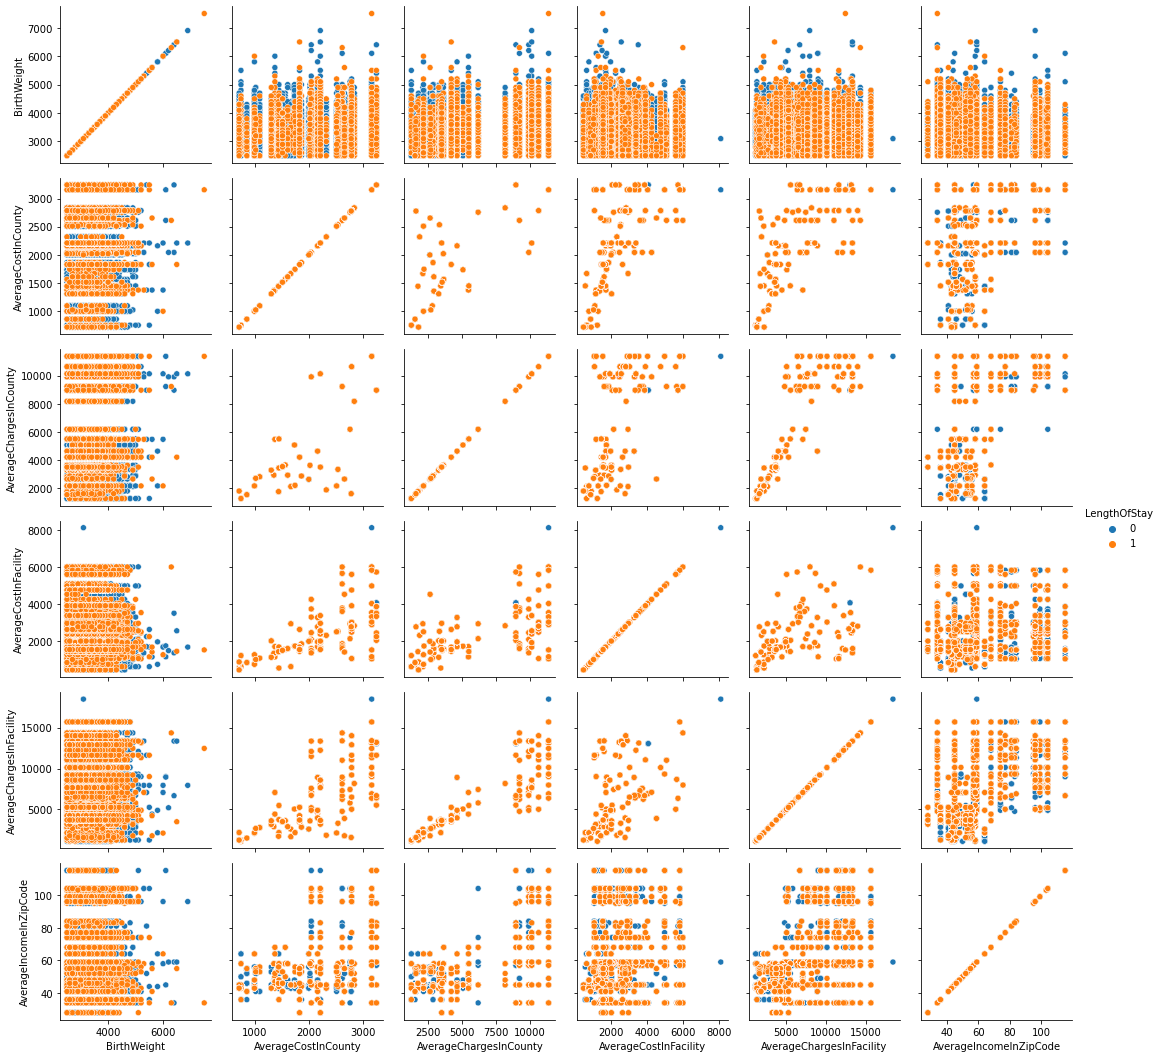

In [19]:
g = sns.PairGrid(hospital_df, vars=numerical_columns, hue="LengthOfStay")
g.map(sns.scatterplot)
g.add_legend()
plt.show()

<span style="font-size:1em;">✔</span> **Observations on numerical-numerical pairgrid:**
- It doesnt seem like combining the numerical attributes into pairs makes the task easier, as neither a linear or non-linear decision boundary would be able to separate the two classes from this information

### Pairing two categorical variables together with target

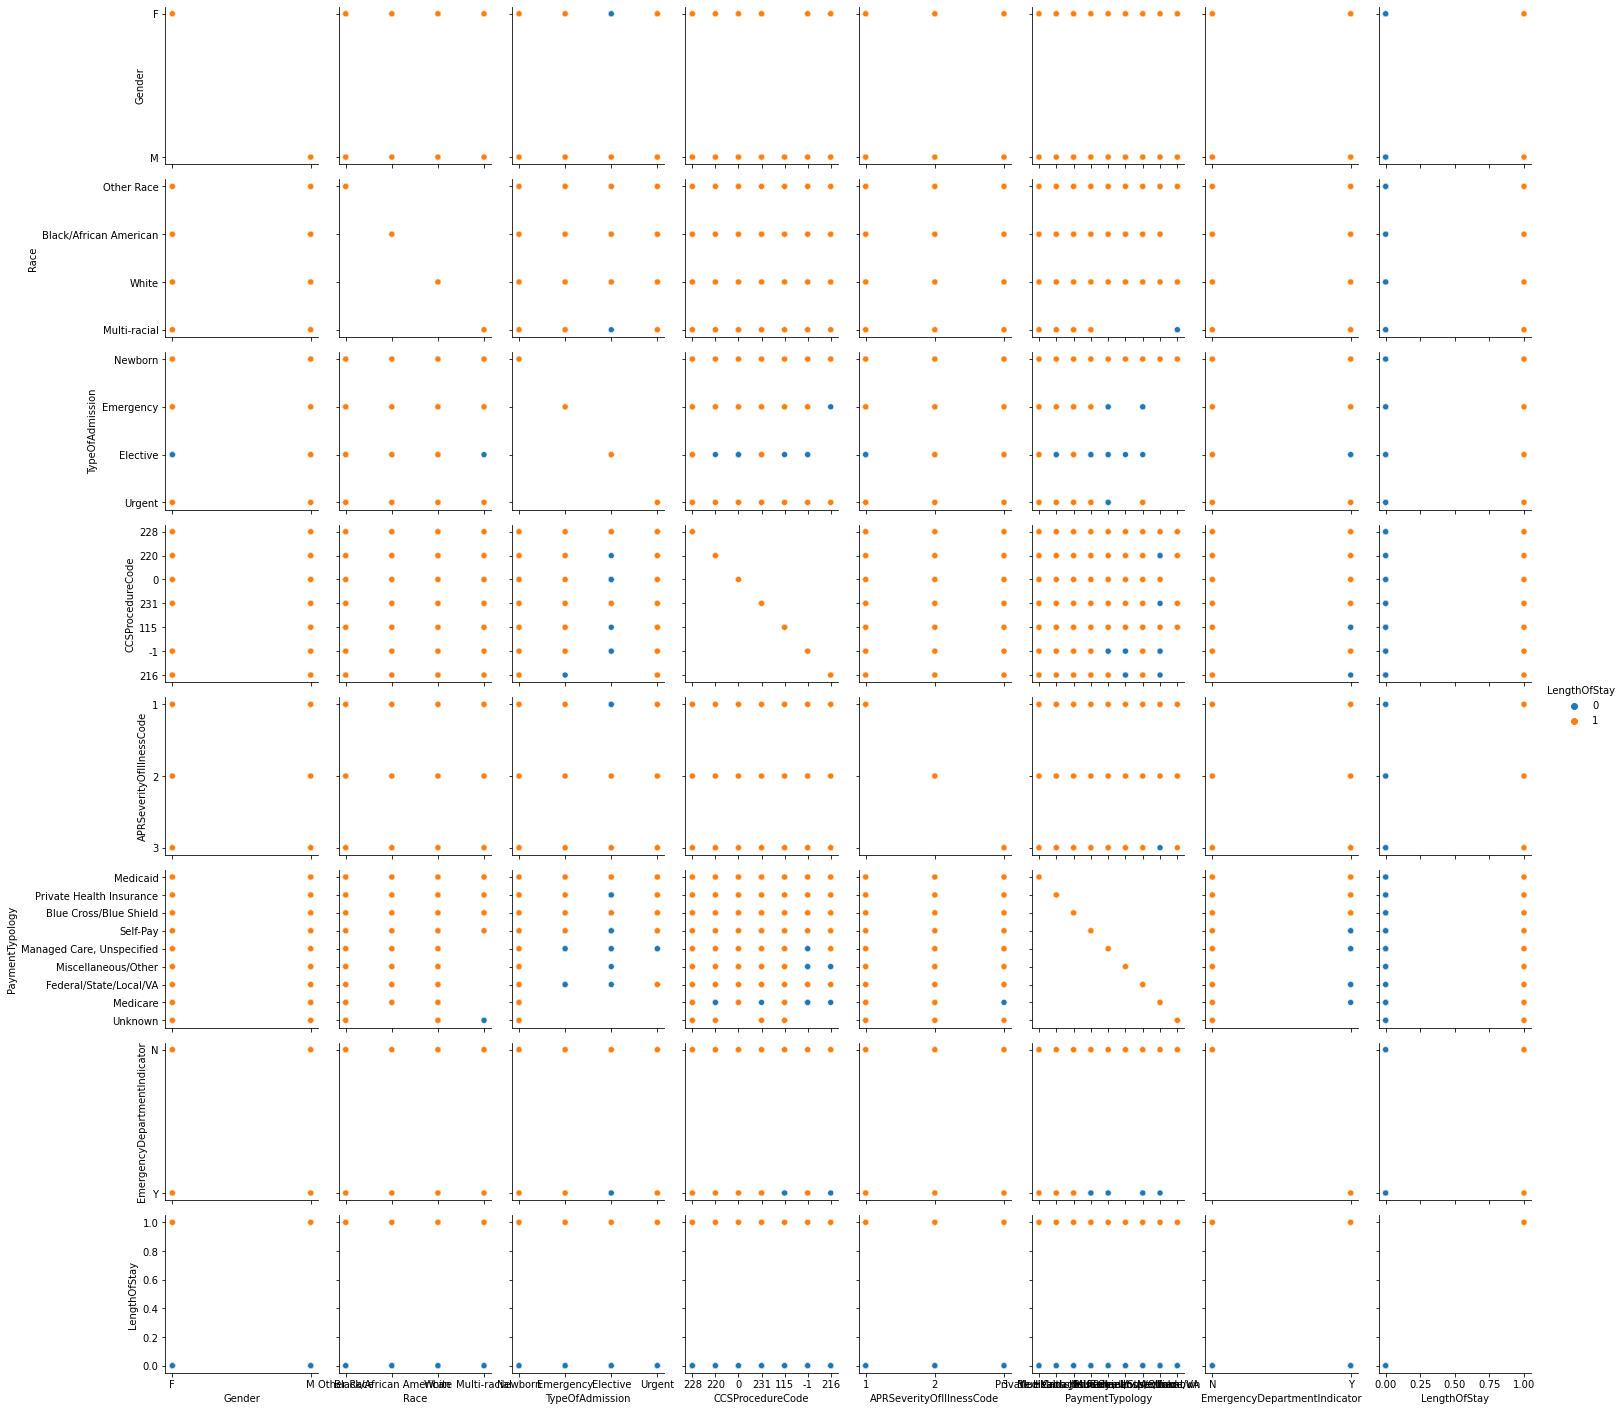

In [20]:
g = sns.PairGrid(hospital_df, vars=categorical_columns, hue="LengthOfStay")
g.map(sns.scatterplot)
g.add_legend()
plt.show()

<span style="font-size:1em;">✔</span> **Observations on categorical-categorical pairgrid:**
- A non-linear decision boundary can be drawn to separate the classes when pairing PaymentTypology with TypeOfAdmission
- A linear decision boundary might be able to separate the classes when pairing CCSProcedureCode with TypeOfAdmission

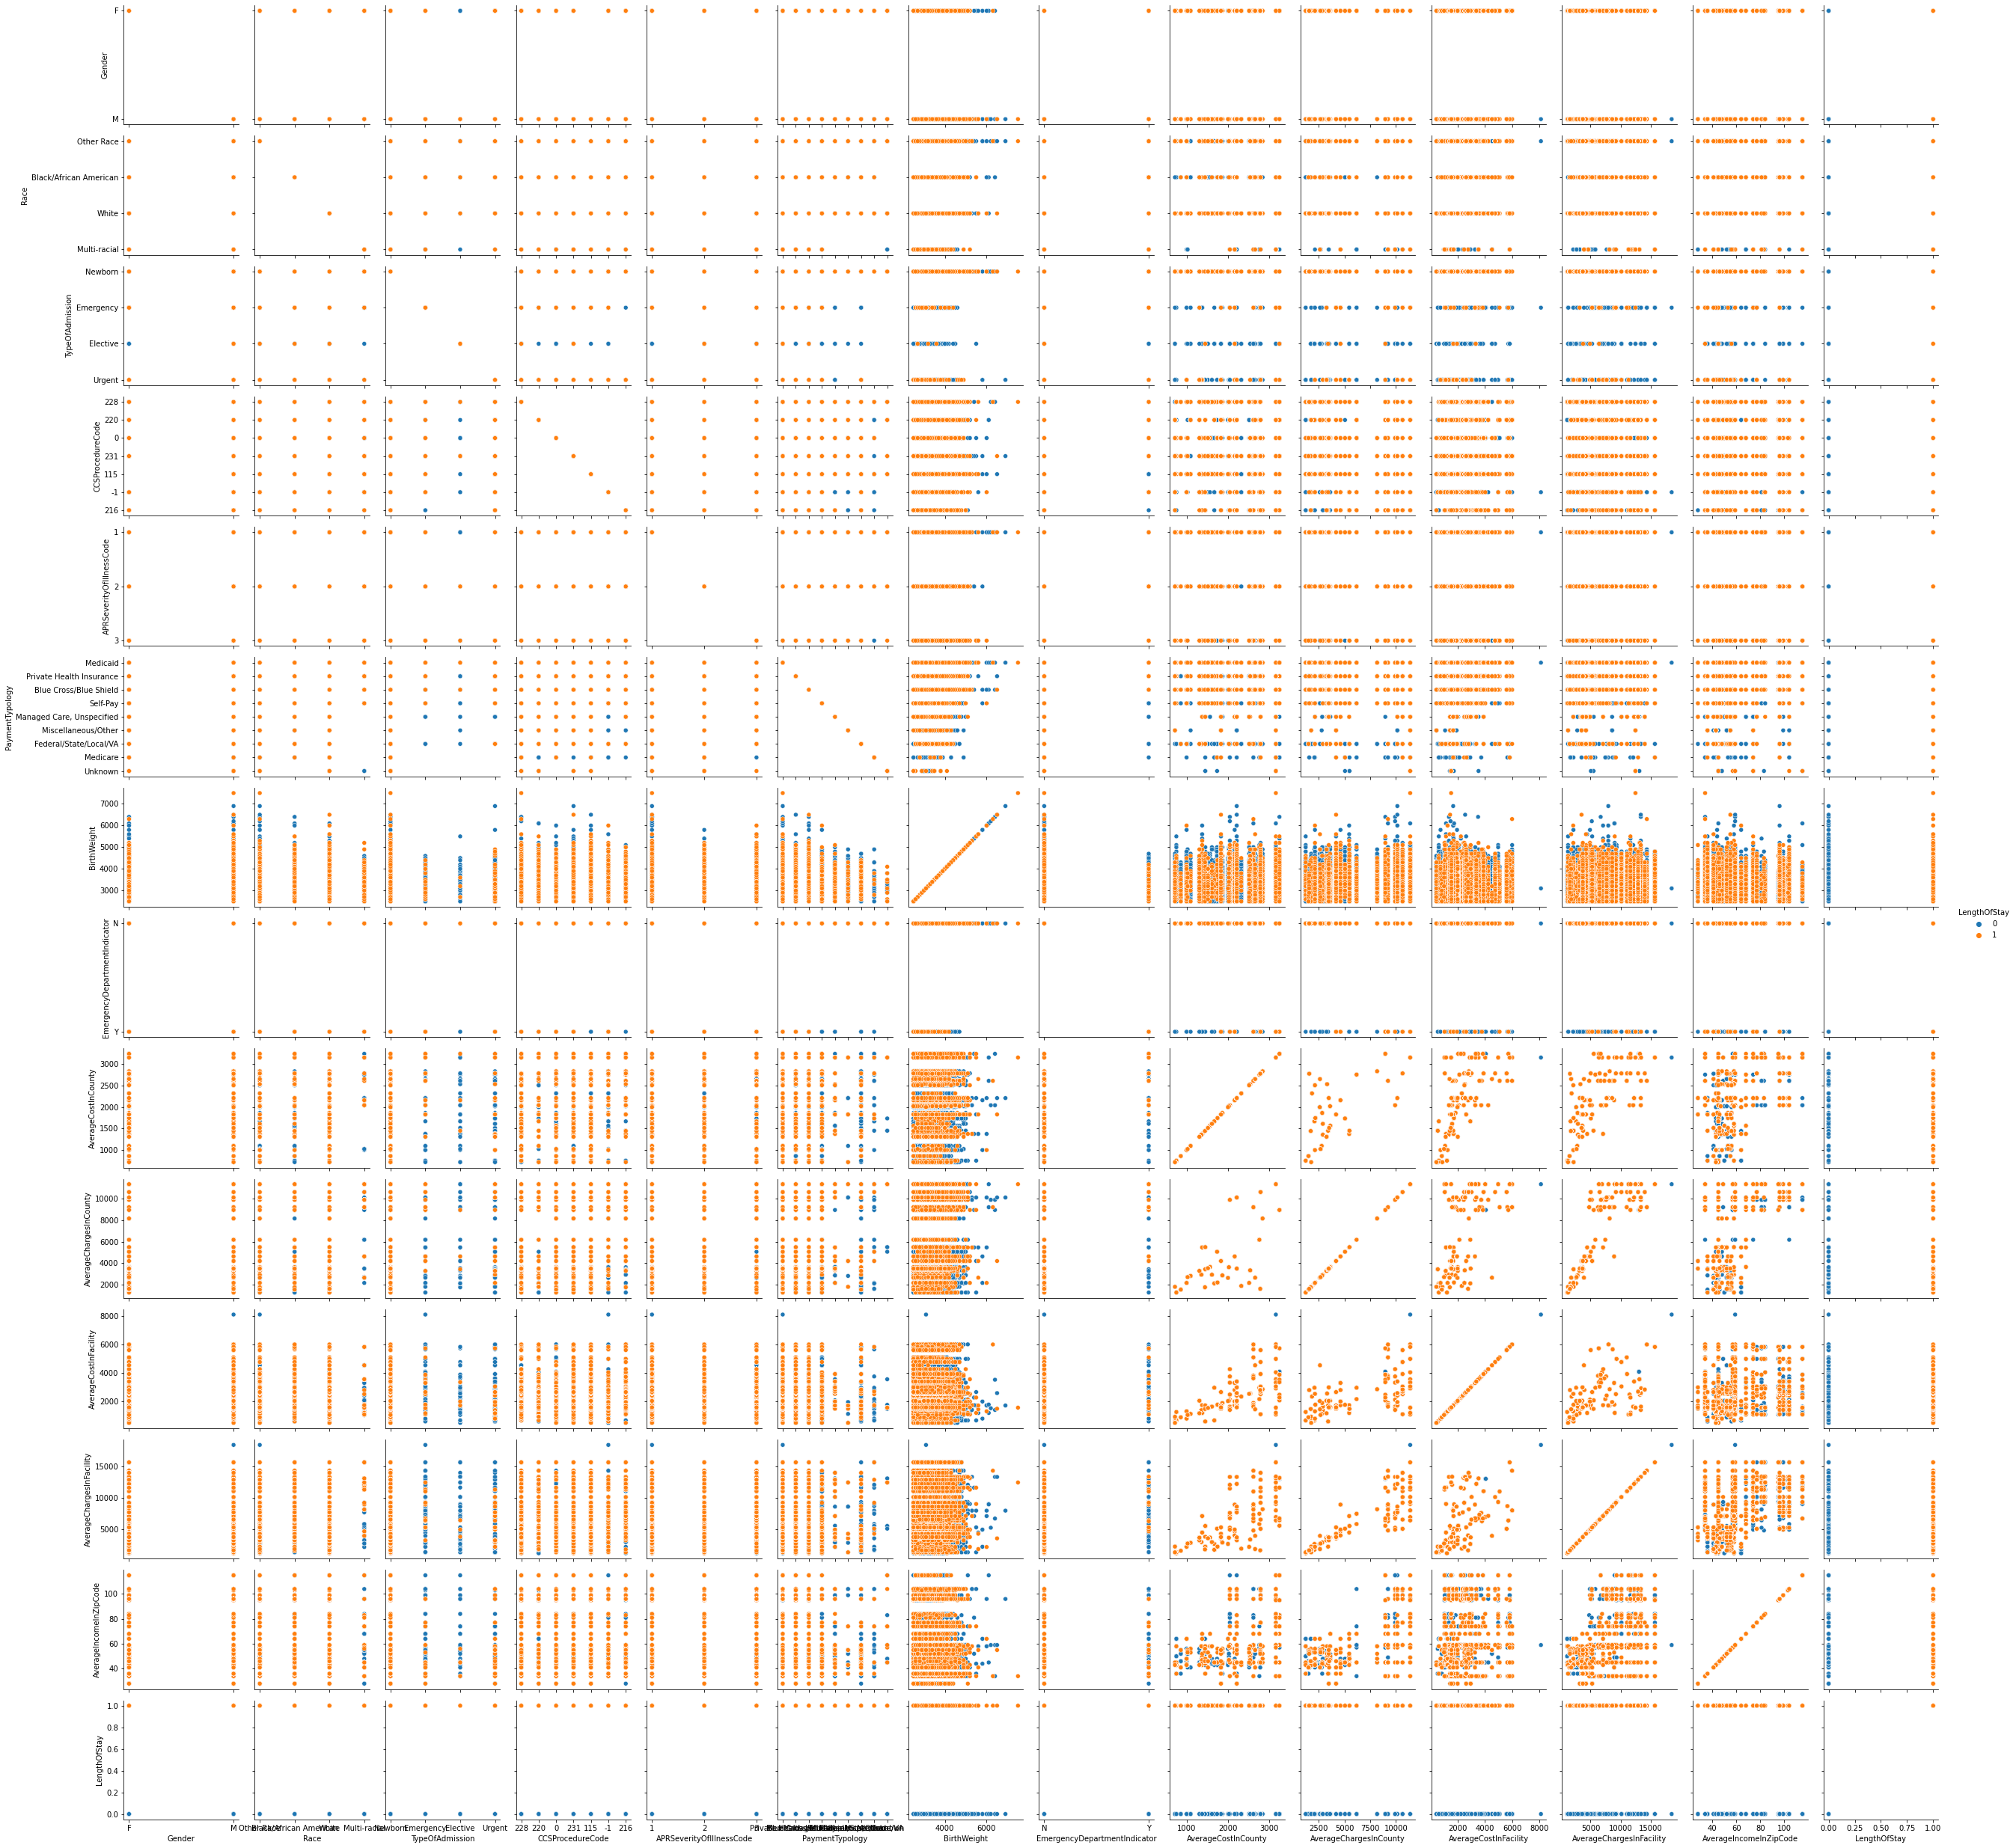

In [21]:
g = sns.PairGrid(hospital_df, vars=hospital_df.columns, hue="LengthOfStay")
g.map(sns.scatterplot)
g.add_legend()
plt.show()

<span style="font-size:1em;">✔</span> **Observations:**
- A linear decision boundary might be able to separate the two classes when pairing AverageCostInCounty, AverageChargesInCounty, AverageChargesInFacility, AverageCostInFacility and AverageIncomeInZipCode individually with TypeOfAdmission, althought there will be some error - it's not black and white
- TypeOfAdmission, when paired with AverageCostInCounty, AverageChargesInCounty, AverageChargesInFacility, AverageCostInFacility and AverageIncomeInZipCode individually almost always results in LengthOfStay >= 4, when TypeOfAdmission = 'Newborn', which is a great sign since 'Newborn' is the dominant class in this categorical variable
- EmergencyDepartmentIndicator, when paired with AverageCostInCounty, AverageChargesInCounty, AverageChargesInFacility, AverageCostInFacility and AverageIncomeInZipCode individually almost always results in LengthOfStay >= 4, when EmergencyDepartmentIndicator = 'N', which is a great sign since 'N' is the dominant class in this categorical variable


# Data Splitting

### Strategy

 - Cross validation will be used here instead of Hold-out so there's no need to do a validation split
 - Random splitting should work fine for this dataset since all the datapoints represent unique individuals with unique IDs (without spanning multiple rows) so we don't have to worry about potential data leakage

In [21]:
with pd.option_context('mode.chained_assignment', None):
    hospital_df_train, hospital_df_test = train_test_split(hospital_df, test_size=0.2, shuffle=True)

In [22]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(hospital_df.shape[0], hospital_df_train.shape[0], hospital_df_test.shape[0]))

Nunber of instances in the original dataset is 59964. After spliting Train has 47971 instances and test has 11993 instances.


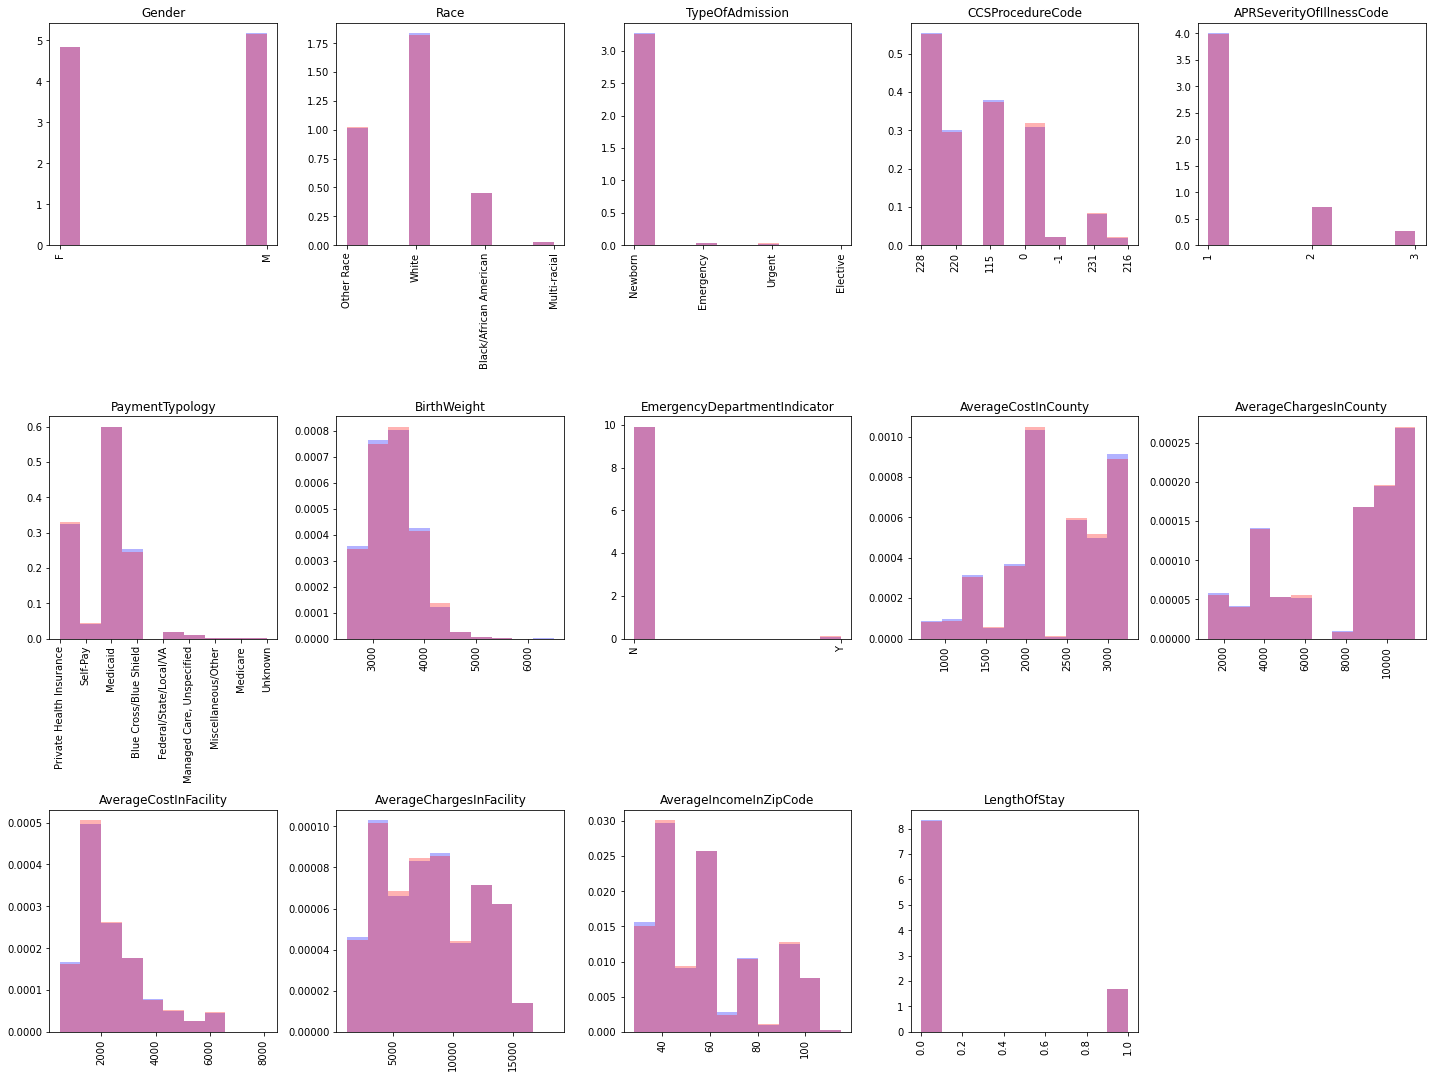

In [23]:
plt.figure(figsize=(20,20))
for i, col in enumerate(hospital_df.columns):
    plt.subplot(4,5,i+1)
    _, bins, _ = plt.hist(hospital_df_train[col], alpha=0.3, color='b', density=True)
    #print(bins)
    plt.hist(hospital_df_test[col], bins=bins, alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

<span style="font-size:1em;">✔</span> **Observations:** 
- The distribution between the train set and test set is almost identical, which means there is an even split of unique values for each attribute. This is good for testing and model evaluation. 


# Data Pre-processing/Transforming

## Feature Scaling

 First we try power transformation, to see if any of the numerical variables get better distributions. We will try both yeo-johnson and box-cox

In [24]:
hospital_df_train

Gender                    Race TypeOfAdmission CCSProcedureCode  \
59711      F              Other Race         Newborn              228   
19311      M                   White         Newborn              220   
10424      M                   White         Newborn              220   
5255       M                   White         Newborn              228   
25116      M  Black/African American         Newborn              115   
...      ...                     ...             ...              ...   
18609      M  Black/African American         Newborn              228   
3538       M                   White         Newborn              228   
52723      F  Black/African American         Newborn              228   
12849      F                   White         Newborn              220   
19146      F  Black/African American         Newborn              228   

      APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
59711                        1  Private Health Insurance         2600   
19311                        1  Private Health Insurance         3900   
10424                        1                  Self-Pay         4200   
5255                         1  Private Health Insurance         3200   
25116                        2                  Medicaid         3800   
...                        ...                       ...          ...   
18609                        1  Private Health Insurance         2700   
3538                         1  Private Health Insurance         2700   
52723                        1                  Medicaid         3200   
12849                        1    Blue Cross/Blue Shield         3200   
19146                        1                  Medicaid         2700   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
59711                            N                 1826   
19311                            N                 3155   
10424                            N                 2158   
5255                             N                 2318   
25116                            N                 2018   
...                            ...                  ...   
18609                            N                 2611   
3538                             N                 1665   
52723                            N                 3155   
12849                            N                 3155   
19146                            N                 2611   

       AverageChargesInCounty  AverageCostInFacility  \
59711                    4190                   1686   
19311                   11381                   3032   
10424                    4620                   2779   
5255                     1857                   2318   
25116                    3610                   2018   
...                       ...                    ...   
18609                    9227                   1681   
3538                     2096                    633   
52723                   11381                   2895   
12849                   11381                   3542   
19146                    9227                   1681   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
59711                      4243                      55             1  
19311                     10135                      45             0  
10424                      3978                      56             0  
5255                       1857                      45             0  
25116                      3610                      58             0  
...                         ...                     ...           ...  
18609                      8131                      45             0  
3538                       1683                      43             0  
52723                     13394                      45             1  
12849                     13110                      74             0  
19146                      8131                      45             0  

[4797

### Power Scaling with yeo-johnson

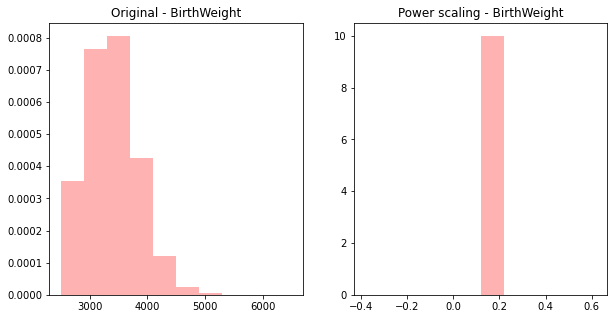

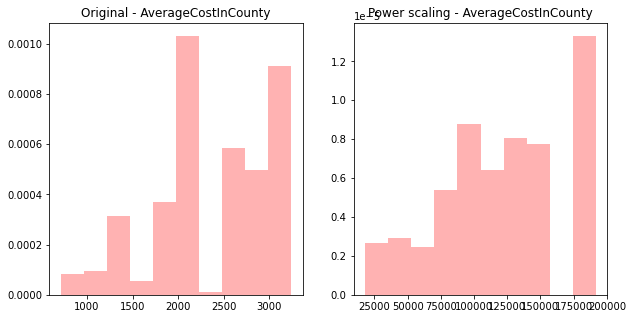

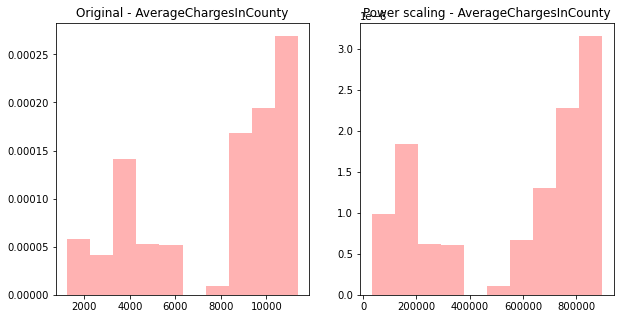

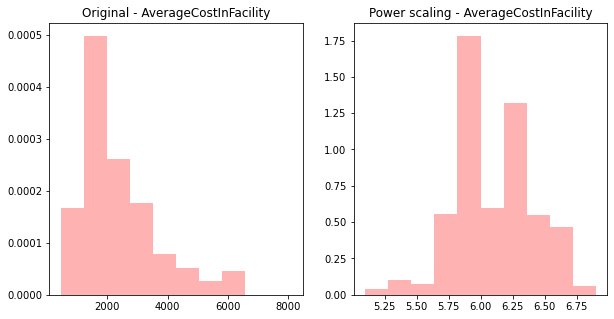

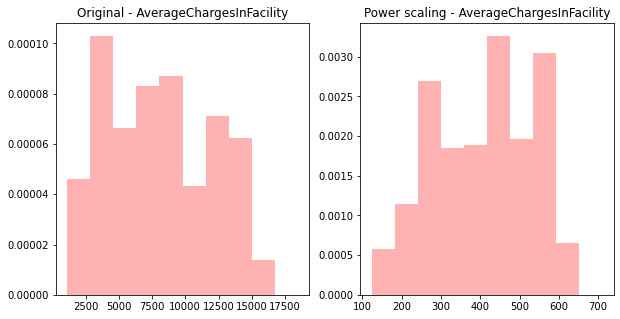

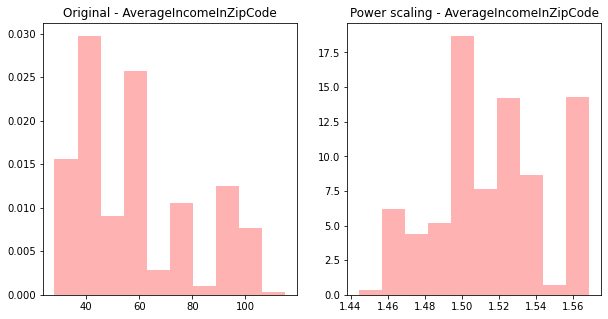

In [25]:
for numerical_column in numerical_columns:
    PowerTransformer_column = PowerTransformer(method='yeo-johnson', standardize=False).fit(hospital_df_train[[numerical_column]])
    RM_power = PowerTransformer_column.transform(hospital_df_train[[numerical_column]])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(hospital_df_train[numerical_column], alpha=0.3, color='r', density=True)
    plt.title("Original - "+numerical_column)

    plt.subplot(1,2,2)
    plt.hist(RM_power, alpha=0.3, color='r', density=True)
    plt.title("Power scaling - "+numerical_column )

<span style="font-size:1em;">✔</span> **Observations:** 
- The power transformation doesnt seem to be effective for most of the variables on the training data

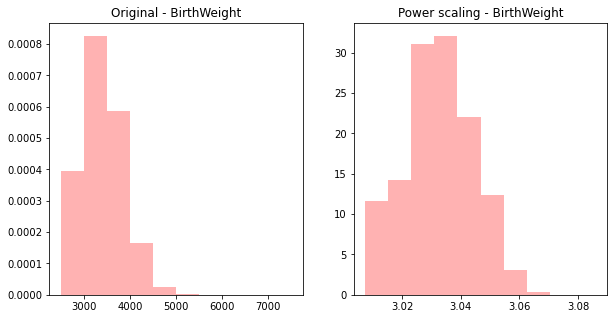

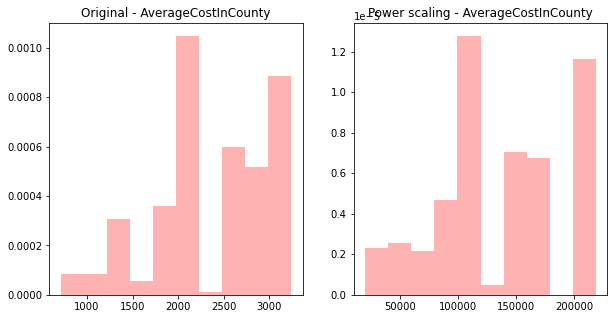

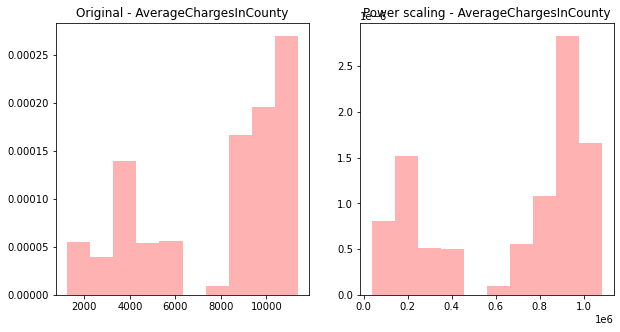

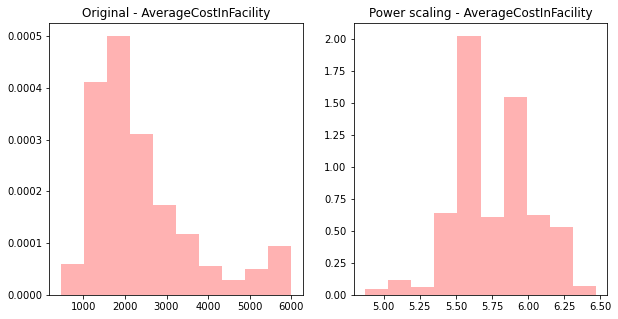

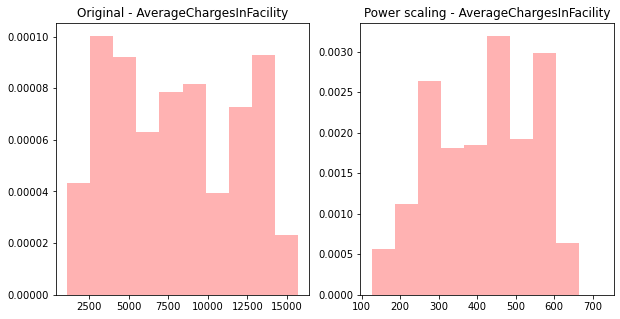

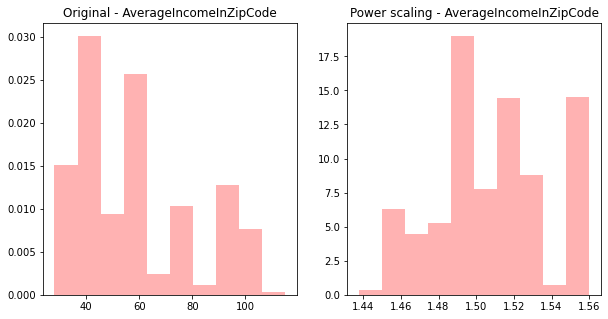

In [26]:
for numerical_column in numerical_columns:
    PowerTransformer_column = PowerTransformer(method='yeo-johnson', standardize=False).fit(hospital_df_test[[numerical_column]])
    RM_power = PowerTransformer_column.transform(hospital_df_train[[numerical_column]])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(hospital_df_test[numerical_column], alpha=0.3, color='r', density=True)
    plt.title("Original - "+numerical_column)

    plt.subplot(1,2,2)
    plt.hist(RM_power, alpha=0.3, color='r', density=True)
    plt.title("Power scaling - "+numerical_column )

<span style="font-size:1em;">✔</span> **Observations:** 
- The power transformation only seems to be effective for BirthWeight, but in order to apply it, the same method has to be applied to both the training and test set, so it's probably better to avoid power scaling with yeo-johnson

### Power Scaling with box-cox

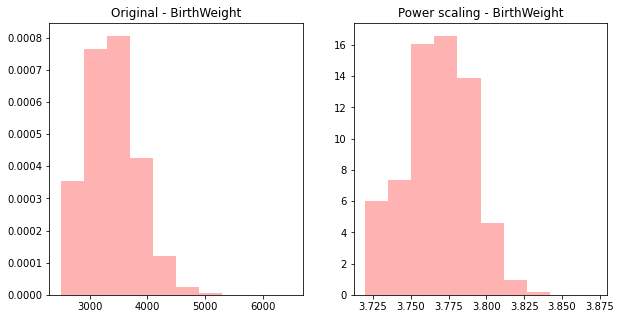

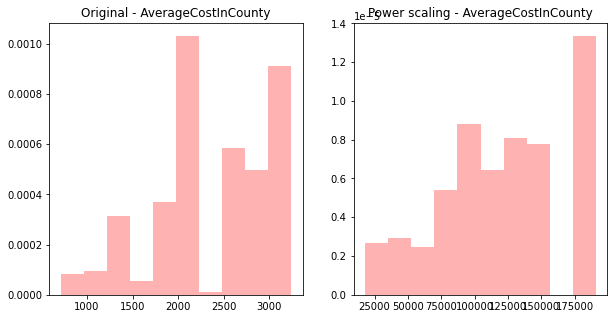

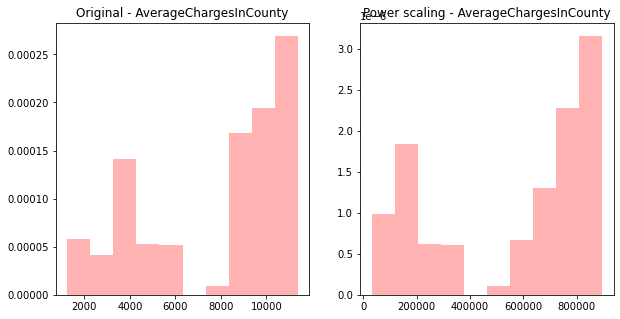

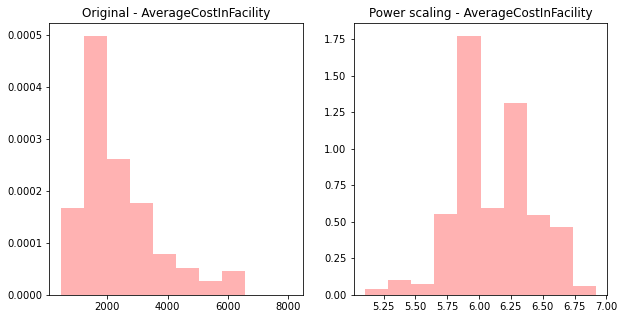

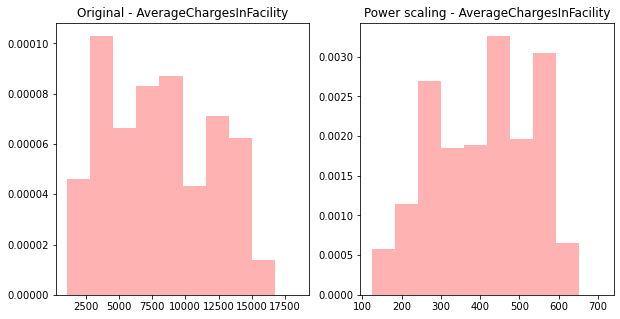

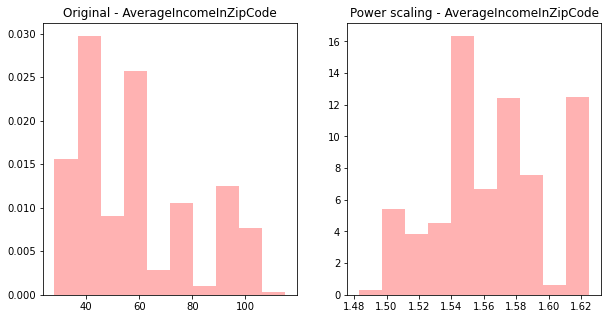

In [27]:
for numerical_column in numerical_columns:
    PowerTransformer_column = PowerTransformer(method='box-cox', standardize=False).fit(hospital_df_train[[numerical_column]])
    RM_power = PowerTransformer_column.transform(hospital_df_train[[numerical_column]])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(hospital_df_train[numerical_column], alpha=0.3, color='r', density=True)
    plt.title("Original - "+numerical_column)

    plt.subplot(1,2,2)
    plt.hist(RM_power, alpha=0.3, color='r', density=True)
    plt.title("Power scaling - "+numerical_column )

<span style="font-size:1em;">✔</span> **Observations:** 
- The power transformation is effective in producing a good distribution for BirthWeight, AverageCostInFacility and AverageChargesInFacility

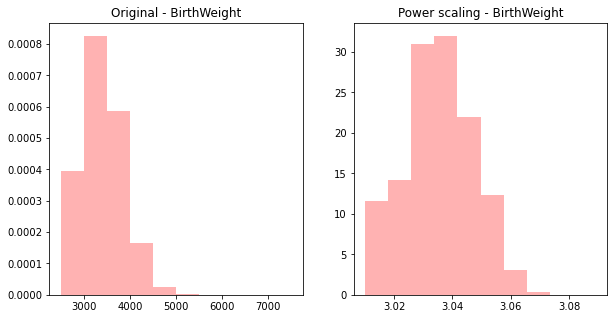

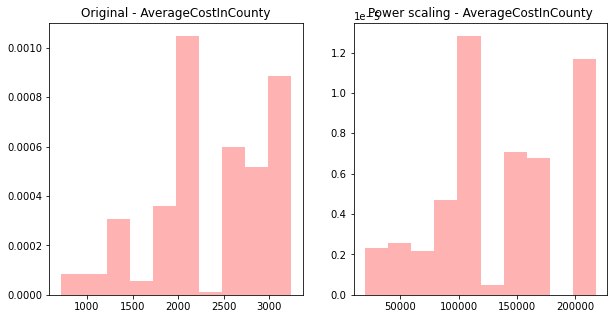

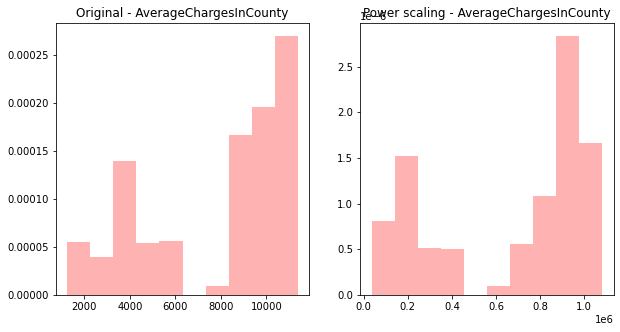

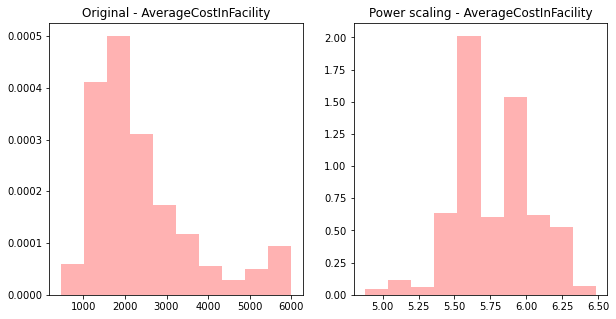

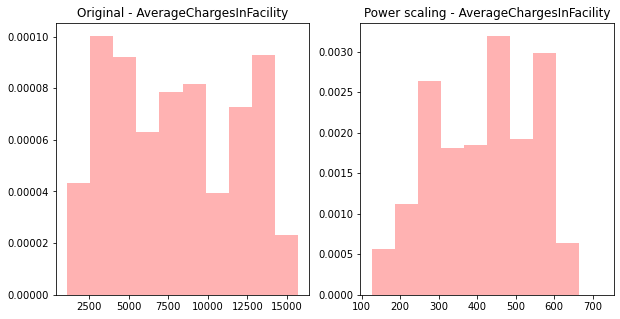

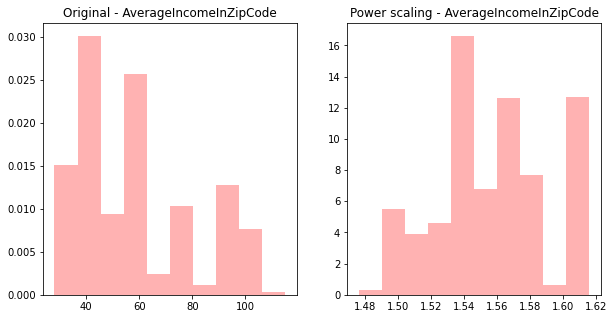

In [28]:
for numerical_column in numerical_columns:
    PowerTransformer_column = PowerTransformer(method='box-cox', standardize=False).fit(hospital_df_test[[numerical_column]])
    RM_power = PowerTransformer_column.transform(hospital_df_train[[numerical_column]])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(hospital_df_test[numerical_column], alpha=0.3, color='r', density=True)
    plt.title("Original - "+numerical_column)

    plt.subplot(1,2,2)
    plt.hist(RM_power, alpha=0.3, color='r', density=True)
    plt.title("Power scaling - "+numerical_column )

<span style="font-size:1em;">✔</span> **Observations:** 
- The power transformation is effective in producing a good distribution for BirthWeight, AverageCostInFacility and AverageChargesInFacility

### Applying Power Transformer

From the results above, box-cox is the more effective method for both the training and testing sets, specfically for BirthWeight, AverageCostInFacility and AverageChargesInFacility, so we will apply the power transformer to these variables


In [29]:
power_transform_columns = ['BirthWeight', 'AverageCostInFacility','AverageChargesInFacility']

In [30]:
for power_transform_column in power_transform_columns:
    PowerTransformerApplyer = PowerTransformer(method='box-cox', standardize=False).fit(hospital_df_train[[power_transform_column]])
    
    # Apply the tranformation to train data and save in the dataframe
    hospital_df_train[power_transform_column] = PowerTransformerApplyer.transform(hospital_df_train[[power_transform_column]])

    # Apply the tranformation to train data and save in the dataframe
    hospital_df_test[power_transform_column] = PowerTransformerApplyer.transform(hospital_df_test[[power_transform_column]])


### Checking distributions after Power Scaling

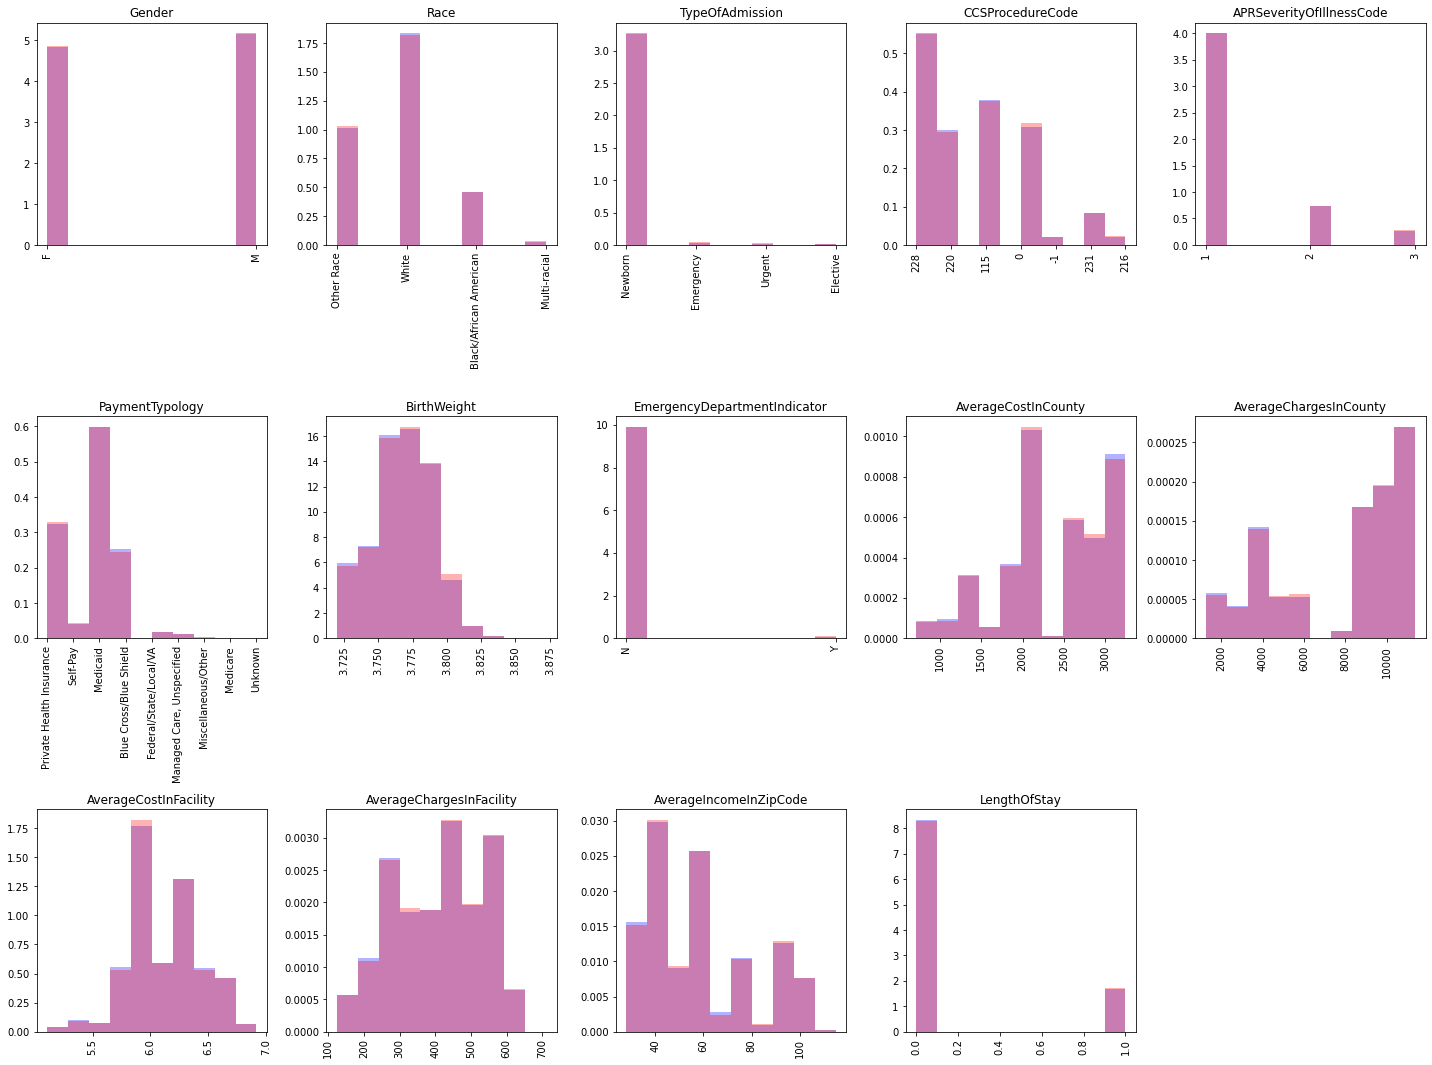

In [31]:
plt.figure(figsize=(20,20))
for i, col in enumerate(hospital_df.columns):
    plt.subplot(4,5,i+1)
    _, bins, _ = plt.hist(hospital_df_train[col], alpha=0.3, color='b', density=True)
    #print(bins)
    plt.hist(hospital_df_test[col], bins=bins, alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.tight_layout()

<span style="font-size:1em;">✔</span> **Observations:** 
- Just like before there is an even distribution, between training and testing, which is what we want

## Encoding Categorical Data

We remove the class from the variables to one-hot encode

In [32]:
categorical_x_columns = list(set(categorical_columns) - set(['LengthOfStay']))

In [33]:
categorical_x_columns

['Gender',
 'TypeOfAdmission',
 'PaymentTypology',
 'Race',
 'EmergencyDepartmentIndicator',
 'APRSeverityOfIllnessCode',
 'CCSProcedureCode']

In [34]:
categorical_columns

['Gender',
 'Race',
 'TypeOfAdmission',
 'CCSProcedureCode',
 'APRSeverityOfIllnessCode',
 'PaymentTypology',
 'EmergencyDepartmentIndicator',
 'LengthOfStay']

In [35]:
# One-hot encoding training data
for categorical_column in categorical_x_columns:
    OneHotEncoder_column = OneHotEncoder(handle_unknown='ignore')
    OneHotEncoder_column.fit(hospital_df_train[[categorical_column]])

    onehot_ = OneHotEncoder_column.transform(hospital_df_train[[categorical_column]]).toarray()
    
    colName = categorical_column
    for i in range(len(OneHotEncoder_column.categories_[0])):
        hospital_df_train[colName + '_' + str(OneHotEncoder_column.categories_[0][i])] = onehot_[:,i]

# One-hot encoding testing data
for categorical_column in categorical_x_columns:
    OneHotEncoder_column = OneHotEncoder(handle_unknown='ignore')
    OneHotEncoder_column.fit(hospital_df_test[[categorical_column]])

    onehot_ = OneHotEncoder_column.transform(hospital_df_test[[categorical_column]]).toarray()
    
    colName = categorical_column
    for i in range(len(OneHotEncoder_column.categories_[0])):
        hospital_df_test[colName + '_' + str(OneHotEncoder_column.categories_[0][i])] = onehot_[:,i]




In [36]:
hospital_df_train

Gender                    Race TypeOfAdmission CCSProcedureCode  \
59711      F              Other Race         Newborn              228   
19311      M                   White         Newborn              220   
10424      M                   White         Newborn              220   
5255       M                   White         Newborn              228   
25116      M  Black/African American         Newborn              115   
...      ...                     ...             ...              ...   
18609      M  Black/African American         Newborn              228   
3538       M                   White         Newborn              228   
52723      F  Black/African American         Newborn              228   
12849      F                   White         Newborn              220   
19146      F  Black/African American         Newborn              228   

      APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
59711                        1  Private Health Insurance     3.726685   
19311                        1  Private Health Insurance     3.794793   
10424                        1                  Self-Pay     3.806594   
5255                         1  Private Health Insurance     3.762326   
25116                        2                  Medicaid     3.790610   
...                        ...                       ...          ...   
18609                        1  Private Health Insurance     3.733285   
3538                         1  Private Health Insurance     3.733285   
52723                        1                  Medicaid     3.762326   
12849                        1    Blue Cross/Blue Shield     3.762326   
19146                        1                  Medicaid     3.733285   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
59711                            N                 1826   
19311                            N                 3155   
10424                            N                 2158   
5255                             N                 2318   
25116                            N                 2018   
...                            ...                  ...   
18609                            N                 2611   
3538                             N                 1665   
52723                            N                 3155   
12849                            N                 3155   
19146                            N                 2611   

       AverageChargesInCounty  AverageCostInFacility  \
59711                    4190               5.967110   
19311                   11381               6.332514   
10424                    4620               6.279091   
5255                     1857               6.166956   
25116                    3610               6.080429   
...                       ...                    ...   
18609                    9227               5.965228   
3538                     2096               5.327060   
52723                   11381               6.304199   
12849                   11381               6.427130   
19146                    9227               5.965228   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  \
59711                284.502474                      55             1   
19311                489.256344                      45             0   
10424                273.289297                      56             0   
5255                 169.812260                      45             0   
25116                257.234448                      58             0   
...                         ...                     ...           ...   
18609                426.592016                      45             0   
3538                 159.669350                      43             0   
52723                581.872825                      45             1   
12849                574.171949                      74             0   
19146                426.592016                      45            

The encoding looks good, now we can drop the original columns

In [37]:
for categorical_column in categorical_x_columns:
    
    hospital_df_train = hospital_df_train.drop(categorical_column, axis=1)
    hospital_df_test = hospital_df_test.drop(categorical_column, axis=1)

In [38]:
hospital_df_train

BirthWeight  AverageCostInCounty  AverageChargesInCounty  \
59711     3.726685                 1826                    4190   
19311     3.794793                 3155                   11381   
10424     3.806594                 2158                    4620   
5255      3.762326                 2318                    1857   
25116     3.790610                 2018                    3610   
...            ...                  ...                     ...   
18609     3.733285                 2611                    9227   
3538      3.733285                 1665                    2096   
52723     3.762326                 3155                   11381   
12849     3.762326                 3155                   11381   
19146     3.733285                 2611                    9227   

       AverageCostInFacility  AverageChargesInFacility  \
59711               5.967110                284.502474   
19311               6.332514                489.256344   
10424               6.279091                273.289297   
5255                6.166956                169.812260   
25116               6.080429                257.234448   
...                      ...                       ...   
18609               5.965228                426.592016   
3538                5.327060                159.669350   
52723               6.304199                581.872825   
12849               6.427130                574.171949   
19146               5.965228                426.592016   

       AverageIncomeInZipCode  LengthOfStay  Gender_F  Gender_M  \
59711                      55             1       1.0       0.0   
19311                      45             0       0.0       1.0   
10424                      56             0       0.0       1.0   
5255                       45             0       0.0       1.0   
25116                      58             0       0.0       1.0   
...                       ...           ...       ...       ...   
18609                      45             0       0.0       1.0   
3538                       43             0       0.0       1.0   
52723                      45             1       1.0       0.0   
12849                      74             0       1.0       0.0   
19146                      45             0       1.0       0.0   

       TypeOfAdmission_Elective  TypeOfAdmission_Emergency  \
59711                       0.0                        0.0   
19311                       0.0                        0.0   
10424                       0.0                        0.0   
5255                        0.0                        0.0   
25116                       0.0                        0.0   
...                         ...                        ...   
18609                       0.0                        0.0   
3538                        0.0                        0.0   
52723                       0.0                        0.0   
12849                       0.0                        0.0   
19146                       0.0                        0.0   

       TypeOfAdmission_Newborn  TypeOfAdmission_Urgent  \
59711                      1.0                     0.0   
19311                      1.0                     0.0   
10424                      1.0                     0.0   
5255                       1.0                     0.0   
25116                      1.0                     0.0   
...                        ...                     ...   
18609                      1.0                     0.0   
3538                       1.0                     0.0   
52723                      1.0                     0.0   
12849                      1.0                     0.0   
19146                      1.0                     0.0   

       PaymentTypology_Blue Cross/Blue Shield  \
59711                                     0.0   
19311                                     0.0   
10424                                     0.0   
5255                                      0.0   
25116        

# Baseline Model

### Strategy

 - This is a logisitc regression problem with binary classification
 - There is a class imbalance, however that imbalance is proportionate in both the trainig and testing data. The performance measure, thus, will have to account for both the precision and recall - so optimizing the F1-score for both is ideal. 
 - For the baseline model, we will create a simple model without cross-validation, polynomial features or regularization and the simplest logistic regression hyperparameters to setup the evaluation pipeline
 

First we split the train and test sets by the input and output variables

In [40]:
train_X = hospital_df_train.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = hospital_df_train[['LengthOfStay']].to_numpy()

test_X = hospital_df_test.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = hospital_df_test[['LengthOfStay']].to_numpy()

Then we perform normalization with the MinMaxScaler to get all numerical variables between 0 and 1

In [41]:
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)


In [42]:
clf = LogisticRegression(penalty='none', max_iter=1000).fit(train_X, train_y.ravel())

Classification Report

In [43]:
test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10033
           1       0.58      0.16      0.25      1960

    accuracy                           0.84     11993
   macro avg       0.72      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



Confusion Matrix

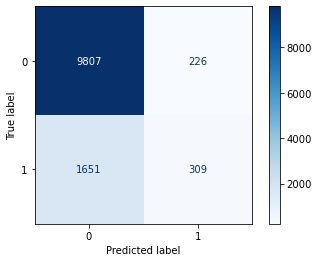

In [44]:
disp = plot_confusion_matrix(clf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- The model results in good precision, recall and f1-score for class 0
- However, while the average accuracy is decent for a baseline model,the precision, recall and f1-score of class 1, as well as the macro average paint a different picture
- Of all the instances that are predicted as 1, around 61% are actually of class 1
- If we look at the recall of class 1 though, it is very low and the model is basically predicting most instances that should be 1 as 0, around (1-0.16) = 84% of them wrong. 
- The f1-score of class 1 is therefore very low
- The macro average captures this disparity well, since it's weighing the accuracy of both classes equally
- The weighted average is significantly higher since there are far more 0s than 1s in the target variable, which is being classified very well. 


Feature Importance

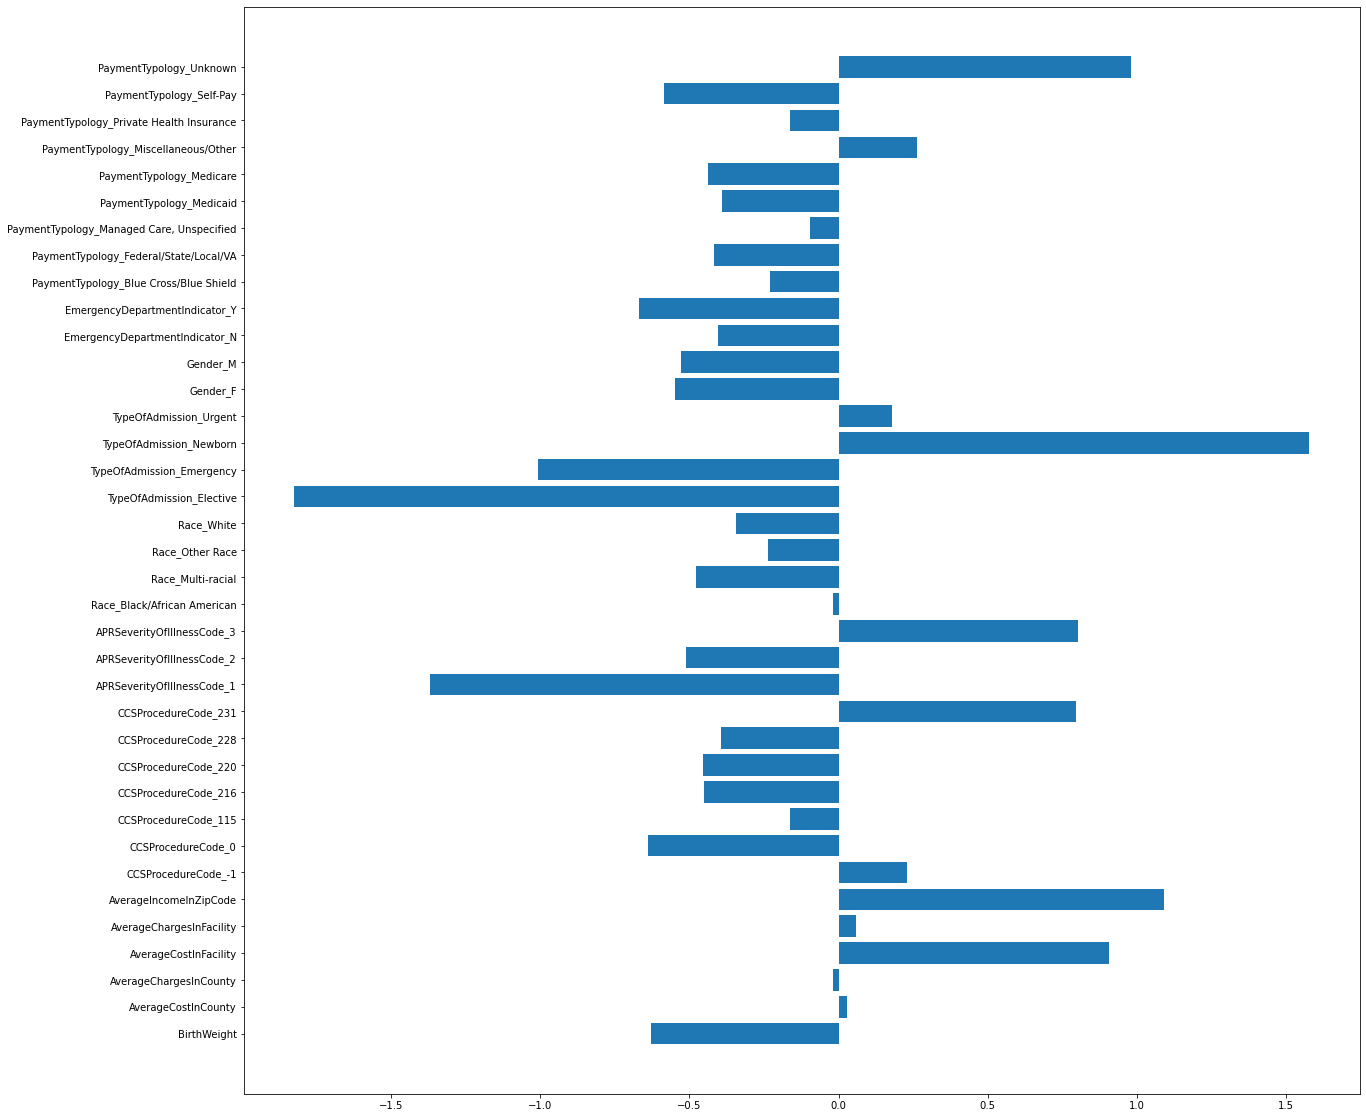

In [45]:
plt.figure(figsize=(20,20))
plt.barh(hospital_df_train.drop(['LengthOfStay',], axis=1).columns, clf.coef_[0])
plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- Whether or not the TypeOfAdmission is a 'Newborn' highly positively influences the outcome
- Whether or not the APRSeverityOffIlnessCode is 3 positively influences the outcome
- Whether or not the CCSPRocedureCode is 231 positively influences the outcome
- Whether or not the PaymentTypology is Unknown positively influences the outcome
- The AverageIncomeInZipCode and AverageCostInFacility positively influence the outcome
- Whether or not the TypeOfAdmission is 'Elective' very negatively influences the outcome
- It will be interesting to see how the feature importance evolves


### Class Weights

One way to deal with this class imbalance is to use the 'class_weights' parameter of the logistic regressor. We can either use the in-built 'balanced' mode, or define our own set of weighted splits. We will try both.

In order to find the best set of weights, we can perform gridsearch with different combinations of weights and use the weights with the best F1-score

The code I used here is from this really helpful article - https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Text(0.5, 1.0, 'Scoring for different class weights')

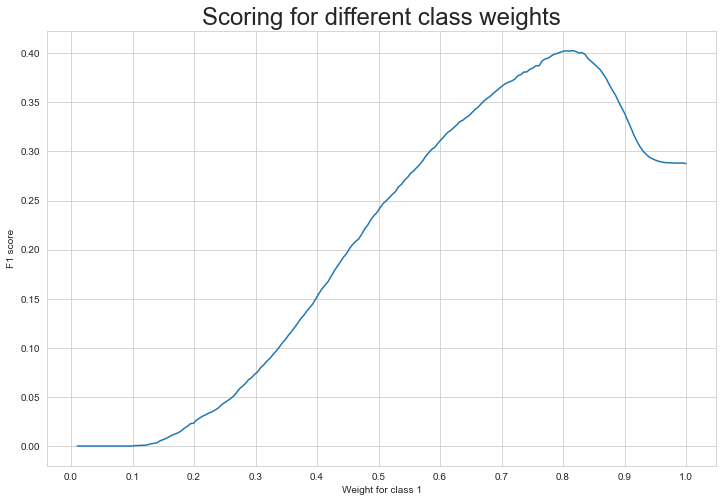

In [152]:
clf = LogisticRegression(penalty='none', max_iter=100)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= clf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(train_X, train_y)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Now we can try this for all solvers, to see if different solvers prefer a different split

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


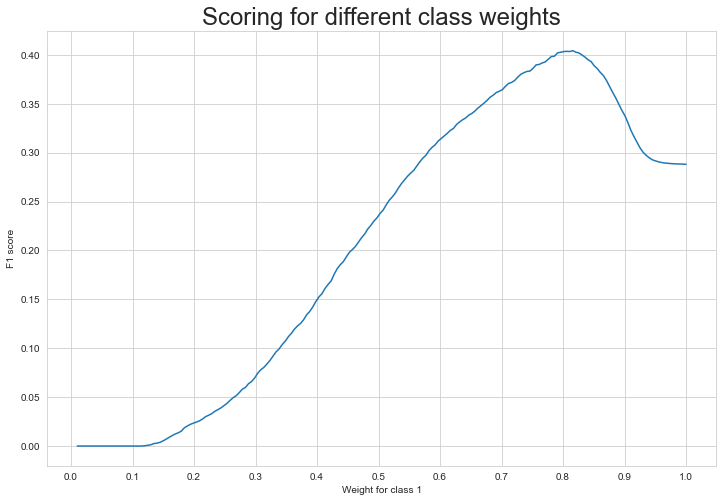

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

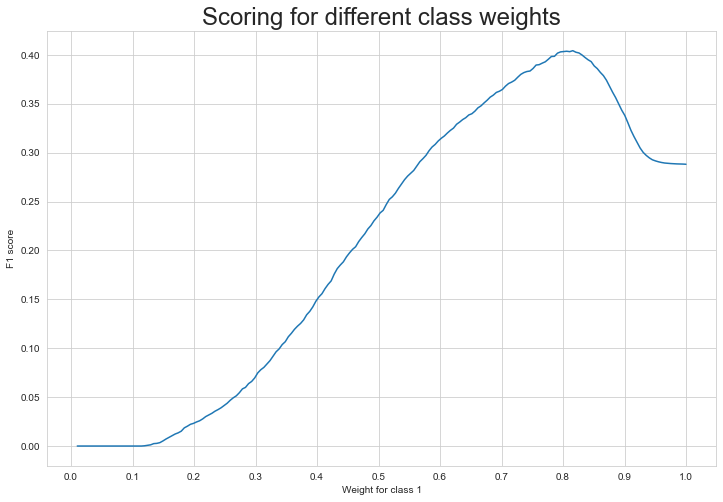

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


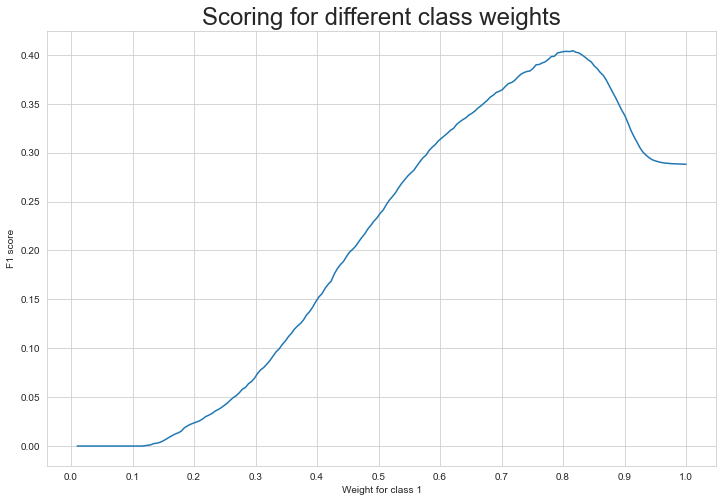

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


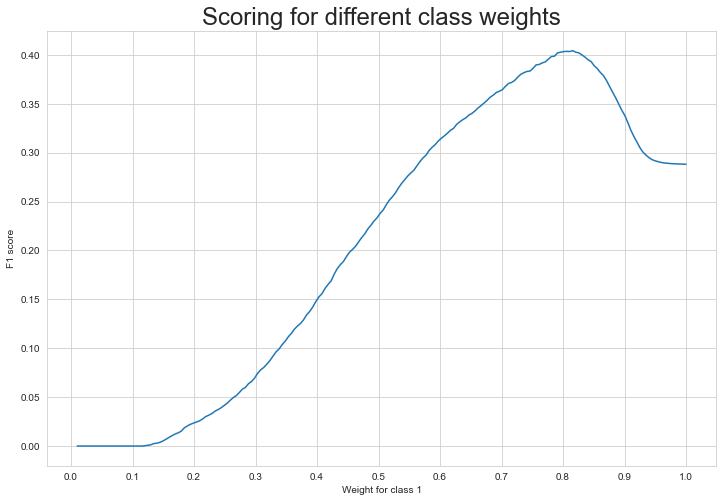

In [56]:
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
for solver in solvers:
    
    clf = LogisticRegression(penalty='none',solver = solver, max_iter=100)

    #Setting the range for class weights
    weights = np.linspace(0.0,0.99,200)

    #Creating a dictionary grid for grid search
    param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

    #Fitting grid search to the train data with 5 folds
    gridsearch = GridSearchCV(estimator= clf, 
                              param_grid= param_grid,
                              cv=StratifiedKFold(), 
                              n_jobs=-1, 
                              scoring='f1', 
                              verbose=2).fit(train_X, train_y)

    #Ploting the score for different values of weight
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,8))
    weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
    sns.lineplot(weigh_data['weight'], weigh_data['score'])
    plt.xlabel('Weight for class 1')
    plt.ylabel('F1 score')
    plt.xticks([round(i/10,1) for i in range(0,11,1)])
    plt.title('Scoring for different class weights', fontsize=24)
    plt.show()

All solvers seem to have the same results, so we can infer the best weighted split between classes from any of the figures.
The best split seems to be {1:0.81, 0:0.19}

We can now test the impact of both 'balanced' and our custom split

In [50]:
class_weights = ['balanced', {1:0.81, 0:0.19}]

Class Weight - balanced
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     10033
           1       0.30      0.58      0.39      1960

    accuracy                           0.71     11993
   macro avg       0.60      0.66      0.60     11993
weighted avg       0.80      0.71      0.74     11993



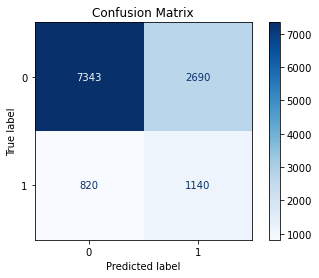

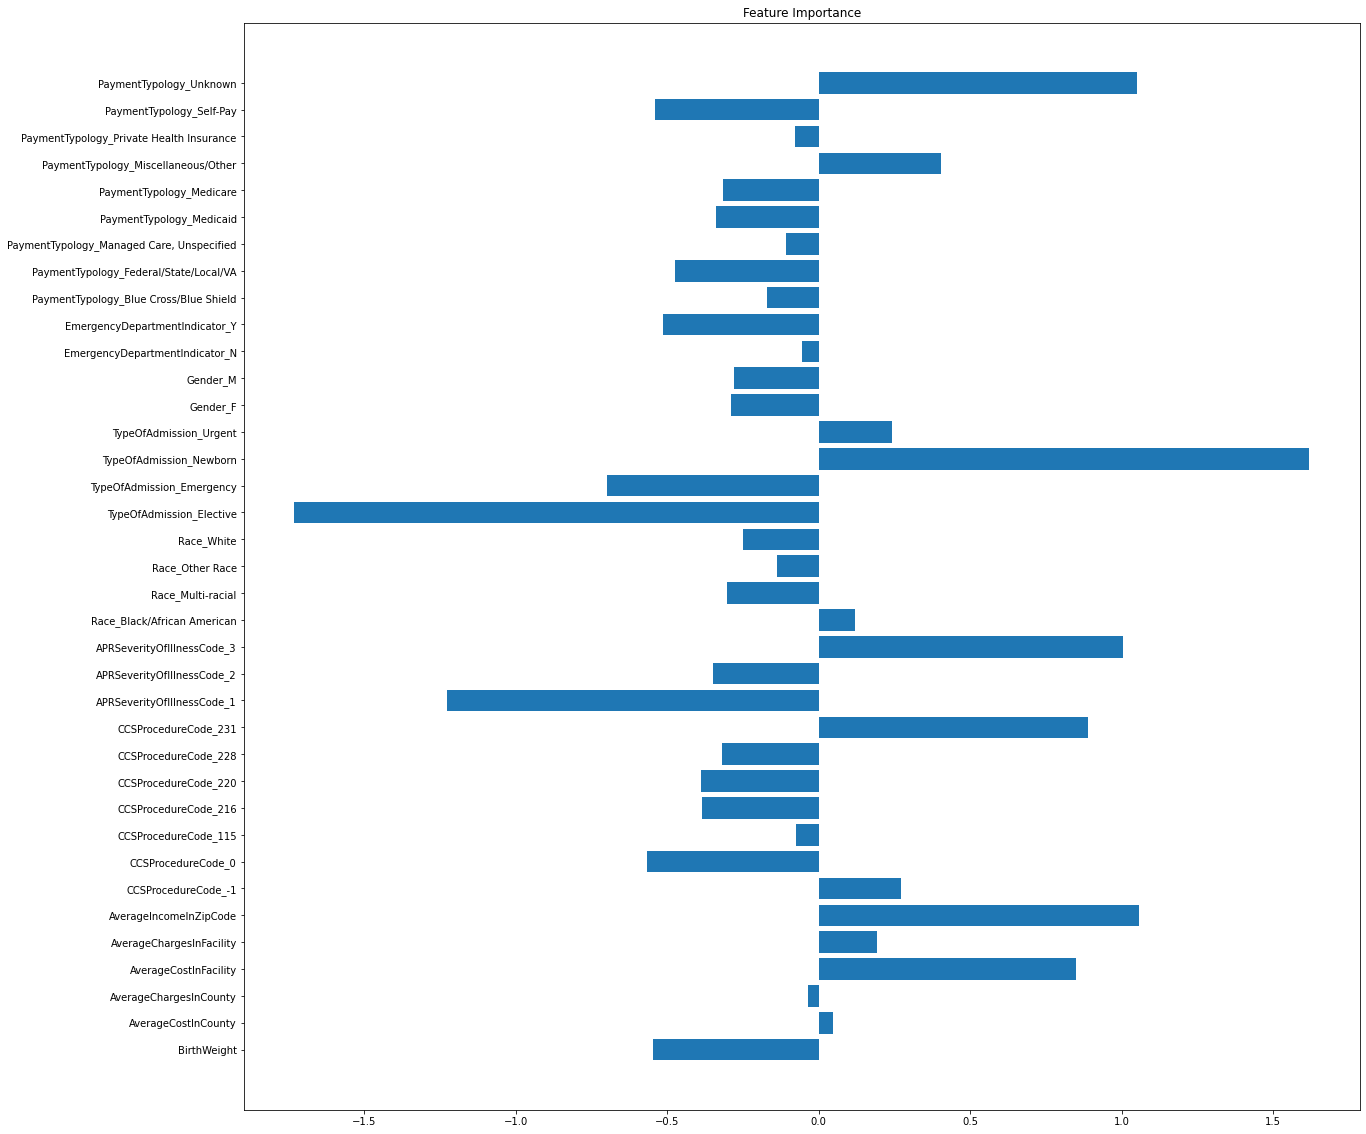

Class Weight - {1: 0.81, 0: 0.19}
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     10033
           1       0.32      0.51      0.40      1960

    accuracy                           0.75     11993
   macro avg       0.61      0.65      0.62     11993
weighted avg       0.80      0.75      0.77     11993



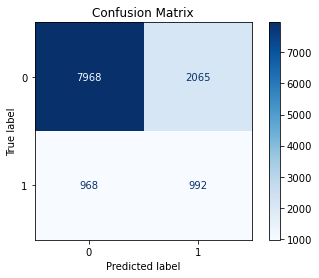

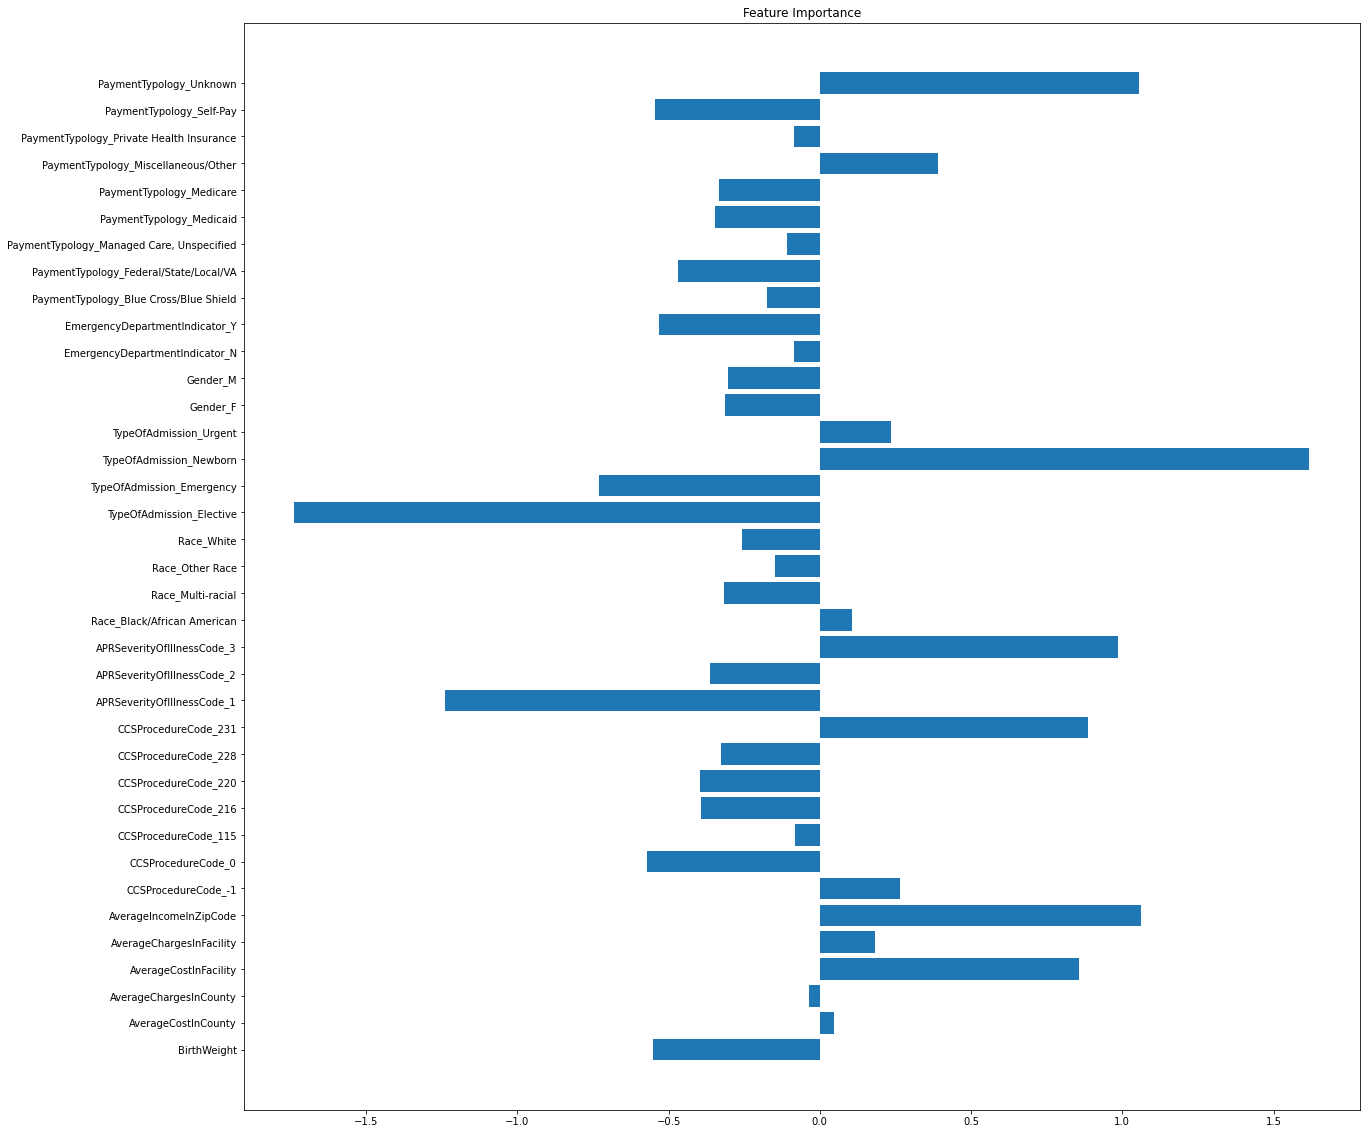

In [47]:
for class_weight in class_weights:
    train_X = hospital_df_train.drop(['LengthOfStay',], axis=1).to_numpy()
    train_y = hospital_df_train[['LengthOfStay']].to_numpy()

    test_X = hospital_df_test.drop(['LengthOfStay',], axis=1).to_numpy()
    test_y = hospital_df_test[['LengthOfStay']].to_numpy()

    scaler = MinMaxScaler()
    scaler.fit(train_X)

    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)

    f1_scorer = make_scorer(f1_score, average='weighted')

    clf = LogisticRegression(penalty='none', class_weight= class_weight, max_iter=1000).fit(train_X, train_y.ravel())

    test_pred = clf.predict(test_X)
    print("Class Weight - "+str(class_weight))
    print(classification_report(test_y, test_pred,))

    disp = plot_confusion_matrix(clf, test_X, test_y,
                                     cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    plt.figure(figsize=(20,20))
    plt.barh(hospital_df_train.drop(['LengthOfStay',], axis=1).columns, clf.coef_[0])
    plt.title("Feature Importance")
    plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- The custom split results in a better f1-score for class 0, and the same f1-score for class 1
- However, while the precision is higher with the custom split, the recall is lower
- Overall though, the custom split results in a higher average and weighted accuracy
- We will use both weights when optimizing hyperparameters
- The feature importance of both is very similar to the baseline model



### Solvers
- Now we can try the different solvers that the logistic regressor offers
- Note: We cant use 'liblinear' until we try regularization



In [48]:
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']

Solver - newton-cg
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10033
           1       0.58      0.16      0.25      1960

    accuracy                           0.84     11993
   macro avg       0.72      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



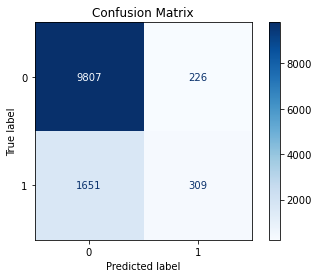

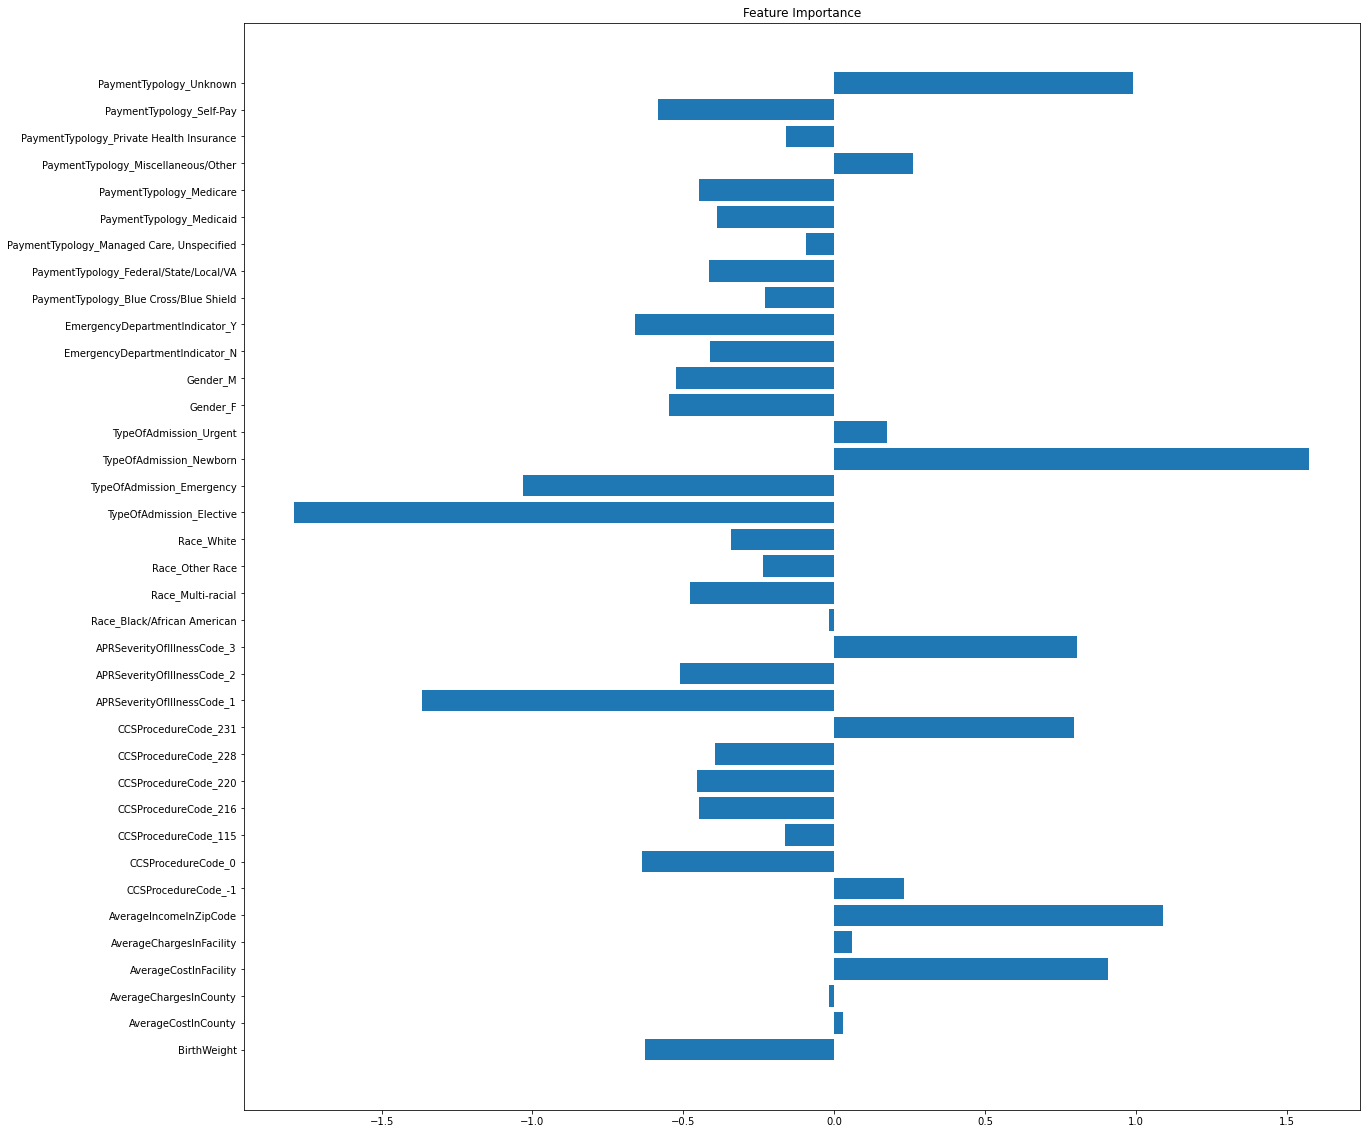

Solver - lbfgs
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10033
           1       0.58      0.16      0.25      1960

    accuracy                           0.84     11993
   macro avg       0.72      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



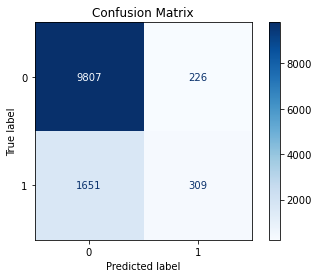

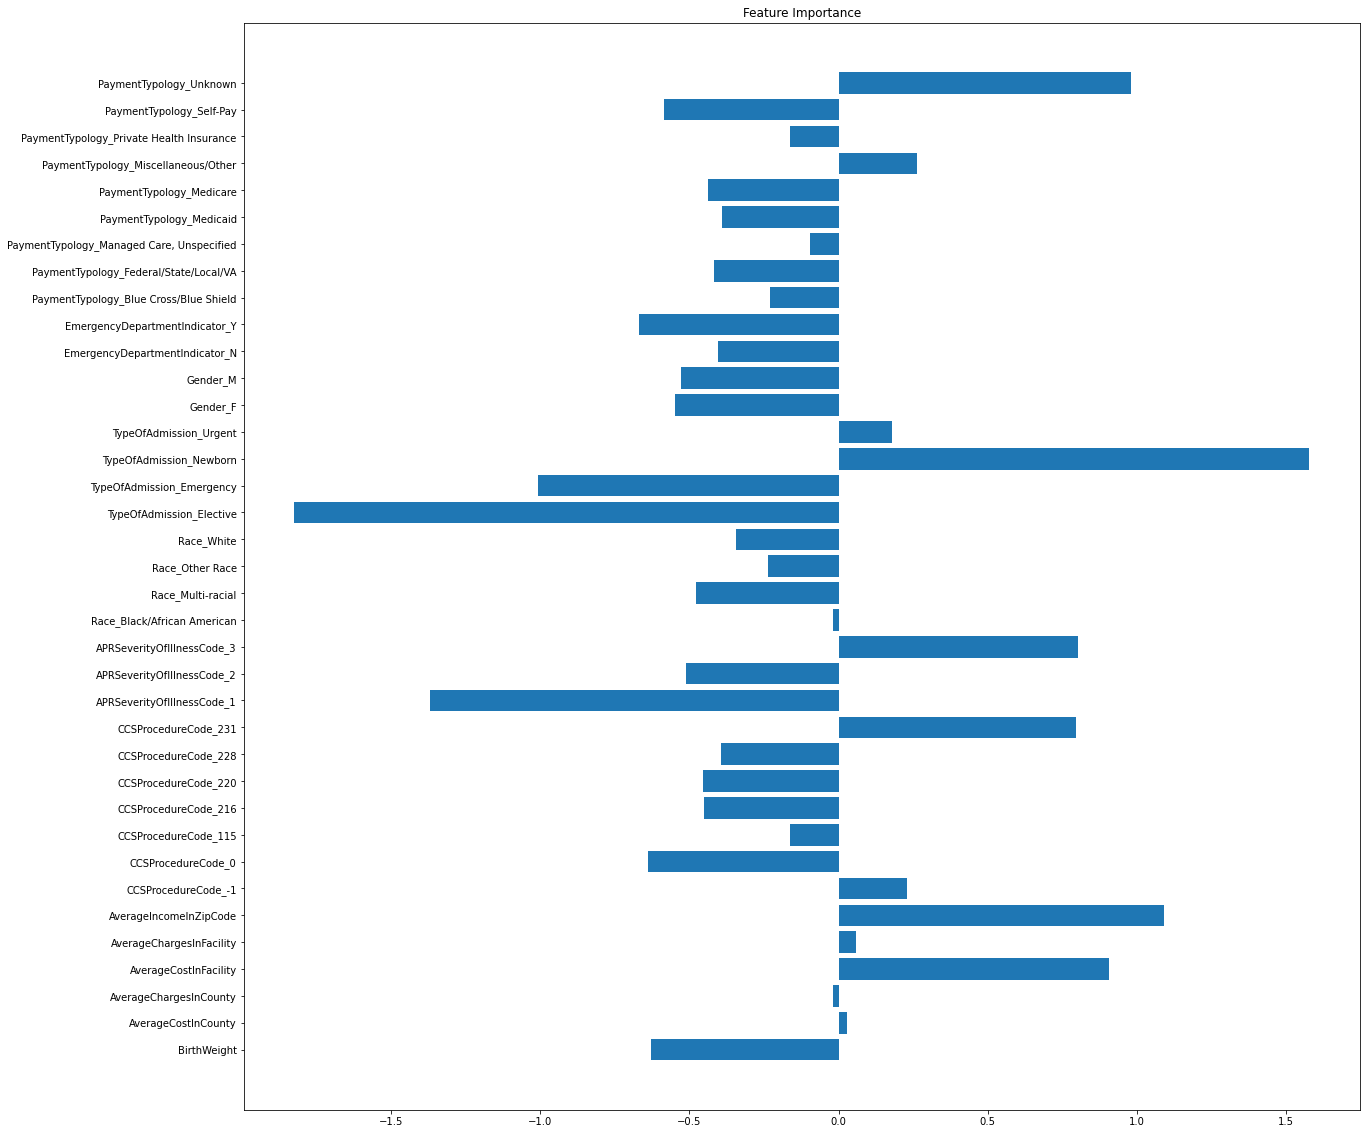

Solver - sag
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10033
           1       0.58      0.16      0.25      1960

    accuracy                           0.84     11993
   macro avg       0.72      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



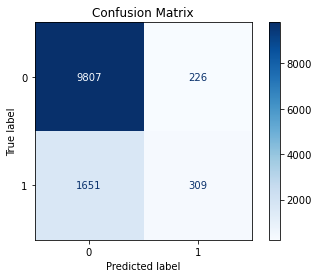

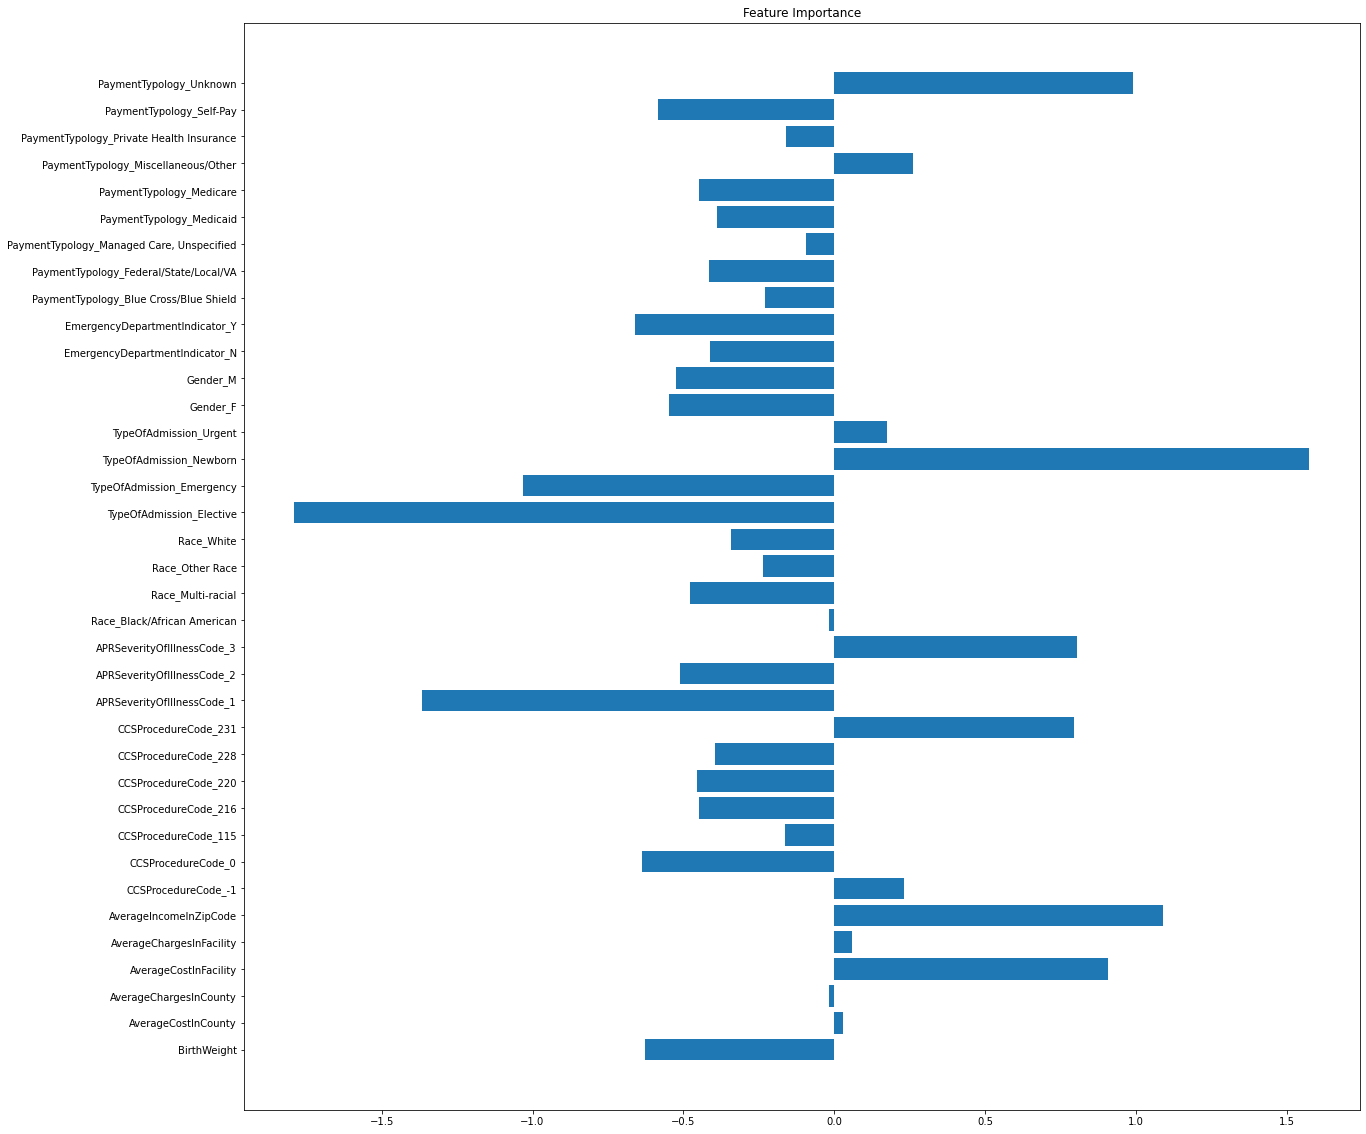

Solver - saga
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10033
           1       0.58      0.16      0.25      1960

    accuracy                           0.84     11993
   macro avg       0.72      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



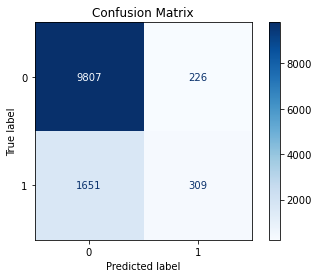

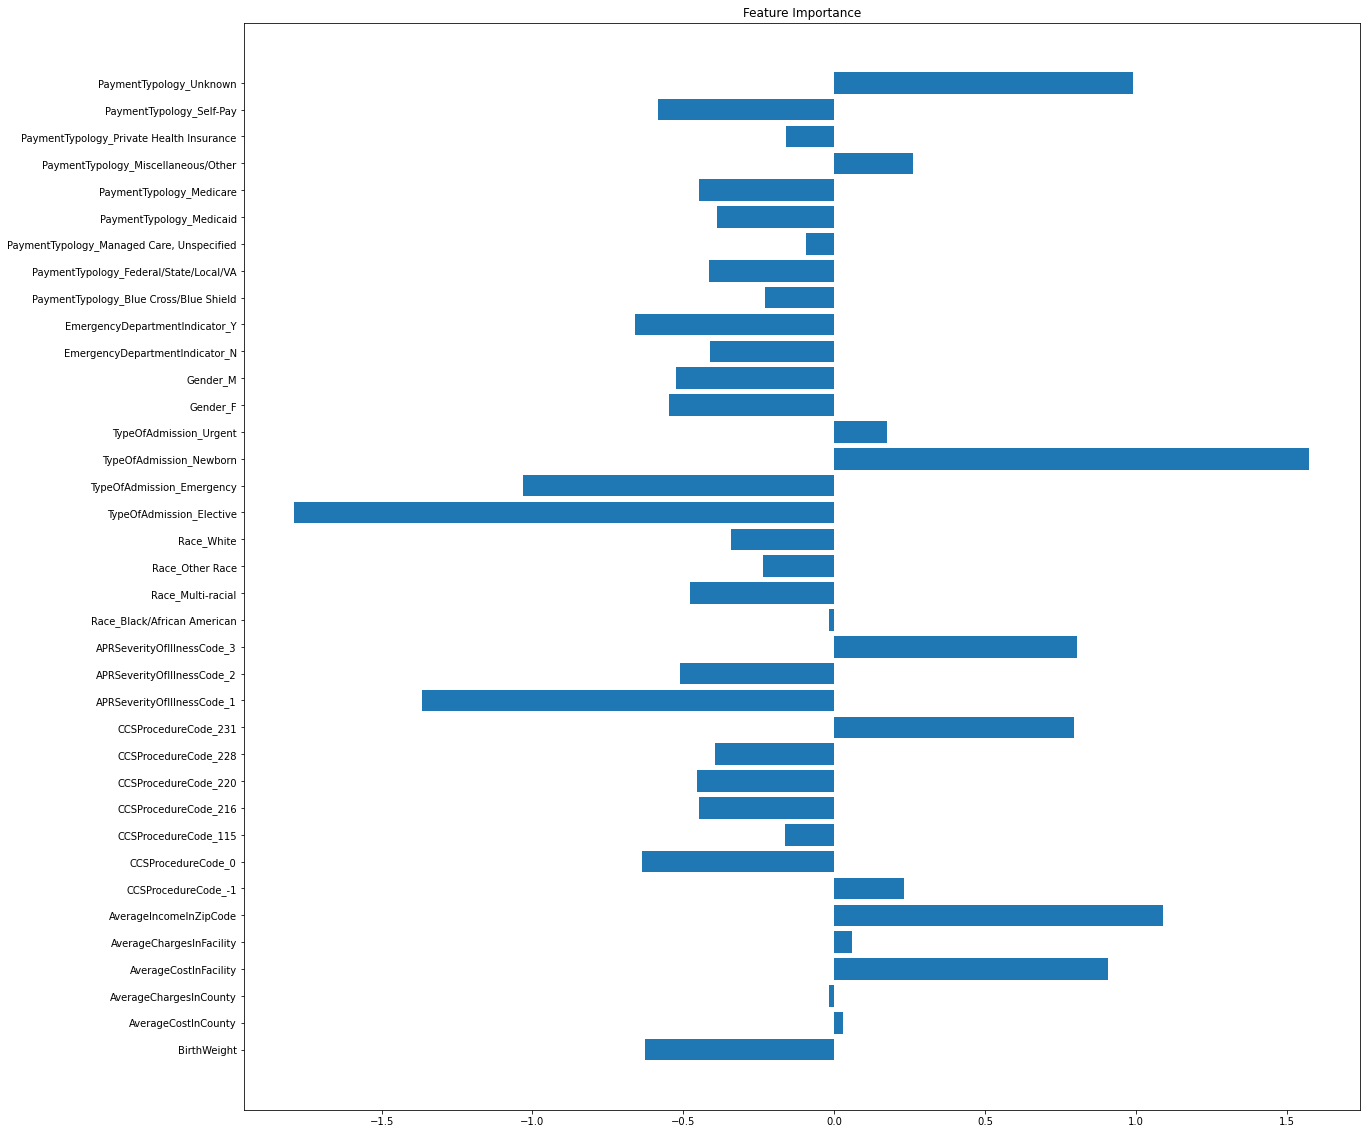

In [49]:
for solver in solvers: 

    train_X = hospital_df_train.drop(['LengthOfStay',], axis=1).to_numpy()
    train_y = hospital_df_train[['LengthOfStay']].to_numpy()

    test_X = hospital_df_test.drop(['LengthOfStay',], axis=1).to_numpy()
    test_y = hospital_df_test[['LengthOfStay']].to_numpy()

    scaler = MinMaxScaler()
    scaler.fit(train_X)

    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)

    f1_scorer = make_scorer(f1_score, average='weighted')

    clf = LogisticRegression(penalty='none', solver = solver, max_iter=1000).fit(train_X, train_y.ravel())

    test_pred = clf.predict(test_X)
    
    print("Solver - "+solver)
    print(classification_report(test_y, test_pred,))

    disp = plot_confusion_matrix(clf, test_X, test_y,
                                     cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    plt.figure(figsize=(20,20))
    plt.barh(hospital_df_train.drop(['LengthOfStay',], axis=1).columns, clf.coef_[0])
    plt.title("Feature Importance")
    plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- All solvers result in the exact same performance. There may not be much difference in the way these solvers work on this particular dataset. Still, we can try using all of them in combination with other hyperparameters when optimizing
-  By itself, the solvers dont seem to make much of an improvement over the baseline model, at least not as much as the  difference that class_weights made
- The feature importance between each solver is very similar to each other and the baseline model

### Applying Polynomial features

In [159]:
feature_degrees = [1,2,3,4]

Feature Degree = 1
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9982
           1       0.60      0.15      0.24      2011

    accuracy                           0.84     11993
   macro avg       0.73      0.57      0.58     11993
weighted avg       0.81      0.84      0.80     11993



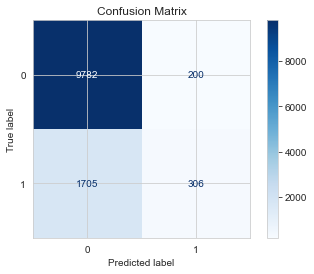

Feature Degree = 2
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9982
           1       0.60      0.17      0.27      2011

    accuracy                           0.84     11993
   macro avg       0.73      0.58      0.59     11993
weighted avg       0.81      0.84      0.80     11993



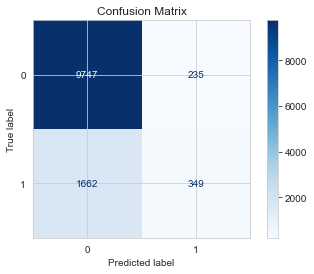

Feature Degree = 3
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9982
           1       0.59      0.19      0.28      2011

    accuracy                           0.84     11993
   macro avg       0.72      0.58      0.60     11993
weighted avg       0.81      0.84      0.81     11993



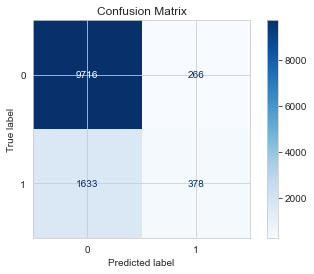

Feature Degree = 4


MemoryError: Unable to allocate 36.2 GiB for an array with shape (47971, 101270) and data type float64

In [164]:
for feature_degree in feature_degrees: 
    print("Feature Degree = "+str(feature_degree))
    train_X = hospital_df_train.drop(['LengthOfStay',], axis=1).to_numpy()
    train_y = hospital_df_train[['LengthOfStay']].to_numpy()

    test_X = hospital_df_test.drop(['LengthOfStay',], axis=1).to_numpy()
    test_y = hospital_df_test[['LengthOfStay']].to_numpy()

    poly = PolynomialFeatures(feature_degree)
    poly.fit(train_X)
    train_X = poly.transform(train_X)
    test_X = poly.transform(test_X)

    scaler = MinMaxScaler()
    scaler.fit(train_X)

    train_X = scaler.transform(train_X)

    test_X = scaler.transform(test_X)



    f1_scorer = make_scorer(f1_score, average='weighted')

    clf = LogisticRegression(penalty='none', max_iter=1000).fit(train_X, train_y.ravel())

    test_pred = clf.predict(test_X)

    print(classification_report(test_y, test_pred,))
    
    disp = plot_confusion_matrix(clf, test_X, test_y,
                                     cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    

<span style="font-size:1em;">✔</span> **Observations:** 
- The results seem to generally get better as we increase the number of polynomial features (even if ever so slightly), however we will have to use regularization to simplify the model and even check for overfitting
- Polynomial features > 3 results in a memory error, so that's the max we can use


## Regularization + Tuning Hyperparameters

### Strategy:
- We loop over each unique combination of all the unique values of each hyperparameter
- Save each of the hyperparameters, models, and output to a list of all models
- Pick the model(s) with the best results

In [39]:
# All the unique values for hyperparameters we can use to tune the model
regularization_types = ['l1', 'l2']
lambda_paras = np.logspace(-5, 1, num=5)  
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularization_types= ['l1','l2']
polynomial_features = [2,3]

In [60]:
# List to save all the models we create
all_models = []

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s finished


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83      9954\n           1       0.32      0.49      0.39      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.60      0.64      0.61     11993\nweighted avg       0.79      0.74      0.76     11993\n'}


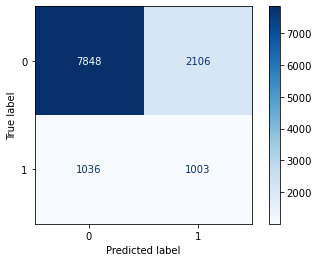

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.82      9954\n           1       0.32      0.57      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


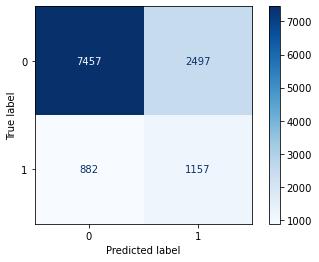

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


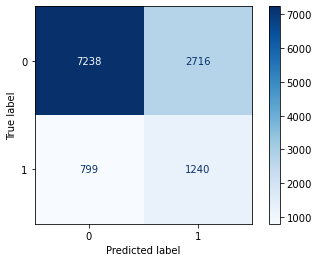

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


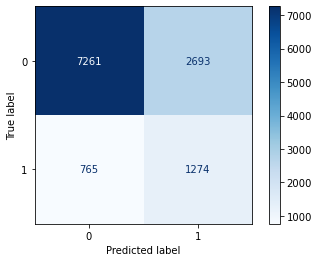

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.75     11993\n'}


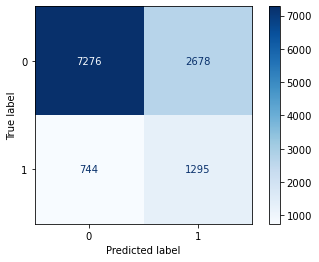

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83      9954\n           1       0.32      0.49      0.39      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.60      0.64      0.61     11993\nweighted avg       0.79      0.74      0.76     11993\n'}


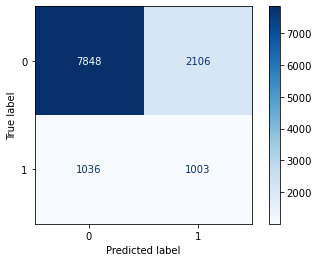

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.82      9954\n           1       0.32      0.57      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


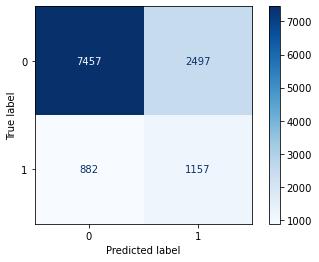

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


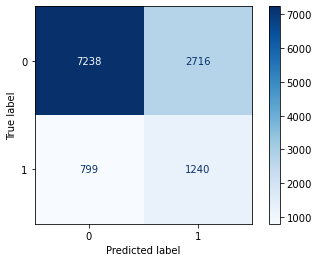

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


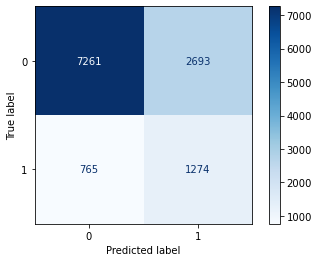

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.75     11993\n'}


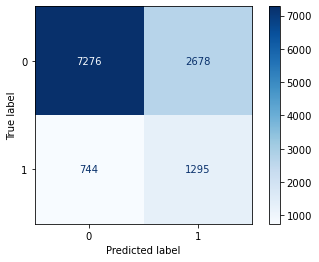

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


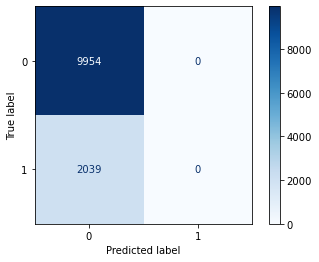

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


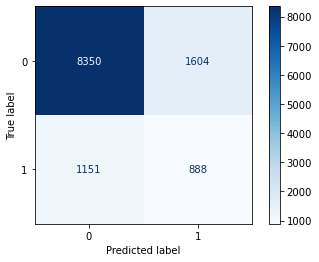

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


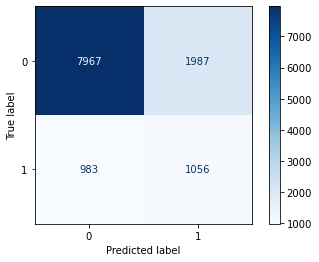

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


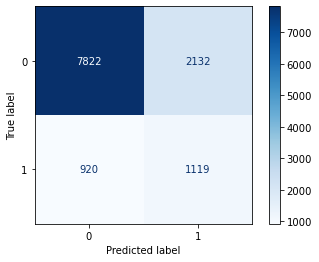

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.5s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.81      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.81      0.75      0.77     11993\n'}


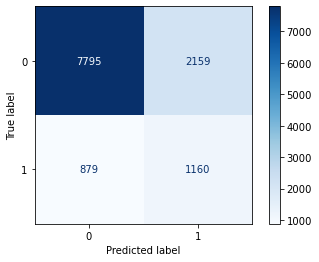

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


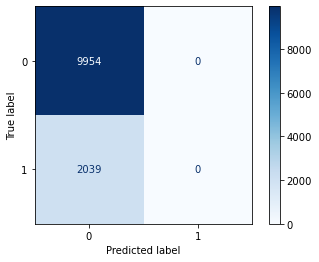

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


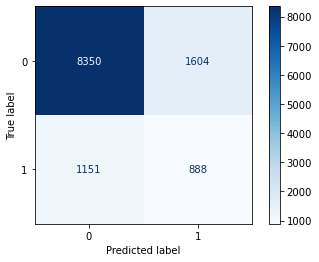

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


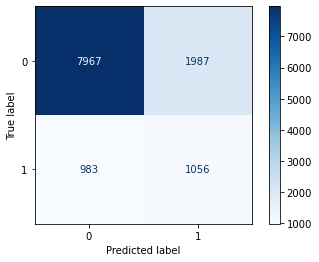

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


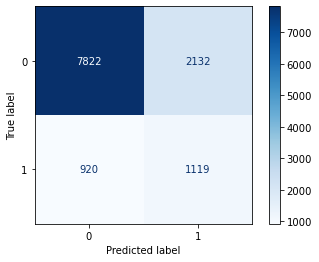

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.1s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.81      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.81      0.75      0.77     11993\n'}


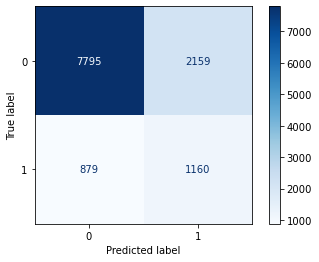

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83      9954\n           1       0.32      0.49      0.39      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.60      0.64      0.61     11993\nweighted avg       0.79      0.74      0.76     11993\n'}


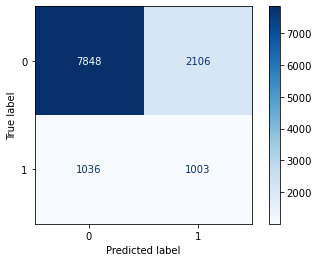

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.82      9954\n           1       0.32      0.57      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


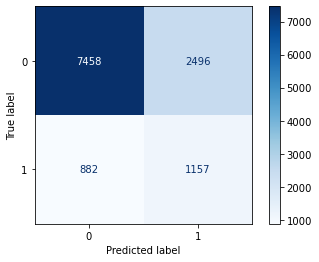

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


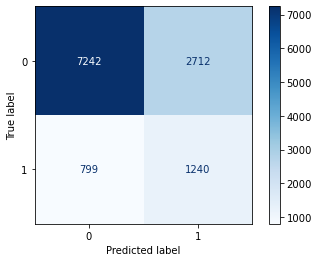

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


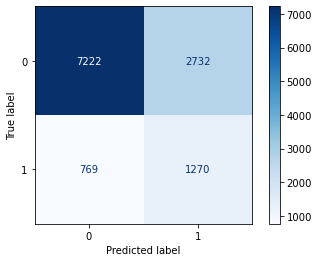

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


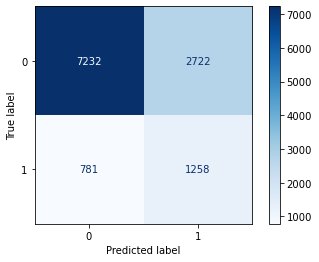

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83      9954\n           1       0.32      0.49      0.39      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.60      0.64      0.61     11993\nweighted avg       0.79      0.74      0.76     11993\n'}


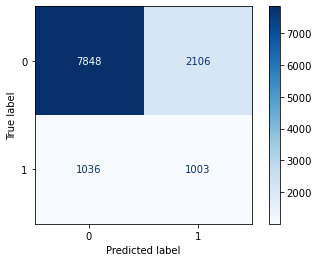

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.82      9954\n           1       0.32      0.57      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


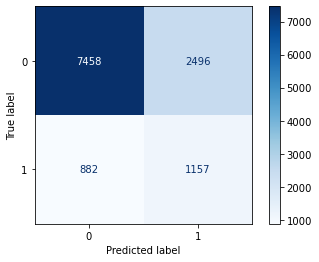

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


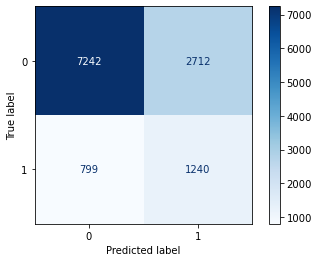

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


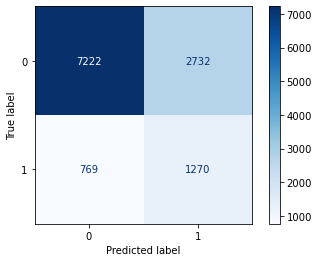

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


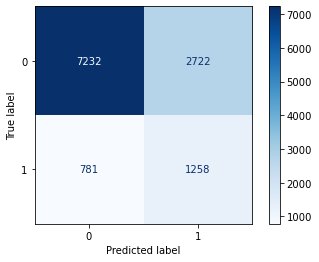

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


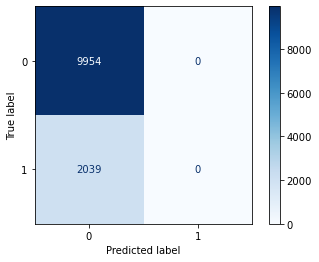

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


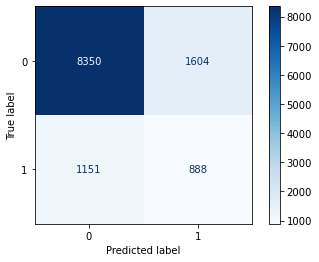

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


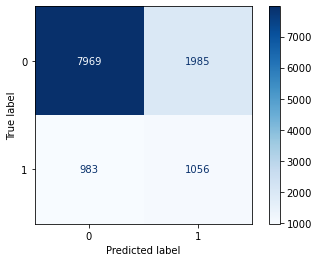

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.89      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


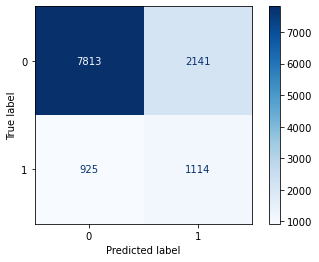

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.89      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


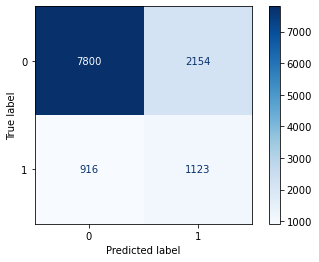

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


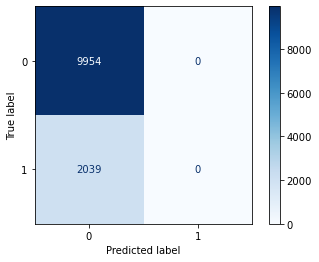

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


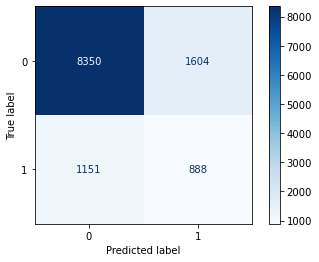

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


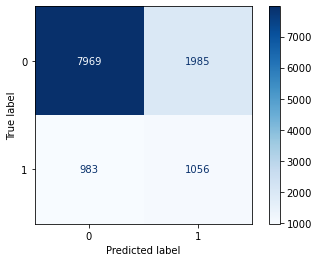

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.89      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


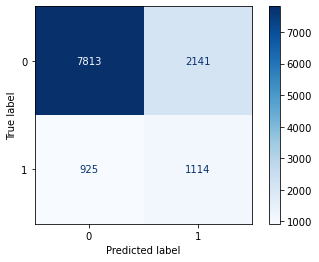

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.89      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


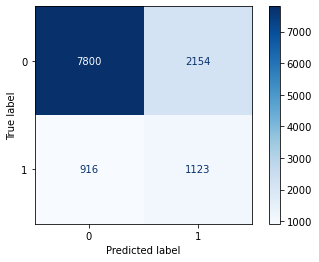

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


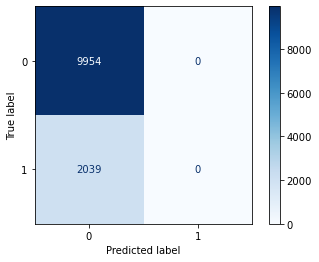

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


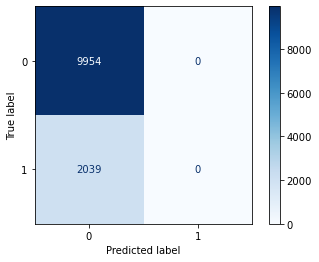

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.75      0.81      9954
           1       0.32      0.58      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.75      0.81      9954\n           1       0.32      0.58      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


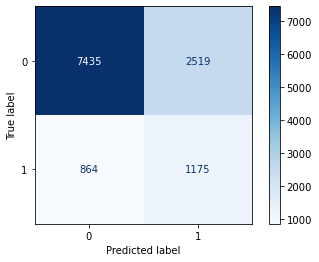

[LibLinear]              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.63      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.63      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


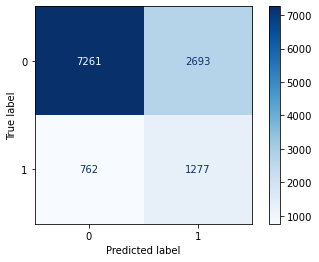

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.63      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.63      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


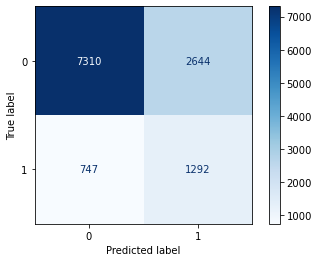

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83      9954\n           1       0.32      0.49      0.39      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.60      0.64      0.61     11993\nweighted avg       0.79      0.74      0.76     11993\n'}


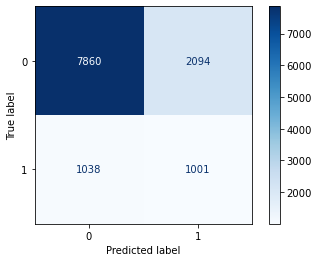

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.75      0.81      9954
           1       0.31      0.57      0.40      2039

    accuracy                           0.72     11993
   macro avg       0.60      0.66      0.61     11993
weighted avg       0.80      0.72      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.81      9954\n           1       0.31      0.57      0.40      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.60      0.66      0.61     11993\nweighted avg       0.80      0.72      0.74     11993\n'}


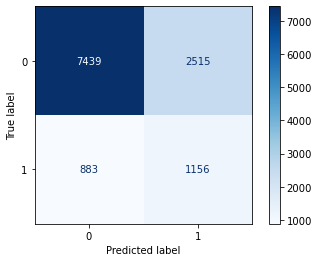

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


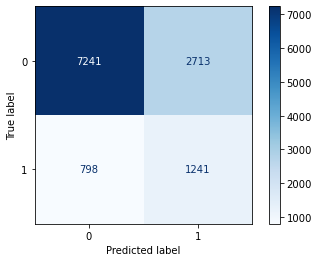

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


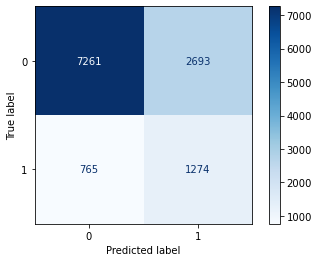

[LibLinear]              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.63      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.63      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.75     11993\n'}


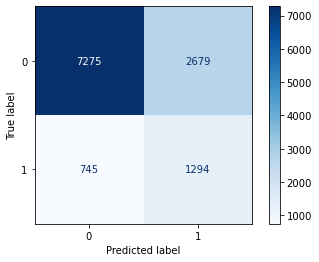

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


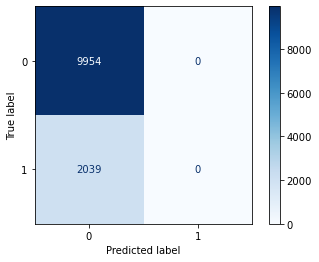

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


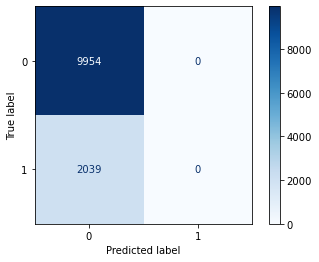

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


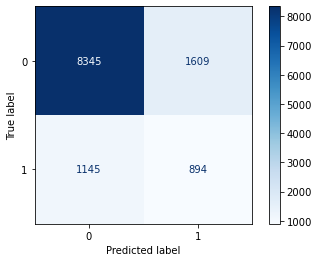

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


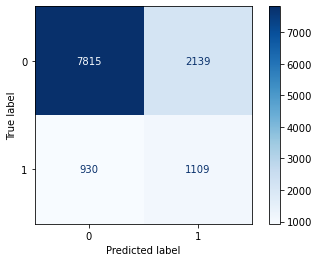

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.44      2039

    accuracy                           0.75     11993
   macro avg       0.63      0.68      0.64     11993
weighted avg       0.81      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.44      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.63      0.68      0.64     11993\nweighted avg       0.81      0.75      0.77     11993\n'}


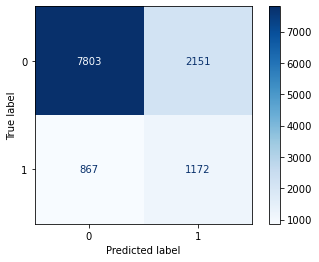

[LibLinear]              precision    recall  f1-score   support

           0       0.85      0.95      0.90      9954
           1       0.48      0.21      0.29      2039

    accuracy                           0.83     11993
   macro avg       0.67      0.58      0.60     11993
weighted avg       0.79      0.83      0.80     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      9954\n           1       0.48      0.21      0.29      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.67      0.58      0.60     11993\nweighted avg       0.79      0.83      0.80     11993\n'}


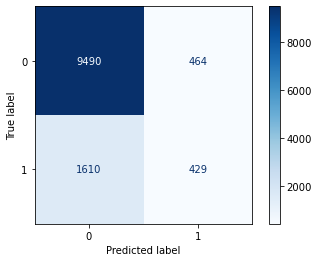

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.39      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


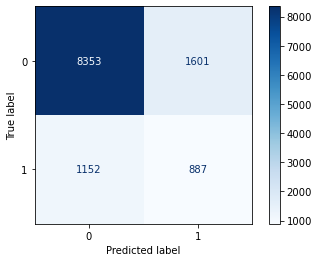

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


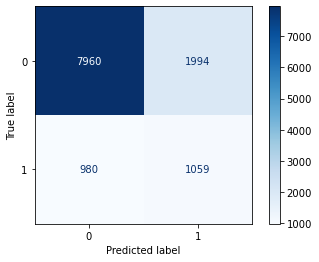

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


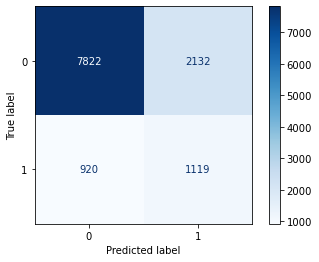

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.68      0.64     11993
weighted avg       0.81      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.68      0.64     11993\nweighted avg       0.81      0.75      0.77     11993\n'}


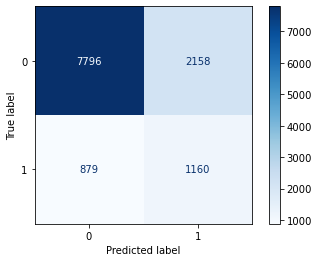

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished


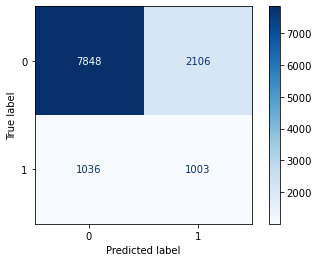

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 13 epochs took 4 seconds
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


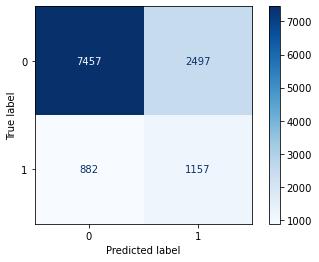

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 21 epochs took 8 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished


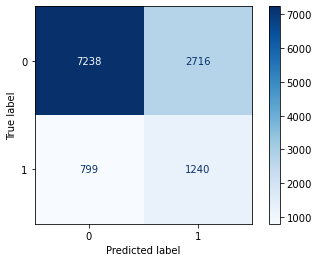

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.63      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.63      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.6s finished


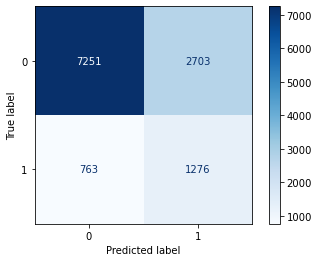

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      9954
           1       0.33      0.60      0.43      2039

    accuracy                           0.73     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.80      0.73      0.76     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.76      0.82      9954\n           1       0.33      0.60      0.43      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.80      0.73      0.76     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.7s finished


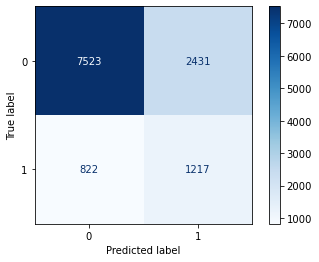

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished


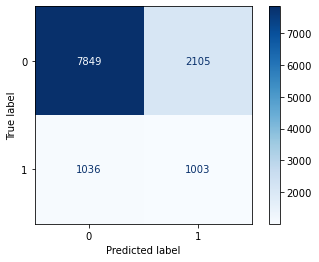

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 13 epochs took 5 seconds
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


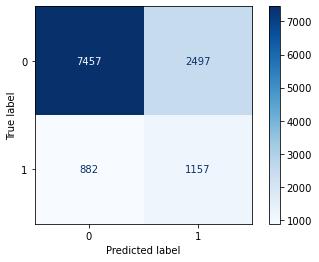

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 21 epochs took 8 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished


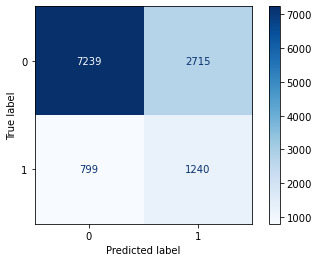

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.63      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.63      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.9s finished


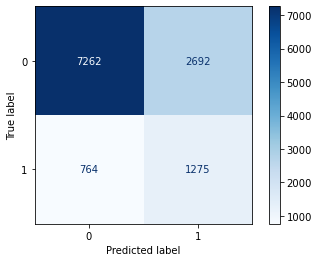

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.8s finished


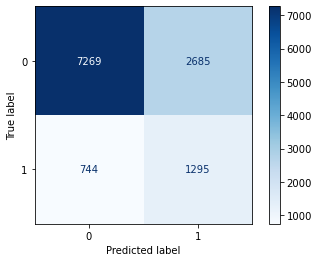

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


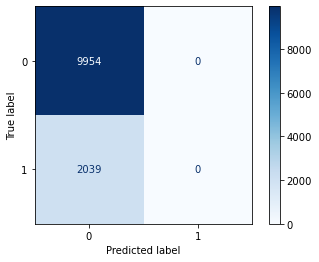

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 12 epochs took 4 seconds
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


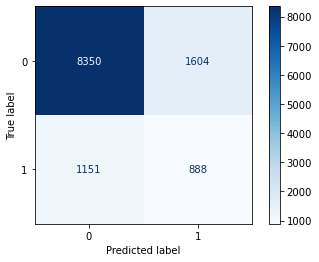

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 22 epochs took 8 seconds
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished


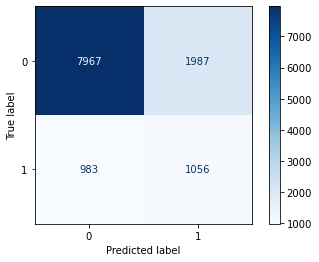

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 49 epochs took 18 seconds
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s finished


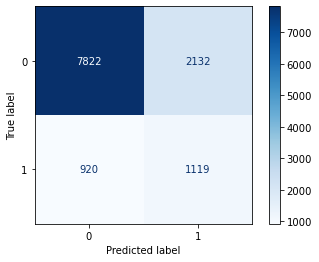

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.8s finished


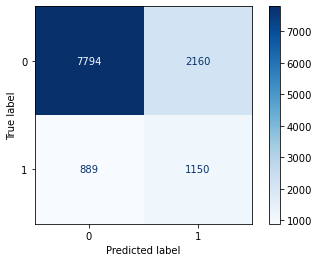

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


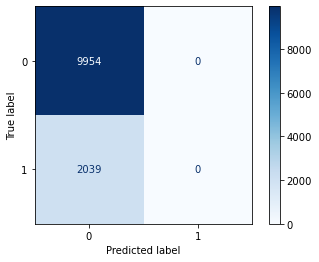

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 12 epochs took 4 seconds
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished


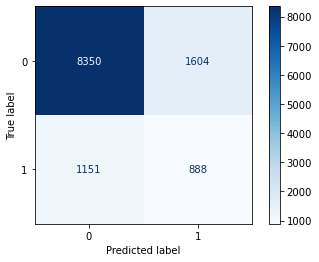

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 22 epochs took 8 seconds
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished


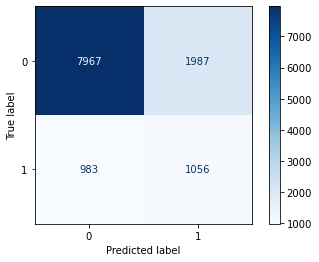

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 48 epochs took 18 seconds
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s finished


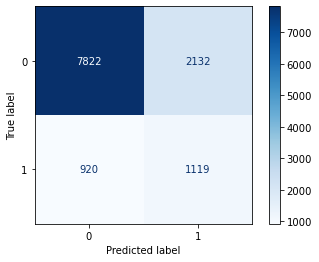

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 37 seconds
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.8s finished


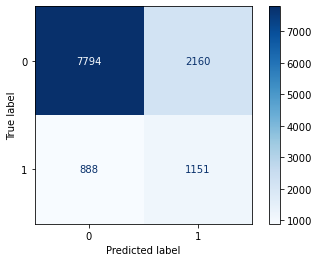

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1 epochs took 1 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9954
           1       0.17      1.00      0.29      2039

    accuracy                           0.17     11993
   macro avg       0.09      0.50      0.15     11993
weighted avg       0.03      0.17      0.05     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      9954\n           1       0.17      1.00      0.29      2039\n\n    accuracy                           0.17     11993\n   macro avg       0.09      0.50      0.15     11993\nweighted avg       0.03      0.17      0.05     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


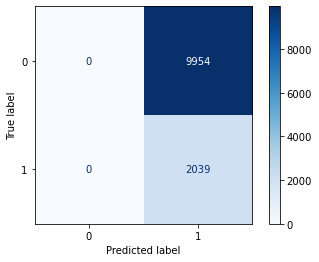

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 8 epochs took 5 seconds
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9954
           1       0.17      1.00      0.29      2039

    accuracy                           0.17     11993
   macro avg       0.09      0.50      0.15     11993
weighted avg       0.03      0.17      0.05     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      9954\n           1       0.17      1.00      0.29      2039\n\n    accuracy                           0.17     11993\n   macro avg       0.09      0.50      0.15     11993\nweighted avg       0.03      0.17      0.05     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


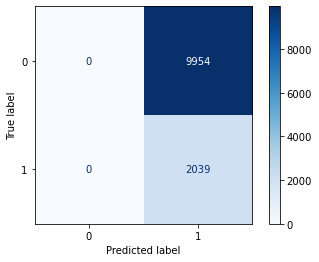

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 37 epochs took 25 seconds
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      9954
           1       0.32      0.58      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', penalty='l1', solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.75      0.82      9954\n           1       0.32      0.58      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.5s finished


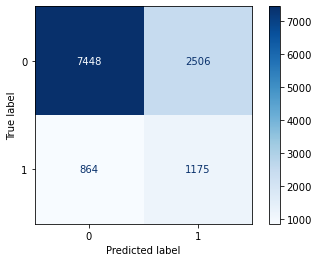

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 72 seconds
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.63      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.63      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


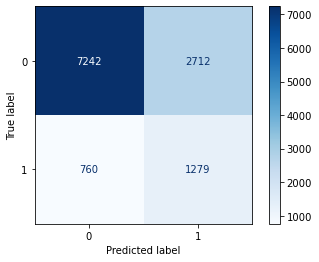

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 79 seconds
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.63      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', penalty='l1', solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.63      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


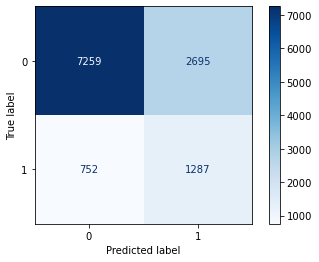

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s finished


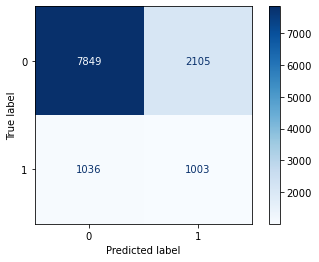

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 25 epochs took 12 seconds
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s finished


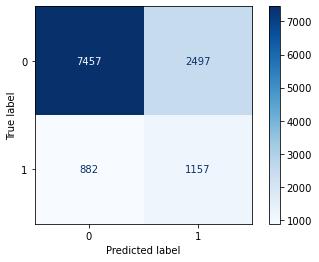

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 41 epochs took 21 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.80      9954\n           1       0.31      0.61      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s finished


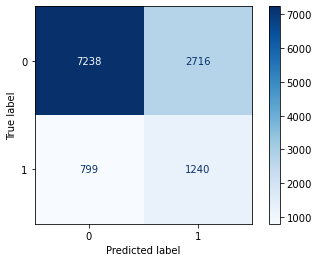

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 96 epochs took 49 seconds
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.5s finished


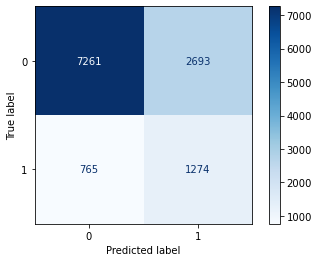

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 51 seconds
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.63      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.63      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.5s finished


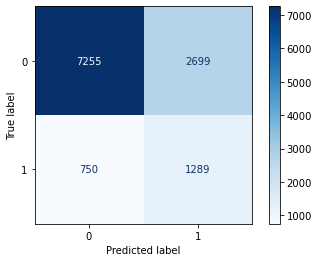

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1 epochs took 1 seconds
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


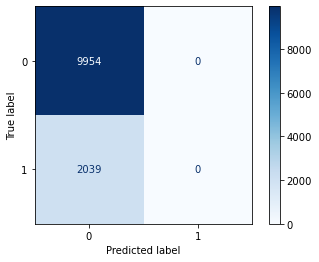

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3 epochs took 2 seconds
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


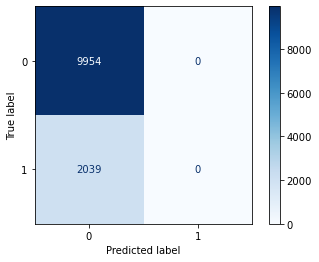

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 64 seconds
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.40      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.36      0.44      0.40      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


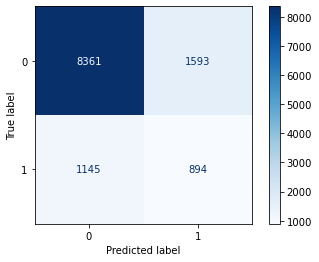

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 66 seconds
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.74      0.76     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.74      0.76     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


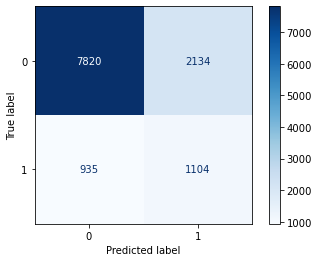

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 79 seconds
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


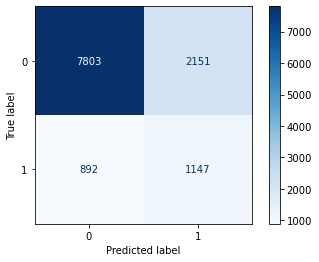

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


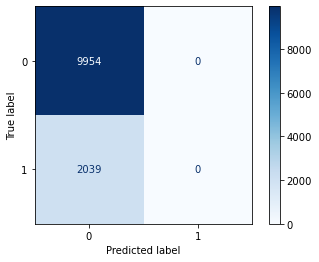

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 18 epochs took 9 seconds
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.36      0.44      0.39      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished


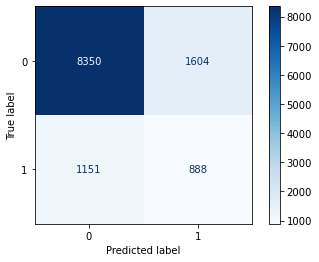

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 55 epochs took 27 seconds
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.35      0.52      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.35      0.52      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.66      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.8s finished


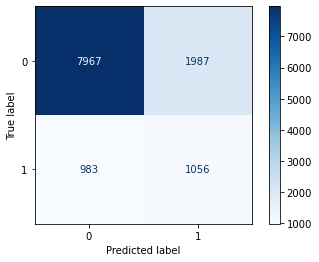

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 94 epochs took 48 seconds
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.6s finished


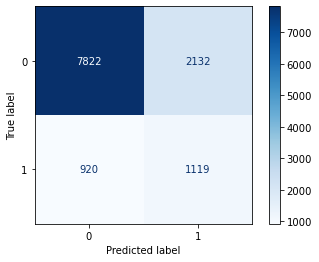

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 50 seconds
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.4s finished


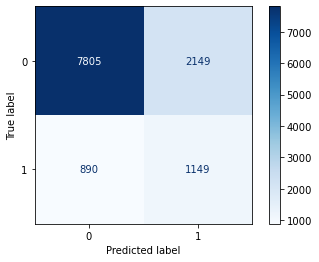

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


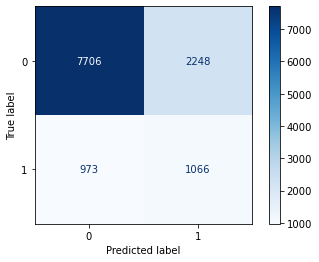

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


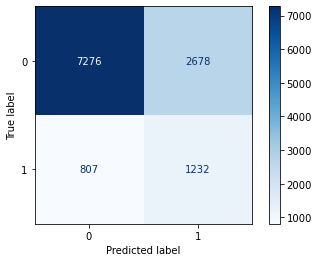

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


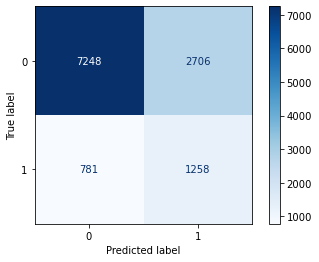

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.6min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


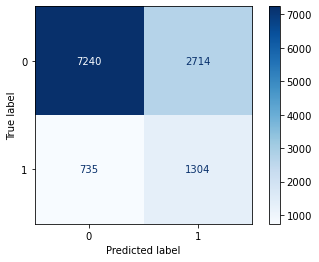

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 32.9min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


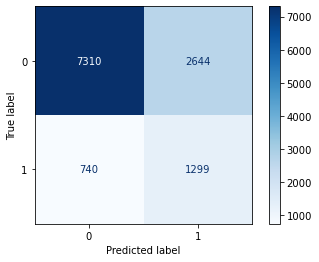

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


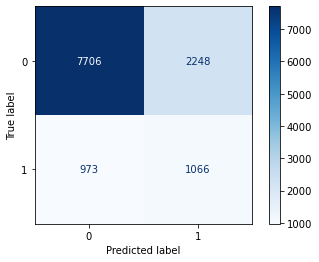

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


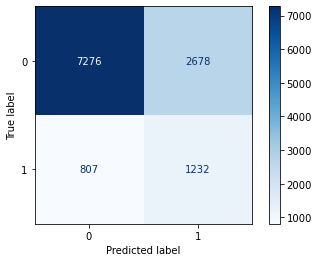

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


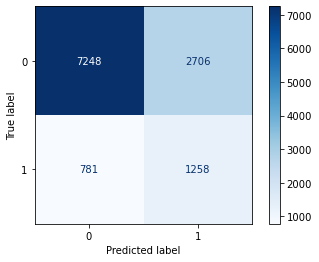

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.5min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


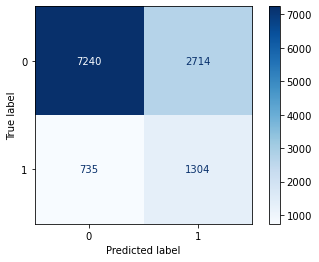

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 34.0min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'newton-cg', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


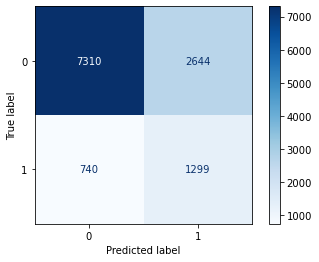

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.5s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


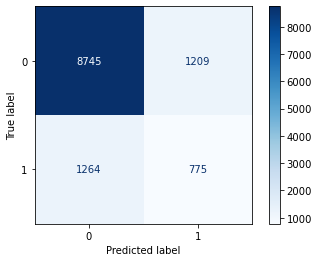

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


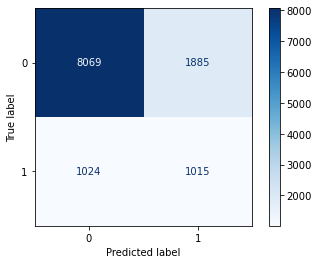

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


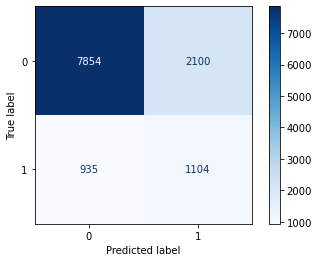

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


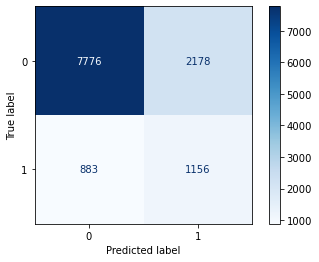

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.6min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.58      0.44      2039

    accuracy                           0.74     11993
   macro avg       0.63      0.68      0.64     11993
weighted avg       0.81      0.74      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.58      0.44      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.63      0.68      0.64     11993\nweighted avg       0.81      0.74      0.77     11993\n'}


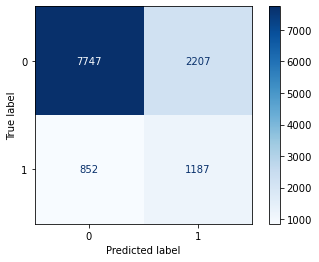

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.3s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


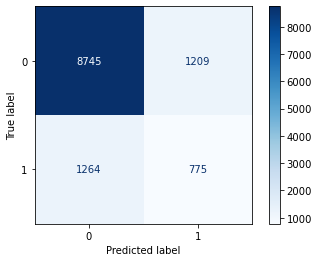

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


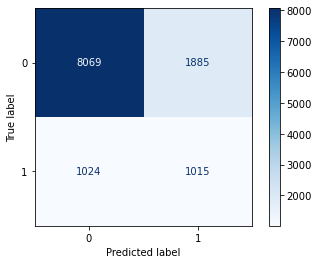

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


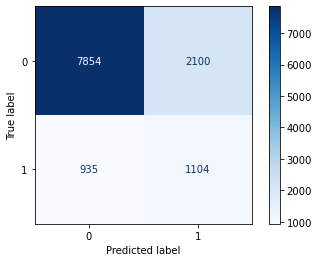

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.2min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='newton-cg', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


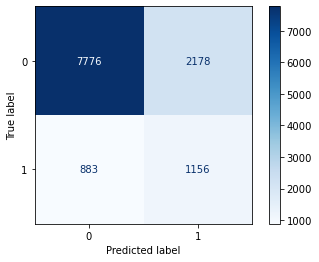

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.6min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.58      0.44      2039

    accuracy                           0.74     11993
   macro avg       0.63      0.68      0.64     11993
weighted avg       0.81      0.74      0.77     11993

{'solver': 'newton-cg', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='newton-cg',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.58      0.44      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.63      0.68      0.64     11993\nweighted avg       0.81      0.74      0.77     11993\n'}


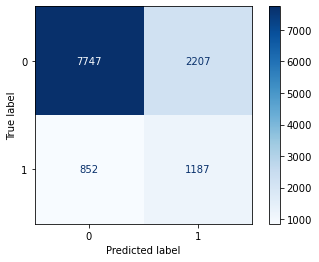

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


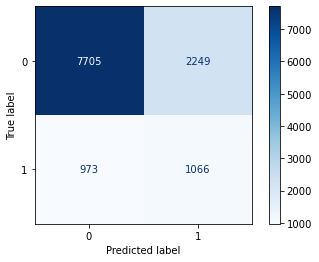

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


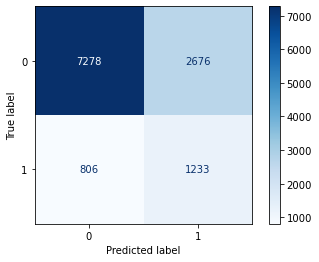

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


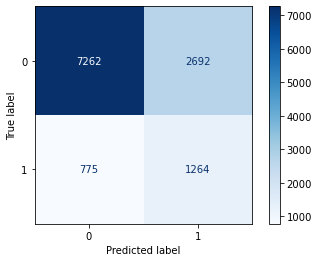

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


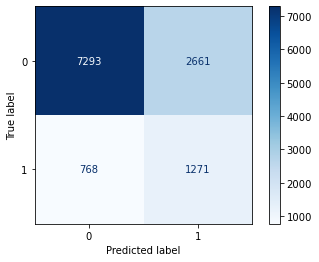

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


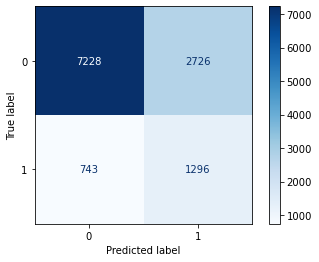

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


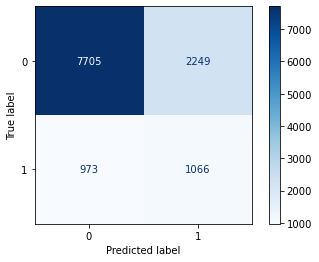

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


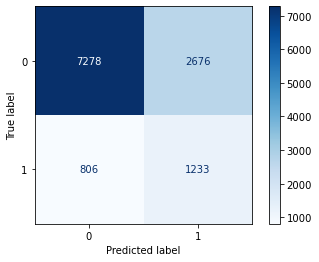

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


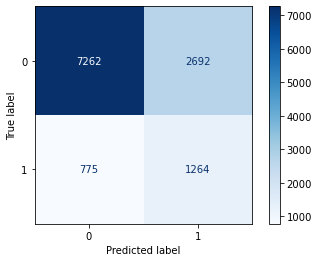

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.1s finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


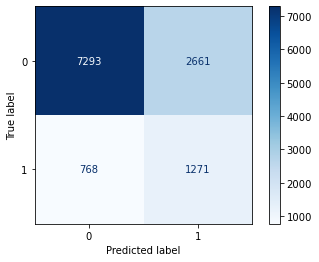

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'lbfgs', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


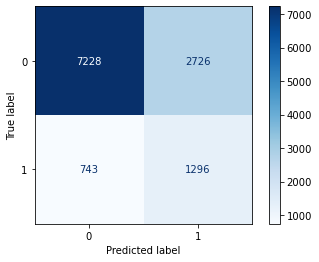

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


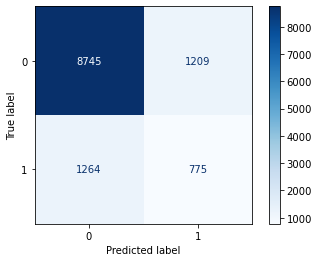

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


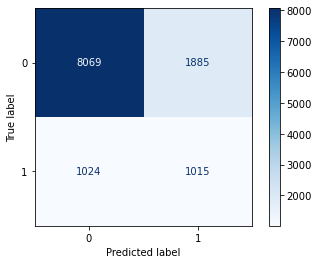

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


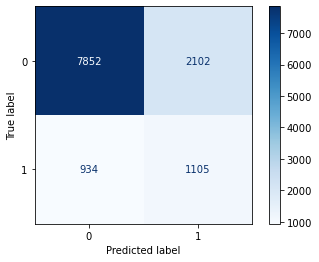

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.9s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


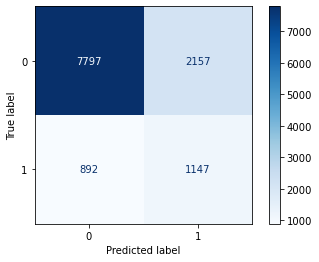

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.3s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      9954
           1       0.34      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.80      0.74      0.76     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.83      9954\n           1       0.34      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.80      0.74      0.76     11993\n'}


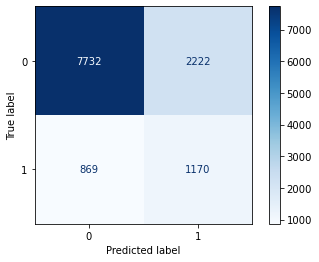

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


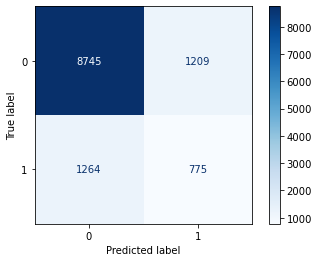

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


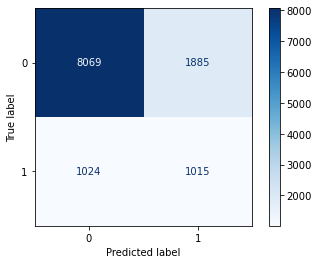

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


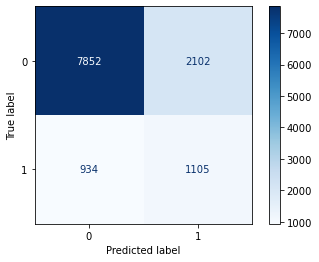

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.56      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.56      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


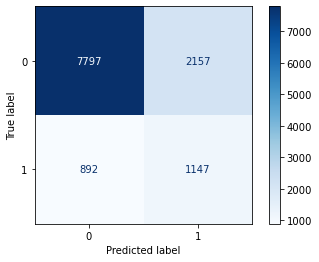

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      9954
           1       0.34      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.80      0.74      0.76     11993

{'solver': 'lbfgs', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.83      9954\n           1       0.34      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.80      0.74      0.76     11993\n'}


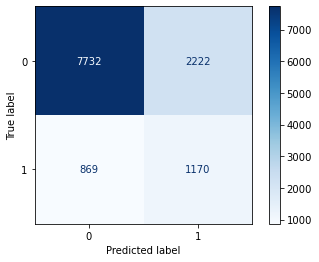

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


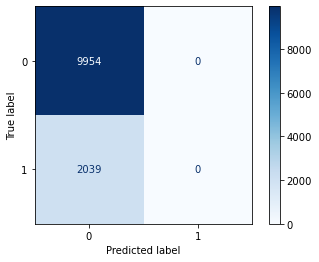

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


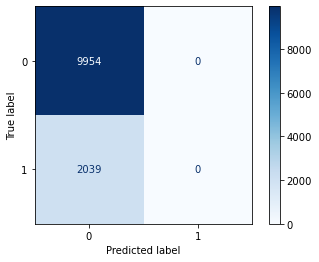

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.74      0.81      9954
           1       0.32      0.59      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.74      0.81      9954\n           1       0.32      0.59      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.66      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


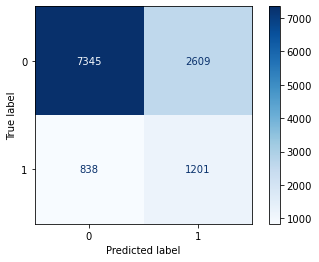

[LibLinear]              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.65      0.44      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.65      0.44      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


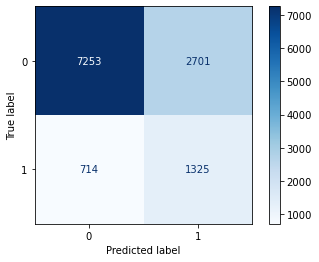

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.44      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.44      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


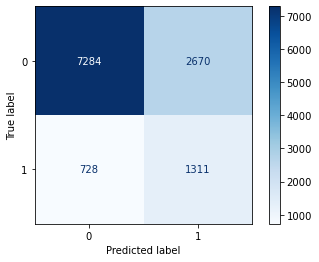

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


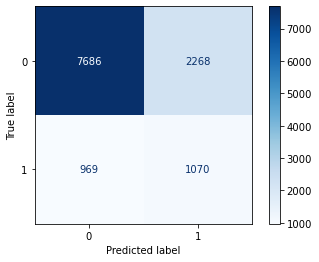

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.61      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.61      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


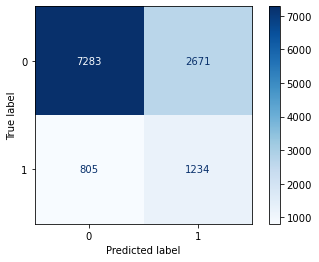

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


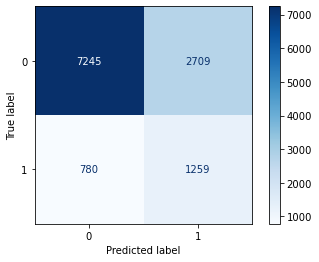

[LibLinear]              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


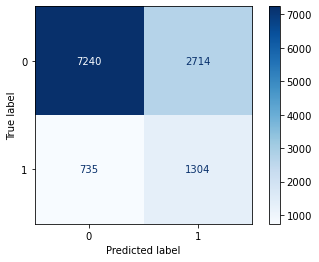

[LibLinear]              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'liblinear', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


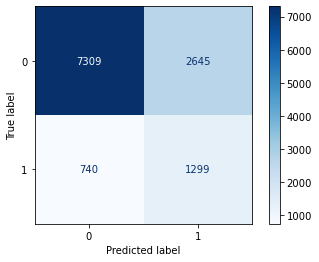

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


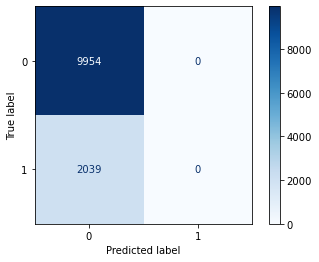

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


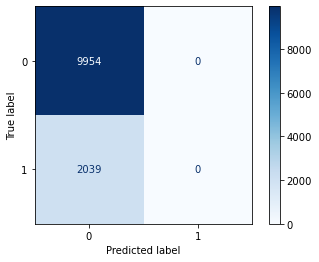

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.37      0.44      0.40      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.37      0.44      0.40      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


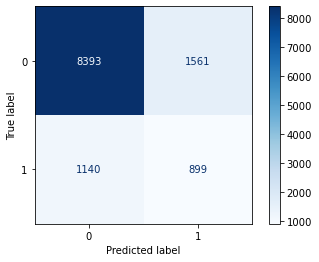

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


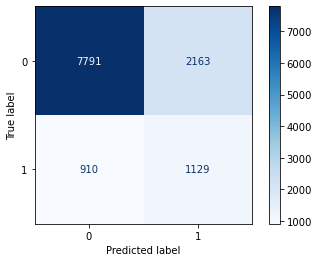

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.59      0.44      2039

    accuracy                           0.75     11993
   macro avg       0.63      0.68      0.64     11993
weighted avg       0.81      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.59      0.44      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.63      0.68      0.64     11993\nweighted avg       0.81      0.75      0.77     11993\n'}


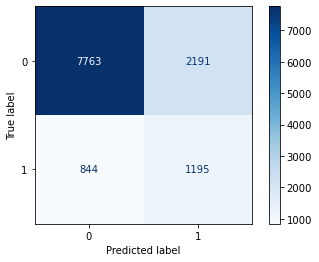

[LibLinear]              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9954
           1       0.37      0.40      0.38      2039

    accuracy                           0.78     11993
   macro avg       0.62      0.63      0.63     11993
weighted avg       0.79      0.78      0.78     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87      9954\n           1       0.37      0.40      0.38      2039\n\n    accuracy                           0.78     11993\n   macro avg       0.62      0.63      0.63     11993\nweighted avg       0.79      0.78      0.78     11993\n'}


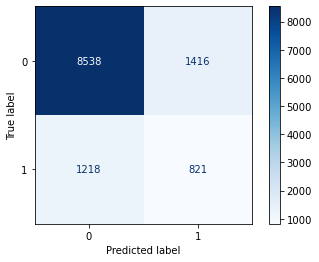

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9954
           1       0.34      0.50      0.41      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.80      0.84      9954\n           1       0.34      0.50      0.41      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


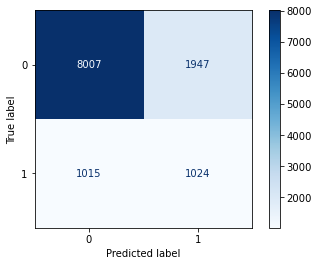

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


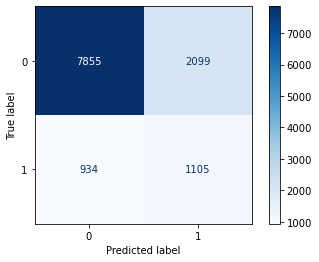

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='liblinear', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


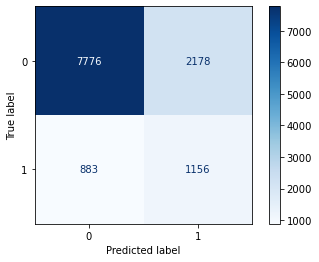

[LibLinear]              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.58      0.44      2039

    accuracy                           0.74     11993
   macro avg       0.63      0.68      0.64     11993
weighted avg       0.81      0.74      0.77     11993

{'solver': 'liblinear', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='liblinear',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.58      0.44      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.63      0.68      0.64     11993\nweighted avg       0.81      0.74      0.77     11993\n'}


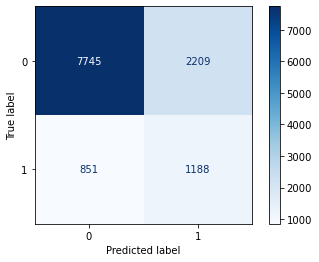

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


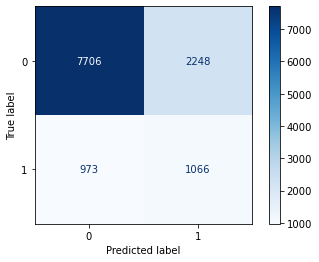

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 15 epochs took 68 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


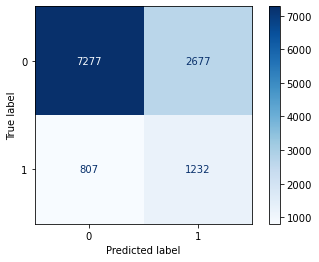

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 72 epochs took 328 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.5min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


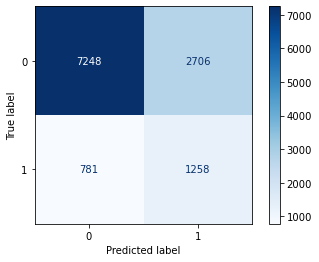

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 457 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.72      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


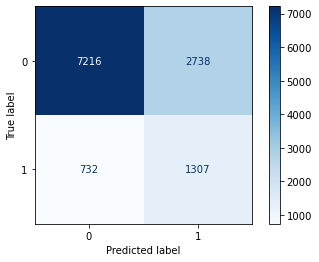

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 462 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min finished


              precision    recall  f1-score   support

           0       0.91      0.74      0.81      9954
           1       0.33      0.63      0.44      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.74      0.81      9954\n           1       0.33      0.63      0.44      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


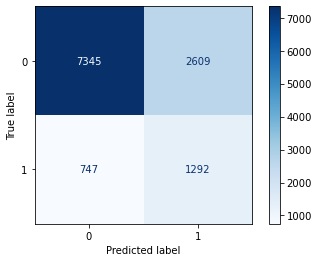

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


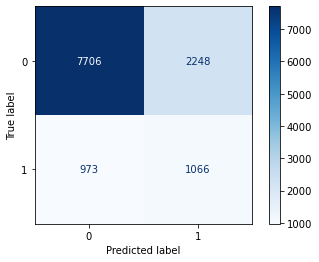

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 15 epochs took 69 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


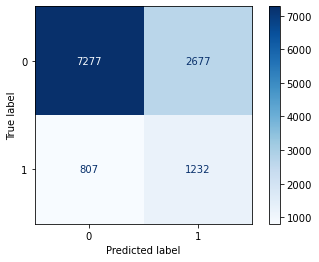

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 83 epochs took 379 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.3min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


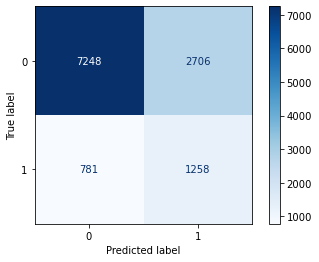

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 457 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


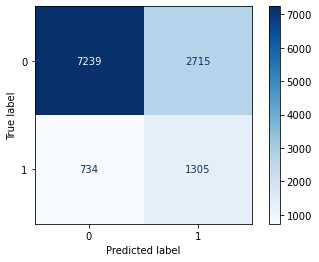

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 463 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'sag', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


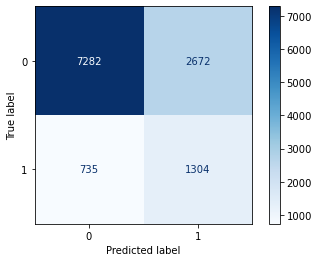

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.1s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


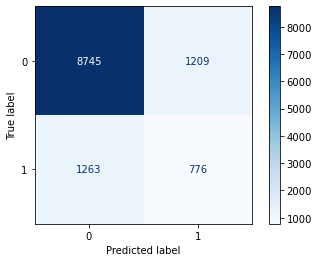

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 19 epochs took 87 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


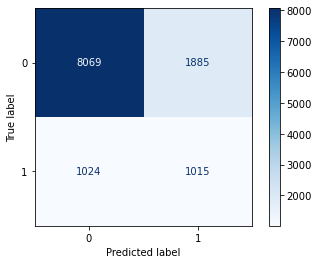

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 458 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


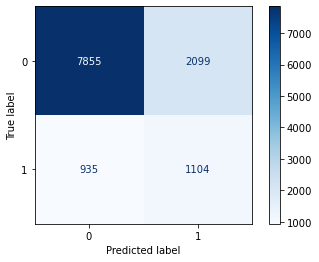

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 463 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


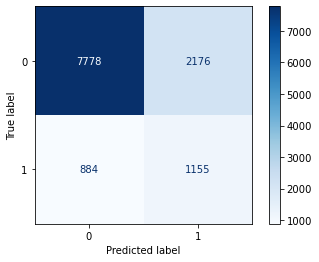

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 458 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      9954
           1       0.35      0.58      0.44      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.81      0.74      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.83      9954\n           1       0.35      0.58      0.44      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.81      0.74      0.77     11993\n'}


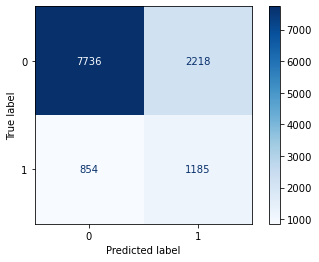

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


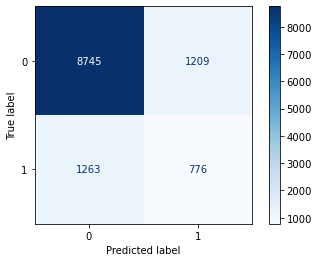

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 19 epochs took 87 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


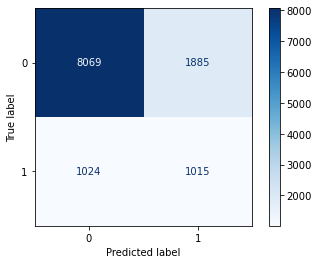

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 457 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


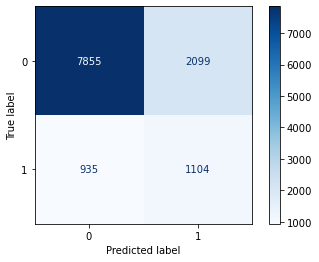

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 461 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='sag', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


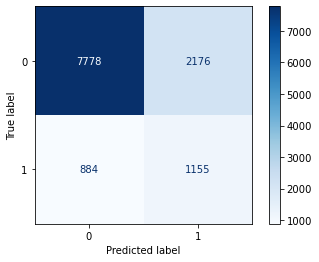

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 454 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.6min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      9954
           1       0.35      0.58      0.44      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.81      0.74      0.77     11993

{'solver': 'sag', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='sag',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.83      9954\n           1       0.35      0.58      0.44      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.81      0.74      0.77     11993\n'}


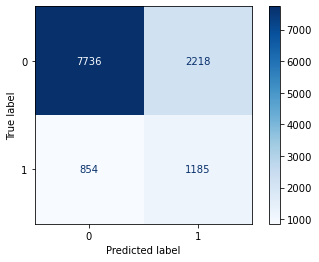

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1 epochs took 8 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9954
           1       0.17      1.00      0.29      2039

    accuracy                           0.17     11993
   macro avg       0.09      0.50      0.15     11993
weighted avg       0.03      0.17      0.05     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      9954\n           1       0.17      1.00      0.29      2039\n\n    accuracy                           0.17     11993\n   macro avg       0.09      0.50      0.15     11993\nweighted avg       0.03      0.17      0.05     11993\n'}


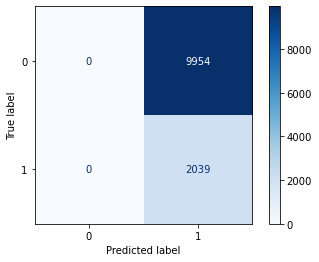

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 10 epochs took 79 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


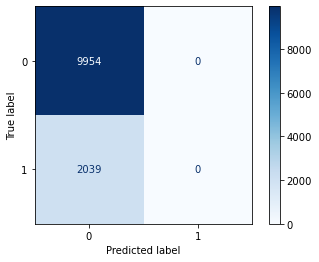

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 794 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.2min finished


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      9954
           1       0.32      0.59      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.72      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', penalty='l1', solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.74      0.81      9954\n           1       0.32      0.59      0.41      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.72      0.75     11993\n'}


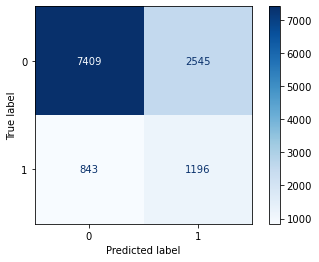

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 935 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.6min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced', penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


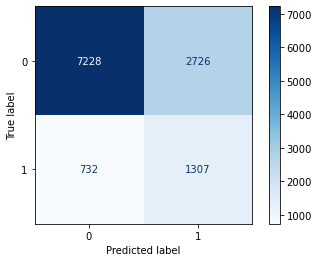

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1229 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.5min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.64      0.43      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', penalty='l1', solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.64      0.43      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


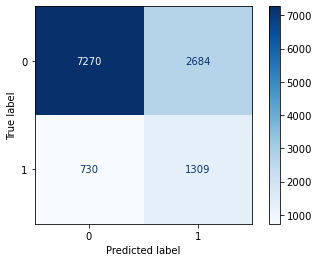

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      9954
           1       0.32      0.52      0.40      2039

    accuracy                           0.73     11993
   macro avg       0.60      0.65      0.61     11993
weighted avg       0.79      0.73      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight='balanced', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83      9954\n           1       0.32      0.52      0.40      2039\n\n    accuracy                           0.73     11993\n   macro avg       0.60      0.65      0.61     11993\nweighted avg       0.79      0.73      0.75     11993\n'}


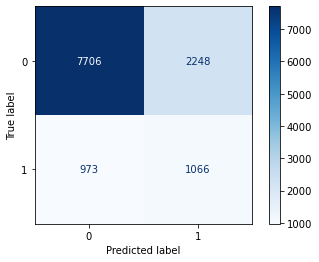

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 38 epochs took 241 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.60      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight='balanced',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.60      0.41      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


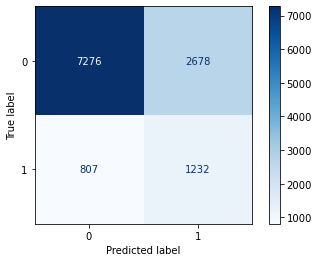

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 77 epochs took 487 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min finished


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9954
           1       0.32      0.62      0.42      2039

    accuracy                           0.71     11993
   macro avg       0.61      0.67      0.61     11993
weighted avg       0.80      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight='balanced', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      9954\n           1       0.32      0.62      0.42      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.61      0.67      0.61     11993\nweighted avg       0.80      0.71      0.74     11993\n'}


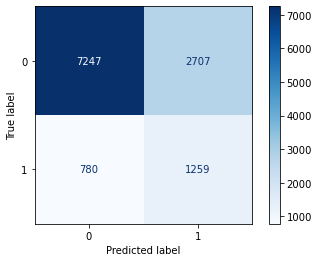

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 629 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.5min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.32      0.64      0.43      2039

    accuracy                           0.71     11993
   macro avg       0.62      0.68      0.62     11993
weighted avg       0.81      0.71      0.74     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight='balanced',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.32      0.64      0.43      2039\n\n    accuracy                           0.71     11993\n   macro avg       0.62      0.68      0.62     11993\nweighted avg       0.81      0.71      0.74     11993\n'}


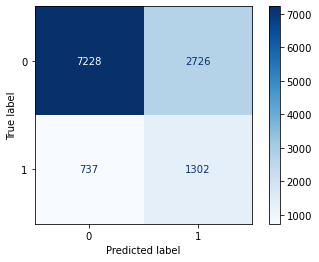

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 633 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.5min finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9954
           1       0.33      0.65      0.44      2039

    accuracy                           0.72     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.72      0.75     11993

{'solver': 'saga', 'class_weight': 'balanced', 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight='balanced', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9954\n           1       0.33      0.65      0.44      2039\n\n    accuracy                           0.72     11993\n   macro avg       0.62      0.69      0.62     11993\nweighted avg       0.81      0.72      0.75     11993\n'}


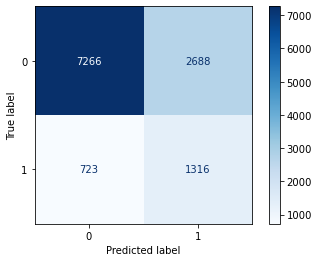

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1 epochs took 7 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


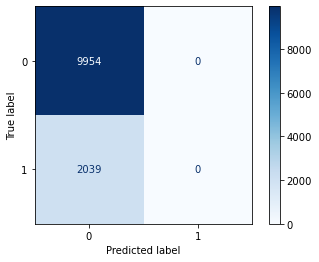

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4 epochs took 31 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      9954
           1       0.00      0.00      0.00      2039

    accuracy                           0.83     11993
   macro avg       0.41      0.50      0.45     11993
weighted avg       0.69      0.83      0.75     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      9954\n           1       0.00      0.00      0.00      2039\n\n    accuracy                           0.83     11993\n   macro avg       0.41      0.50      0.45     11993\nweighted avg       0.69      0.83      0.75     11993\n'}


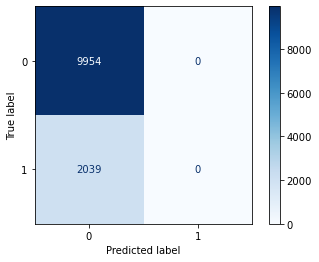

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 785 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.1min finished


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9954
           1       0.37      0.44      0.40      2039

    accuracy                           0.77     11993
   macro avg       0.62      0.64      0.63     11993
weighted avg       0.79      0.77      0.78     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86      9954\n           1       0.37      0.44      0.40      2039\n\n    accuracy                           0.77     11993\n   macro avg       0.62      0.64      0.63     11993\nweighted avg       0.79      0.77      0.78     11993\n'}


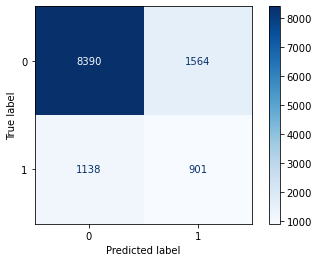

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 839 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.0min finished


              precision    recall  f1-score   support

           0       0.89      0.78      0.84      9954
           1       0.34      0.55      0.42      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   penalty='l1', solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.84      9954\n           1       0.34      0.55      0.42      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


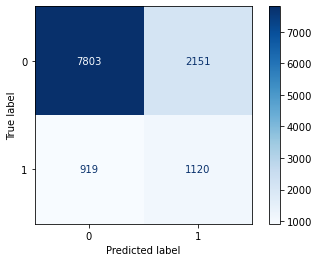

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1244 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.7min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.83      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.80      0.74      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l1', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, penalty='l1',
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.83      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.80      0.74      0.77     11993\n'}


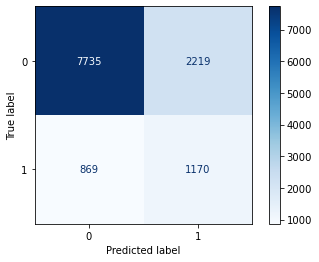

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min finished


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9954
           1       0.39      0.38      0.39      2039

    accuracy                           0.79     11993
   macro avg       0.63      0.63      0.63     11993
weighted avg       0.79      0.79      0.79     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 1e-05, 'model': LogisticRegression(C=1e-05, class_weight={0: 0.19, 1: 0.81}, solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.88      9954\n           1       0.39      0.38      0.39      2039\n\n    accuracy                           0.79     11993\n   macro avg       0.63      0.63      0.63     11993\nweighted avg       0.79      0.79      0.79     11993\n'}


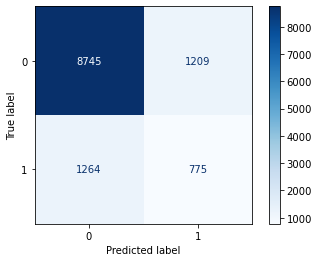

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 49 epochs took 310 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9954
           1       0.35      0.50      0.41      2039

    accuracy                           0.76     11993
   macro avg       0.62      0.65      0.63     11993
weighted avg       0.80      0.76      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.00031622776601683794, 'model': LogisticRegression(C=0.00031622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85      9954\n           1       0.35      0.50      0.41      2039\n\n    accuracy                           0.76     11993\n   macro avg       0.62      0.65      0.63     11993\nweighted avg       0.80      0.76      0.77     11993\n'}


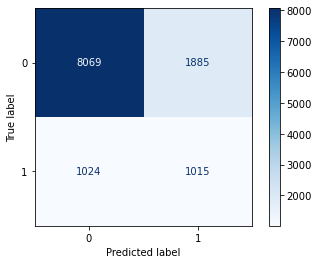

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 637 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.6min finished


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9954
           1       0.34      0.54      0.42      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.01, 'model': LogisticRegression(C=0.01, class_weight={0: 0.19, 1: 0.81}, solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.79      0.84      9954\n           1       0.34      0.54      0.42      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


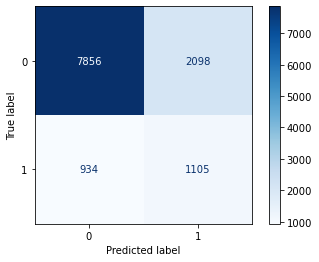

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 627 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.5min finished


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      9954
           1       0.35      0.57      0.43      2039

    accuracy                           0.75     11993
   macro avg       0.62      0.67      0.63     11993
weighted avg       0.80      0.75      0.77     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 0.31622776601683794, 'model': LogisticRegression(C=0.31622776601683794, class_weight={0: 0.19, 1: 0.81},
                   solver='saga', verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.78      0.84      9954\n           1       0.35      0.57      0.43      2039\n\n    accuracy                           0.75     11993\n   macro avg       0.62      0.67      0.63     11993\nweighted avg       0.80      0.75      0.77     11993\n'}


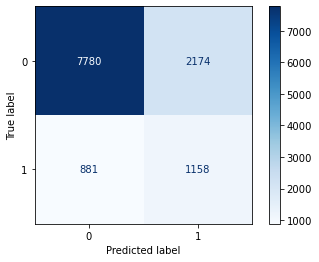

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 631 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.5min finished


              precision    recall  f1-score   support

           0       0.90      0.77      0.83      9954
           1       0.34      0.58      0.43      2039

    accuracy                           0.74     11993
   macro avg       0.62      0.68      0.63     11993
weighted avg       0.80      0.74      0.76     11993

{'solver': 'saga', 'class_weight': {1: 0.81, 0: 0.19}, 'regularization_type': 'l2', 'lambd_para': 10.0, 'model': LogisticRegression(C=10.0, class_weight={0: 0.19, 1: 0.81}, solver='saga',
                   verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.77      0.83      9954\n           1       0.34      0.58      0.43      2039\n\n    accuracy                           0.74     11993\n   macro avg       0.62      0.68      0.63     11993\nweighted avg       0.80      0.74      0.76     11993\n'}


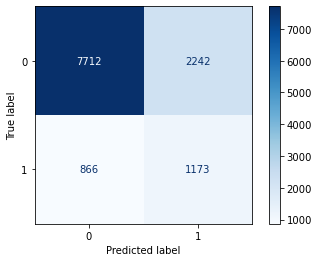

In [63]:
# Looping over each unique combination of unique values of hyperparameters
for polynomial_feature in polynomial_features:
    for solver in solvers:
        for class_weight in class_weights:
            for regularization_type in regularization_types:
                for lambda_para in lambda_paras:
                    
                    # These solvers dont support L1 regularization
                    if(solver == 'newton-cg'):
                        regularization_type = 'l2'

                    if(solver == 'lbfgs'):
                        regularization_type = 'l2'

                    if(solver == 'sag'):
                        regularization_type = 'l2'


                    train_X = hospital_df_train.drop(['LengthOfStay',], axis=1).to_numpy()
                    train_y = hospital_df_train[['LengthOfStay']].to_numpy()

                    test_X = hospital_df_test.drop(['LengthOfStay',], axis=1).to_numpy()
                    test_y = hospital_df_test[['LengthOfStay']].to_numpy()

                    
                    poly = PolynomialFeatures(polynomial_feature)
                    poly.fit(train_X)
                    train_X = poly.transform(train_X)
                    test_X = poly.transform(test_X)

                    
                    scaler = MinMaxScaler()
                    scaler.fit(train_X)
                    train_X = scaler.transform(train_X)
                    test_X = scaler.transform(test_X)


                    clf = LogisticRegression(penalty=regularization_type,verbose=1, C = lambda_para, class_weight=class_weight, solver= solver, max_iter=100).fit(train_X, train_y.ravel())

                    test_pred = clf.predict(test_X)

                    print(classification_report(test_y, test_pred,))

                    temp_dict = {}
                    temp_dict['solver'] = solver
                    temp_dict['class_weight'] = class_weight
                    temp_dict['regularization_type'] = regularization_type
                    temp_dict['lambd_para'] = lambda_para
                    #temp_dict['polynomial_feature'] = polynomial_feature
                    temp_dict['model'] = clf
                    temp_dict['classification_report'] = classification_report(test_y, test_pred,)
                    all_models.append(temp_dict)
                    
                    
                    print(temp_dict)
                    disp = plot_confusion_matrix(clf, test_X, test_y,
                                                     cmap=plt.cm.Blues)
                    plt.show()

In [75]:
for model in all_models:
    print("Solver -  " + str(model['solver']))
    print("Class weight - " +str(model['class_weight']))
    print("Regularization type - " +str(model['regularization_type']))
    print("Lambda_paramodel['lambd_para']))
    print(model['classification_report'])

newton-cg
balanced
l2
1e-05
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      9954
           1       0.32      0.49      0.39      2039

    accuracy                           0.74     11993
   macro avg       0.60      0.64      0.61     11993
weighted avg       0.79      0.74      0.76     11993

newton-cg
balanced
l2
0.00031622776601683794
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      9954
           1       0.32      0.57      0.41      2039

    accuracy                           0.72     11993
   macro avg       0.61      0.66      0.61     11993
weighted avg       0.80      0.72      0.75     11993

newton-cg
balanced
l2
0.01
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      9954
           1       0.31      0.61      0.41      2039

    accuracy                           0.71     11993
   macro avg       0.61     

We now pick the model that delivers the best performance in terms for the f1-scores (particularly for class 1 since it has a relatively low amount of data)

In [79]:
# This function was taken from here - https://stackoverflow.com/questions/42562146/classification-report-with-nested-cross-validation-in-sklearn-average-individua

def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred)

We concatenate the train and test sets for this since we're gonna use cross validation now so we can use the entire dataset

In [41]:
hospital_df_all = pd.concat([hospital_df_train, hospital_df_test])
hospital_df_all

BirthWeight  AverageCostInCounty  AverageChargesInCounty  \
59711     3.726685                 1826                    4190   
19311     3.794793                 3155                   11381   
10424     3.806594                 2158                    4620   
5255      3.762326                 2318                    1857   
25116     3.790610                 2018                    3610   
...            ...                  ...                     ...   
30024     3.777209                 3155                   11381   
27702     3.781827                 2834                    8172   
25041     3.772427                 2508                    2140   
25039     3.733285                 2653                    2630   
47329     3.762326                 2041                    9917   

       AverageCostInFacility  AverageChargesInFacility  \
59711               5.967110                284.502474   
19311               6.332514                489.256344   
10424               6.279091                273.289297   
5255                6.166956                169.812260   
25116               6.080429                257.234448   
...                      ...                       ...   
30024               5.663747                523.912215   
27702               6.291132                427.929272   
25041               6.215812                185.568654   
25039               5.857240                166.009339   
47329               5.935852                545.778070   

       AverageIncomeInZipCode  LengthOfStay  Gender_F  Gender_M  \
59711                      55             1       1.0       0.0   
19311                      45             0       0.0       1.0   
10424                      56             0       0.0       1.0   
5255                       45             0       0.0       1.0   
25116                      58             0       0.0       1.0   
...                       ...           ...       ...       ...   
30024                      74             0       0.0       1.0   
27702                      48             0       1.0       0.0   
25041                      53             0       0.0       1.0   
25039                      41             0       1.0       0.0   
47329                      59             0       1.0       0.0   

       TypeOfAdmission_Elective  TypeOfAdmission_Emergency  \
59711                       0.0                        0.0   
19311                       0.0                        0.0   
10424                       0.0                        0.0   
5255                        0.0                        0.0   
25116                       0.0                        0.0   
...                         ...                        ...   
30024                       0.0                        0.0   
27702                       0.0                        0.0   
25041                       0.0                        0.0   
25039                       0.0                        0.0   
47329                       0.0                        0.0   

       TypeOfAdmission_Newborn  TypeOfAdmission_Urgent  \
59711                      1.0                     0.0   
19311                      1.0                     0.0   
10424                      1.0                     0.0   
5255                       1.0                     0.0   
25116                      1.0                     0.0   
...                        ...                     ...   
30024                      1.0                     0.0   
27702                      1.0                     0.0   
25041                      1.0                     0.0   
25039                      1.0                     0.0   
47329                      1.0                     0.0   

       PaymentTypology_Blue Cross/Blue Shield  \
59711                                     0.0   
19311                                     0.0   
10424                                     0.0   
5255                                      0.0   
25116        

Degree 2 is suitable for this model as per the results

In [42]:
train_X = hospital_df_all.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = hospital_df_all[['LengthOfStay']].to_numpy()


poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X = poly.transform(train_X)


scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)



This is the model with the best features as per our hyperparameter tuning (and leasst time consuming to train)

In [56]:
clf = LogisticRegression(penalty='l1',verbose=5, C = lambda_paras[3], class_weight=class_weights[1], n_jobs = -1, solver='liblinear', max_iter=100).fit(train_X, train_y.ravel())



[LibLinear]

In [58]:
scores2 = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=make_scorer(classification_report_with_accuracy_score), return_estimator=True,
                            return_train_score=True, cv=5)

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9979
           1       0.33      0.53      0.41      2014

    accuracy                           0.74     11993
   macro avg       0.61      0.66      0.62     11993
weighted avg       0.80      0.74      0.76     11993

              precision    recall  f1-score   support

           0       0.90      0.79      0.84     39916
           1       0.34      0.54      0.42      8055

    accuracy                           0.75     47971
   macro avg       0.62      0.67      0.63     47971
weighted avg       0.80      0.75      0.77     47971

[LibLinear]              precision    recall  f1-score   support

           0       0.89      0.79      0.84      9979
           1       0.34      0.53      0.41      2014

    accuracy                           0.75     11993
   macro avg       0.62      0.66      0.63     11993
weighted avg       0.80      0.75      0.77     1199

In [ ]:
plt.figure(figsize=(20,20))
plt.barh(hospital_df_train.drop(['LengthOfStay',], axis=1).columns, clf.coef_[0])
plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- While it is significantly better than the baseline model, and is highly optimized, the results are less than spectacular for the f1-score for class 1 with the LogisticRegression model - we can't have such a high amount of error for class 1 because with this precision and recall it's as good as guessing class 1
- Let's try decision trees instead

# Decision Tree
### Strategy
- First we create a basic decision tree and check how it's faring on the dataset
- Then we will use a Random Forest to improve the results

In [59]:
hospital_df = pd.read_csv('train_data.csv')
hospital_df = hospital_df.drop('ID', axis=1)
hospital_df = hospital_df.drop('HealthServiceArea', axis=1)

# We now convert the target variable to two separate classes
hospital_df.loc[hospital_df['LengthOfStay'] < 4, 'LengthOfStay'] = 0
hospital_df.loc[hospital_df['LengthOfStay'] >= 4, 'LengthOfStay'] = 1

In [60]:
for col in hospital_df.columns:
    if hospital_df[col].dtype == object:
        hospital_df[col] = hospital_df[col].astype('category')

In [61]:
hospital_df_y = hospital_df['LengthOfStay']
hospital_df_X = hospital_df.drop(columns='LengthOfStay')

In [62]:
dataXExpand = pd.get_dummies(hospital_df_X)
dataXExpand.head()

CCSProcedureCode  APRSeverityOfIllnessCode  BirthWeight  \
0               228                         1         3700   
1               228                         1         2900   
2               220                         1         3200   
3                 0                         1         3300   
4               228                         1         2600   

   AverageCostInCounty  AverageChargesInCounty  AverageCostInFacility  \
0                 2611                    9227                   1751   
1                 3242                    8966                   3338   
2                 3155                   11381                   4980   
3                 3155                   11381                   5826   
4                 2611                    9227                   6000   

   AverageChargesInFacility  AverageIncomeInZipCode  Gender_F  Gender_M  \
0                      8951                      45         1         0   
1                      6409                      34         0         1   
2                      9323                      45         0         1   
3                     15680                      59         1         0   
4                     14344                      59         1         0   

   Gender_U  Race_Black/African American  Race_Multi-racial  Race_Other Race  \
0         0                            0                  0                1   
1         0                            1                  0                0   
2         0                            0                  0                1   
3         0                            0                  0                1   
4         0                            0                  0                1   

   Race_White  TypeOfAdmission_Elective  TypeOfAdmission_Emergency  \
0           0                         0                          0   
1           0                         0                          0   
2           0                         0                          0   
3           0                         0                          0   
4           0                         0                          0   

   TypeOfAdmission_Newborn  TypeOfAdmission_Urgent  \
0                        1                       0   
1                        1                       0   
2                        1                       0   
3                        1                       0   
4                        1                       0   

   PaymentTypology_Blue Cross/Blue Shield  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   PaymentTypology_Federal/State/Local/VA  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   PaymentTypology_Managed Care, Unspecified  PaymentTypology_Medicaid  \
0                                          0                         1   
1                                          0                         1   
2                                          0                         0   
3                                          0                         0   
4                                          0                         1   

   PaymentTypology_Medicare  PaymentTypology_Miscellaneous/Other  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   PaymentTypology_Private Health Insurance  PaymentTypology_Self-Pay  \
0                                         0 

In [63]:
le = preprocessing.LabelEncoder()
le.fit(hospital_df_y)

dataY = le.transform(hospital_df_y)


0        0
1        0
2        0
3        0
4        0
        ..
59961    1
59962    1
59963    1
59964    1
59965    1
Name: LengthOfStay, Length: 59966, dtype: int64


In [69]:
with pd.option_context('mode.chained_assignment', None):
    train_data_X, test_data_X, train_data_y , test_data_y = train_test_split(dataXExpand, dataY, test_size=0.2, 
                                              shuffle=True,random_state=0)

In [71]:
train_X = train_data_X.to_numpy()
train_y = train_data_y

test_X = test_data_X.to_numpy()
test_y = test_data_y



In [73]:
def get_acc_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = f1_score(train_y, train_pred, average='macro')
    val_acc = f1_score(val_y, val_pred, average='macro')
    
    return train_acc, val_acc

In [74]:
from sklearn import tree

tree_max_depth = 2   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_X, train_y)

In [76]:
train_acc, val_acc = get_acc_scores(clf,train_X, train_y, test_X, test_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

Train f1 score: 0.523
Validation f1 score: 0.527


<span style="font-size:1em;">✔</span> **Observations:** 
- The accuracy, while not overfitting, is akin to a random toin coss. 

## Random Forest
### Strategy
- As with the Logistic regression model, we will tune the hyperparameters with nested for loops to obtain the best model

In [78]:
all_models = []
max_depths = [8,10,12]
min_samples_splits = [5,8,10]
criterions = ['gini', 'entropy']
max_features= ['auto', 'sqrt', 'log2']
train_accuracies = []
test_accuracies = []
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for criterion in criterions:
            for max_feature in max_features:
                for class_weight in class_weights:
                    clf = RandomForestClassifier(max_features = max_feature, max_depth=max_depth, verbose=1, n_jobs = -1, n_estimators=500,min_samples_split=min_samples_split, class_weight=class_weight,criterion=criterion, random_state=0)
                    clf.fit(train_X, train_y)
                    train_acc, test_acc = get_acc_scores(clf, train_X, train_y, test_X, test_y)
                    print("Class weight: "+str(class_weight))
                    print("Maxd depth: "+str(max_depth))
                    print("Min samples split: " + str(min_samples_split))
                    print("Criterion: "+str(criterion))
                    print("Max feature: "+str(max_feature))
                    print("Train Accuracy score: {:.3f}".format(train_acc))
                    print("Test Accuracy score: {:.3f}".format(test_acc))
                    
                    test_pred = clf.predict(test_X)
                    print(classification_report(test_y, test_pred,))
                    temp_dict = {}
                    temp_dict['max_depth'] = max_depth
                    temp_dict['min_samples_split'] = min_samples_split
                    temp_dict['criterion'] = criterion
                    temp_dict['max_feature'] = max_feature
                    temp_dict['class_weight'] = class_weight
                    temp_dict['train_acc'] = train_acc
                    temp_dict['test_acc'] = test_acc
                    temp_dict['model'] = clf
                    temp_dict['classification_report'] = classification_report(test_y, test_pred,)
                    all_models.append(temp_dict)
                    print(temp_dict)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.637
Test Accuracy score: 0.636


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.34      0.67      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6369799391213844, 'test_acc': 0.6355557452671842, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.34      0.67      0.46      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0.70      0.64     119

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.653
Test Accuracy score: 0.647


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6525628128519543, 'test_acc': 0.647459601159605, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.70   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.637
Test Accuracy score: 0.636


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.34      0.67      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6369799391213844, 'test_acc': 0.6355557452671842, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.34      0.67      0.46      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.653
Test Accuracy score: 0.647


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6525628128519543, 'test_acc': 0.647459601159605, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.631
Test Accuracy score: 0.628


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      9943
           1       0.33      0.68      0.45      2051

    accuracy                           0.71     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.71      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6308682737457076, 'test_acc': 0.6278691880358415, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.72      0.81      9943\n           1       0.33      0.68      0.45      2051\n\n    accuracy                           0.71     11994\n   macro avg       0.63      0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.654
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6536229393167605, 'test_acc': 0.64911060639357, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.636
Test Accuracy score: 0.634


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6358488799834017, 'test_acc': 0.6344628638885759, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.652
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6516707886014645, 'test_acc': 0.6478346629432958, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro av

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.636
Test Accuracy score: 0.634


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6358488799834017, 'test_acc': 0.6344628638885759, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.45      2051\n\n    accuracy                           0.72     11994\n   mac

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.652
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6516707886014645, 'test_acc': 0.6478346629432958, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.630
Test Accuracy score: 0.627


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      9943
           1       0.33      0.68      0.45      2051

    accuracy                           0.71     11994
   macro avg       0.62      0.70      0.63     11994
weighted avg       0.82      0.71      0.75     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6298548215929723, 'test_acc': 0.6269913127343504, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.72      0.81      9943\n           1       0.33      0.68      0.45      2051\n\n    accuracy                           0.71     11994\n   mac

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6525521204207467, 'test_acc': 0.6491277813782674, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.635
Test Accuracy score: 0.635


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6350843397821637, 'test_acc': 0.6345138570171138, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.46      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0.70      0.63     119

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.652
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6523593290170772, 'test_acc': 0.6476557009956881, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.70  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.635
Test Accuracy score: 0.635


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6350843397821637, 'test_acc': 0.6345138570171138, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.46      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.652
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6523593290170772, 'test_acc': 0.6476557009956881, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.632
Test Accuracy score: 0.631


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6323668273445306, 'test_acc': 0.6305576994081995, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.652944179196536, 'test_acc': 0.6490586270379016, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.633
Test Accuracy score: 0.631


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.7s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6333361055469816, 'test_acc': 0.6313452615205588, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.651
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6514083771125739, 'test_acc': 0.6482558950955387, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro av

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.633
Test Accuracy score: 0.631


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6333361055469816, 'test_acc': 0.6313452615205588, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   mac

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.651
Test Accuracy score: 0.648


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6514083771125739, 'test_acc': 0.6482558950955387, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.62      0.46      2051\n\n    accuracy                           0.75  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.629
Test Accuracy score: 0.626


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.8s finished


              precision    recall  f1-score   support

           0       0.91      0.72      0.81      9943
           1       0.33      0.67      0.45      2051

    accuracy                           0.71     11994
   macro avg       0.62      0.70      0.63     11994
weighted avg       0.82      0.71      0.75     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6292303251647837, 'test_acc': 0.6264511889418656, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.72      0.81      9943\n           1       0.33      0.67      0.45      2051\n\n    accuracy                           0.71     11994\n   mac

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.652
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6524685935542638, 'test_acc': 0.6487229445215464, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.635
Test Accuracy score: 0.633


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6354487279299827, 'test_acc': 0.6332753743884121, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63      0.70      0.63     1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6526133574504622, 'test_acc': 0.6490517561613409, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.70

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.635
Test Accuracy score: 0.633


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.68      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6354487279299827, 'test_acc': 0.6332753743884121, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.68      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.9s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6526133574504622, 'test_acc': 0.6490517561613409, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.633
Test Accuracy score: 0.630


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6328026646657028, 'test_acc': 0.6297966783153034, 'model': RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.654
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6538027256750644, 'test_acc': 0.6492398133022318, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.634
Test Accuracy score: 0.632


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6337545799502664, 'test_acc': 0.6317046425468257, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   macro avg       0.63  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6527293075287792, 'test_acc': 0.6489699067699933, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.634
Test Accuracy score: 0.632


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.92      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6337545799502664, 'test_acc': 0.6317046425468257, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.653
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6527293075287792, 'test_acc': 0.6489699067699933, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.631
Test Accuracy score: 0.629


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.1s finished


              precision    recall  f1-score   support

           0       0.91      0.73      0.81      9943
           1       0.34      0.67      0.45      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6312582033772646, 'test_acc': 0.6288007205400514, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.73      0.81      9943\n           1       0.34      0.67      0.45      2051\n\n    accuracy                           0.72     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 8
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.651
Test Accuracy score: 0.647


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.2s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.36      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.69      0.65     11994
weighted avg       0.81      0.75      0.77     11994

{'max_depth': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6513405293597234, 'test_acc': 0.6471587369750806, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.36      0.61      0.46      2051\n\n    accuracy                           0.75

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.651
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.3s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6513406276809665, 'test_acc': 0.6405004819705249, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64     1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.665
Test Accuracy score: 0.652


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6646855839122863, 'test_acc': 0.6516846806062492, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.70

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.651
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6513406276809665, 'test_acc': 0.6405004819705249, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.665
Test Accuracy score: 0.652


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6646855839122863, 'test_acc': 0.6516846806062492, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.650
Test Accuracy score: 0.638


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6501721456562474, 'test_acc': 0.6382654962085551, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.666
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6664639682417943, 'test_acc': 0.6514253133415756, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.76     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.650
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6501562405941539, 'test_acc': 0.6399932736196305, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.666
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.8s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6657076198767912, 'test_acc': 0.6510788471231007, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.650
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.8s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6501562405941539, 'test_acc': 0.6399932736196305, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.666
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.9s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6657076198767912, 'test_acc': 0.6510788471231007, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.647
Test Accuracy score: 0.636


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.9s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6468335325003876, 'test_acc': 0.6364901424232995, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.665
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.665488594768252, 'test_acc': 0.6508368273808074, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.76 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.651
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6506419864599013, 'test_acc': 0.6396286073070674, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64     1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.663
Test Accuracy score: 0.650


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.3s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6628481457371708, 'test_acc': 0.6497166420324433, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.70

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.651
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.5s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6506419864599013, 'test_acc': 0.6396286073070674, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.663
Test Accuracy score: 0.650


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.4s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6628481457371708, 'test_acc': 0.6497166420324433, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.648
Test Accuracy score: 0.637


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.5s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6480766263249849, 'test_acc': 0.6370129295074117, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.664
Test Accuracy score: 0.650


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.6s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6642955831469856, 'test_acc': 0.6495500907466571, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.649
Test Accuracy score: 0.639


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.5s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.68      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6492376423987396, 'test_acc': 0.6394316495274234, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.68      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.662
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.7s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.662400523054619, 'test_acc': 0.6509508380605247, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro a

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.649
Test Accuracy score: 0.639


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.8s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.68      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6492376423987396, 'test_acc': 0.6394316495274234, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.68      0.46      2051\n\n    accuracy                           0.73     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.662
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.9s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.662400523054619, 'test_acc': 0.6509508380605247, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.646
Test Accuracy score: 0.636


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.8s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6456471041797892, 'test_acc': 0.6364561031054856, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.663
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.1s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6634995254729272, 'test_acc': 0.6510218284423523, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.650
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.2s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6499996549317884, 'test_acc': 0.6401796401796402, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.664
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.2s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6643679210502773, 'test_acc': 0.6491317466348018, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro avg       0.64      0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.650
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.4s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6499996549317884, 'test_acc': 0.6401796401796402, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.664
Test Accuracy score: 0.649


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.5s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.77     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6643679210502773, 'test_acc': 0.6491317466348018, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro a

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.647
Test Accuracy score: 0.637


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.6s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6470025790743802, 'test_acc': 0.6370219805669017, 'model': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   15.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.663
Test Accuracy score: 0.650


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.7s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6631566385053105, 'test_acc': 0.6499781816834258, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=10,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.75     11994\n   macro a

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.648
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.7s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.68      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6481102555328747, 'test_acc': 0.6402931901083654, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.68      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.664
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.7s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6639397191662255, 'test_acc': 0.650735963540551, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.75     11994\n   macro

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.648
Test Accuracy score: 0.640


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.2s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.68      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6481102555328747, 'test_acc': 0.6402931901083654, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.68      0.46      2051\n\n    accuracy                           0.73     11994\n  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.664
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.2s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.62      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6639397191662255, 'test_acc': 0.650735963540551, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.62      0.46      2051\n\n    accuracy                           0.7

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.644
Test Accuracy score: 0.636


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.0s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.34      0.67      0.46      2051

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.72      0.75     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.644302787137895, 'test_acc': 0.635776419959726, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.34      0.67      0.46      2051\n\n    accuracy                           0.72     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 10
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.663
Test Accuracy score: 0.651


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.0s finished


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.75     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.75      0.78     11994

{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6627301892145787, 'test_acc': 0.6509888676603881, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.78      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.672
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.4s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6715924493842046, 'test_acc': 0.6427680310313387, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64     1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: auto
Train Accuracy score: 0.688
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.5s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6875537454790334, 'test_acc': 0.6561685334735221, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro avg       0.64      0.70

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.672
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.8s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6715924493842046, 'test_acc': 0.6427680310313387, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.688
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6875537454790334, 'test_acc': 0.6561685334735221, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.669
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    3.7s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.83      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.74     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.74      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6694634598033894, 'test_acc': 0.6427329292188066, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.83      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.74     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: gini
Max feature: log2
Train Accuracy score: 0.686
Test Accuracy score: 0.653


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.4s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.37      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6860040966399832, 'test_acc': 0.6534867789810338, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.37      0.60      0.46      2051\n\n    accuracy                           0.76     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.669
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.4s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.74     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.74      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6691635984508302, 'test_acc': 0.6429527921688536, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.74     11994\n   macro avg       0.63  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.685
Test Accuracy score: 0.654


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.37      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6845607252947472, 'test_acc': 0.6536696973383532, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.37      0.60      0.46      2051\n\n    accuracy                           0.76     11994\n   macro 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.669
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.4s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.74     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.74      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6691635984508302, 'test_acc': 0.6429527921688536, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.74     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.685
Test Accuracy score: 0.654


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.8s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.37      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6845607252947472, 'test_acc': 0.6536696973383532, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.37      0.60      0.46      2051\n\n    accuracy                           0.76

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   24.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.666
Test Accuracy score: 0.642


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.8s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6658699890552461, 'test_acc': 0.6417458541601742, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 5
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.682
Test Accuracy score: 0.653


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    4.8s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.37      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 5, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6815147311545565, 'test_acc': 0.6532281833135996, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.37      0.60      0.46      2051\n\n    accuracy                           0.76

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.668
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.2s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6680323215267444, 'test_acc': 0.6410836132358675, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64     1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: auto
Train Accuracy score: 0.685
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.2s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6848681138279824, 'test_acc': 0.6562283864529266, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       min_samples_split=8, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro avg       0.64      0.70

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.668
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.3s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6680323215267444, 'test_acc': 0.6410836132358675, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.685
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6848681138279824, 'test_acc': 0.6562283864529266, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro avg

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.667
Test Accuracy score: 0.642


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.5s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.70      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6667309981467302, 'test_acc': 0.6415314332453671, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: gini
Max feature: log2
Train Accuracy score: 0.680
Test Accuracy score: 0.653


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.680190460157561, 'test_acc': 0.6533311963818901, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.76     11994\n   macro avg 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.665
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.9s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.64      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.664840407184604, 'test_acc': 0.6430969588188022, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.64   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.681
Test Accuracy score: 0.655


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.7s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.38      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6807737495032349, 'test_acc': 0.6548006970644328, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, min_samples_split=8, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.38      0.61      0.46      2051\n\n    accuracy                           0.76     11994\n   macro 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.665
Test Accuracy score: 0.643


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.8s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.64      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.664840407184604, 'test_acc': 0.6430969588188022, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   ma

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.681
Test Accuracy score: 0.655


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.7s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.38      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6807737495032349, 'test_acc': 0.6548006970644328, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.38      0.61      0.46      2051\n\n    accuracy                           0.76

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.664
Test Accuracy score: 0.642


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    5.9s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6643802947971675, 'test_acc': 0.641899717410053, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   ma

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 8
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.679
Test Accuracy score: 0.652


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.0s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.81      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 8, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6793587319544452, 'test_acc': 0.6522291553515457, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.60      0.46      2051\n\n    accuracy                           0.76

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   33.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.666
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.3s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6662878516292278, 'test_acc': 0.641439302793945, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63      0.71      0.64     

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: auto
Train Accuracy score: 0.684
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.5s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6837335047265197, 'test_acc': 0.6559638210555518, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro avg       0.64      0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.666
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.3s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6662878516292278, 'test_acc': 0.641439302793945, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: sqrt
Train Accuracy score: 0.684
Test Accuracy score: 0.656


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.3s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6837335047265197, 'test_acc': 0.6559638210555518, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macro a

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.666
Test Accuracy score: 0.642


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.0s finished


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      9943
           1       0.35      0.66      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6661958775717427, 'test_acc': 0.6422881552465218, 'model': RandomForestClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.75      0.82      9943\n           1       0.35      0.66      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63   

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: gini
Max feature: log2
Train Accuracy score: 0.680
Test Accuracy score: 0.655


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.7s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.60      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'gini', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6802322880836393, 'test_acc': 0.6545596778367562, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      9943\n           1       0.38      0.60      0.46      2051\n\n    accuracy                           0.76     11994\n   macro a

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.664
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.7s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': 'balanced', 'train_acc': 0.6635613149524808, 'test_acc': 0.6407493448522793, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n   macro avg       0.63

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.5s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: auto
Train Accuracy score: 0.680
Test Accuracy score: 0.655


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    6.7s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'auto', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6796517011145955, 'test_acc': 0.6548994681315282, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.47      2051\n\n    accuracy                           0.76     11994\n   macr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.664
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.1s finished


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': 'balanced', 'train_acc': 0.6635613149524808, 'test_acc': 0.6407493448522793, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    8.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: sqrt
Train Accuracy score: 0.680
Test Accuracy score: 0.655


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.6s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'sqrt', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6796517011145955, 'test_acc': 0.6548994681315282, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.47      2051\n\n    accuracy                           0.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: balanced
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.663
Test Accuracy score: 0.641


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.9s finished


              precision    recall  f1-score   support

           0       0.92      0.75      0.82      9943
           1       0.35      0.67      0.46      2051

    accuracy                           0.73     11994
   macro avg       0.63      0.71      0.64     11994
weighted avg       0.82      0.73      0.76     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': 'balanced', 'train_acc': 0.6627950775386275, 'test_acc': 0.6412965350661867, 'model': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.92      0.75      0.82      9943\n           1       0.35      0.67      0.46      2051\n\n    accuracy                           0.73     11994\n  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   40.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.6s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    8.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed: 

Class weight: {1: 0.81, 0: 0.19}
Maxd depth: 12
Min samples split: 10
Criterion: entropy
Max feature: log2
Train Accuracy score: 0.678
Test Accuracy score: 0.653


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    8.1s finished


              precision    recall  f1-score   support

           0       0.91      0.79      0.84      9943
           1       0.37      0.61      0.46      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.65     11994
weighted avg       0.82      0.76      0.78     11994

{'max_depth': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_feature': 'log2', 'class_weight': {1: 0.81, 0: 0.19}, 'train_acc': 0.6781240494935333, 'test_acc': 0.6529088293633414, 'model': RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, criterion='entropy',
                       max_depth=12, max_features='log2', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=0, verbose=1), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.84      9943\n           1       0.37      0.61      0.46      2051\n\n    accuracy                           0.

We now pick the model that delivers the best performance in terms for the f1-scores (particularly for class 1 since it has a relatively low amount of data)


<span style="font-size:1em;">✔</span> **Observations:** 
- On average, each model here is better than the best Logistic regression model (in terms of our performance measure for f1-score of class 1)
- We pick the model with the following classificaion_report:

In [80]:
clf = RandomForestClassifier(max_features = 'auto', max_depth=12, verbose=5, n_jobs = -1, n_estimators=500,min_samples_split=5, class_weight=class_weights[1],criterion='gini', random_state=0)
clf.fit(train_X, train_y)
test_pred = clf.predict(test_X)
train_acc, test_acc = get_acc_scores(clf, train_X, train_y, test_X, test_y)
print(classification_report(test_y, test_pred,))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 500building tree 2 of 500building tree 3 of 500

building tree 4 of 500

building tree 5 of 500
building tree 6 of 500building tree 7 of 500
building tree 8 of 500

building tree 9 of 500building tree 10 of 500building tree 11 of 500
building tree 12 of 500


building tree 13 of 500building tree 14 of 500

building tree 15 of 500building tree 16 of 500
building tree 17 of 500

building tree 18 of 500
building tree 19 of 500
building tree 20 of 500building tree 21 of 500
building tree 22 of 500

building tree 24 of 500building tree 23 of 500

building tree 25 of 500
building tree 26 of 500building tree 27 of 500
building tree 28 of 500
building tree 29 of 500building tree 30 of 500building tree 31 of 500building tree 32 of 500




building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500bui

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.9s


building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500building tree 65 of 500

building tree 66 of 500building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500

building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500building tree 75 of 500building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500

building tree 80 of 500

building tree 81 of 500building tree 82 of 500building tree 83 of 500

building tree 84 of 500

building tree 85 of 500
building tree 86 of 500
building tree 87 of 500building tree 88 of 500
building tree 89 of 500

building tree 90 of 500
building tree 91 of 500
building tree 92 of 500building tree 93 of 500building tree 94 of 500building tree 95 of 500building tree 96 of 500




building tree 97 of 500
building tree 98 of 500
building tree 99 of 500building tree 100 of 500building tree 101 of 500

building tree 1

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.3s


building tree 155 of 500
building tree 156 of 500
building tree 157 of 500building tree 158 of 500
building tree 159 of 500
building tree 160 of 500

building tree 161 of 500building tree 162 of 500

building tree 163 of 500building tree 164 of 500

building tree 165 of 500building tree 166 of 500building tree 167 of 500

building tree 168 of 500

building tree 169 of 500
building tree 170 of 500building tree 171 of 500building tree 172 of 500

building tree 173 of 500building tree 174 of 500
building tree 175 of 500
building tree 176 of 500

building tree 177 of 500
building tree 178 of 500

building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500building tree 184 of 500building tree 185 of 500


building tree 186 of 500building tree 187 of 500

building tree 188 of 500building tree 189 of 500building tree 190 of 500

building tree 191 of 500

building tree 192 of 500
building tree 193 of 500
building tree 194 of 500


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   26.4s


building tree 277 of 500building tree 278 of 500building tree 279 of 500
building tree 280 of 500


building tree 281 of 500building tree 282 of 500
building tree 283 of 500building tree 284 of 500


building tree 285 of 500
building tree 286 of 500building tree 287 of 500

building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500building tree 292 of 500building tree 293 of 500

building tree 294 of 500
building tree 295 of 500building tree 296 of 500building tree 297 of 500building tree 298 of 500

building tree 299 of 500



building tree 300 of 500
building tree 301 of 500building tree 302 of 500

building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500building tree 307 of 500

building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500building tree 314 of 500

building tree 315 of 500building tree 316 of 500bu

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   42.6s


building tree 441 of 500building tree 442 of 500

building tree 443 of 500building tree 444 of 500

building tree 445 of 500
building tree 446 of 500
building tree 447 of 500building tree 448 of 500
building tree 449 of 500building tree 450 of 500building tree 451 of 500

building tree 452 of 500


building tree 453 of 500building tree 454 of 500

building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500building tree 465 of 500
building tree 466 of 500


building tree 467 of 500
building tree 468 of 500
building tree 469 of 500
building tree 470 of 500building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500

building tree 475 of 500
building tree 476 of 500building tree 477 of 500building tree 478 of 500building tree 479 of 500
building tree 480 of 500





[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   49.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.3s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    8.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    9.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | 

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9943
           1       0.38      0.61      0.47      2051

    accuracy                           0.76     11994
   macro avg       0.64      0.70      0.66     11994
weighted avg       0.82      0.76      0.78     11994



We can also get the training and testing accuracy to check for overfitting:

In [81]:
print(train_acc)
print(test_acc)

0.6875537454790334
0.6561685334735221


Confusion Matrix

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    7.7s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    8.8s finished


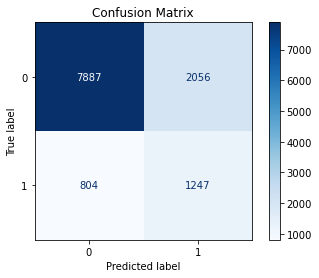

In [83]:
disp = plot_confusion_matrix(clf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<span style="font-size:1em;">✔</span> **Observations:** 
- While the f1-score still isn't great for class 1, compared to the baseline model we have a much higher recall, and is able to predict 61% of the instances that should be 1 as 1, (compared to 16% from the baseline and 54% from the logistic regression model)
- Even the precision is higher, however this model is predicting more classes as 1 than it should when compared to the baseline model. 
- Considering the class imbalance, all in all the performance is decent, and when training on the full set will only improve. 
- We will thus use this model to make the test predictions

In [85]:
train_X = dataXExpand.to_numpy()
train_y = dataY

In [88]:
len(train_X)

59966

In [89]:
len(train_y)

59966

In [90]:
clf = RandomForestClassifier(max_features = 'auto', max_depth=12, verbose=5, n_jobs = -1, n_estimators=500,min_samples_split=5, class_weight=class_weights[1],criterion='gini', random_state=0)
clf.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500building tree 5 of 500

building tree 6 of 500
building tree 7 of 500
building tree 8 of 500building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500

building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500building tree 18 of 500

building tree 19 of 500building tree 20 of 500
building tree 21 of 500
building tree 22 of 500

building tree 23 of 500
building tree 24 of 500
building tree 25 of 500building tree 26 of 500

building tree 27 of 500building tree 28 of 500

building tree 29 of 500building tree 30 of 500
building tree 31 of 500

building tree 32 of 500building tree 33 of 500

building tree 34 of 500
building tree 35 of 500building tree 36 of 500

building tree 37 of 500building tree 38 of 500building tree 39 of 500

building tree 40 of 500
building tree 41 of 500building tree 42 of 500


b

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.0s


building tree 61 of 500
building tree 62 of 500building tree 63 of 500building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500building tree 69 of 500

building tree 70 of 500

building tree 71 of 500building tree 72 of 500


building tree 73 of 500building tree 74 of 500
building tree 75 of 500

building tree 76 of 500building tree 77 of 500building tree 78 of 500building tree 79 of 500


building tree 80 of 500

building tree 81 of 500building tree 82 of 500

building tree 83 of 500
building tree 84 of 500
building tree 85 of 500building tree 86 of 500

building tree 87 of 500building tree 88 of 500

building tree 89 of 500
building tree 90 of 500building tree 91 of 500building tree 92 of 500
building tree 93 of 500


building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500building tree 99 of 500

building tree 100 of 500building tree 101 of 500
building tree 1

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.6s


building tree 157 of 500
building tree 158 of 500building tree 159 of 500

building tree 160 of 500building tree 161 of 500
building tree 162 of 500building tree 163 of 500

building tree 164 of 500building tree 165 of 500building tree 166 of 500

building tree 167 of 500


building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500building tree 173 of 500

building tree 174 of 500
building tree 175 of 500building tree 176 of 500
building tree 177 of 500building tree 178 of 500

building tree 179 of 500
building tree 180 of 500

building tree 181 of 500building tree 182 of 500
building tree 183 of 500building tree 184 of 500
building tree 185 of 500building tree 186 of 500



building tree 187 of 500
building tree 188 of 500building tree 189 of 500building tree 190 of 500

building tree 191 of 500building tree 192 of 500


building tree 193 of 500building tree 194 of 500

building tree 195 of 500building tree 196 of 500



[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   27.2s


building tree 277 of 500building tree 278 of 500

building tree 279 of 500building tree 280 of 500

building tree 281 of 500building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500

building tree 286 of 500building tree 287 of 500building tree 288 of 500


building tree 289 of 500building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500building tree 294 of 500building tree 295 of 500


building tree 296 of 500
building tree 297 of 500

building tree 298 of 500building tree 299 of 500building tree 300 of 500


building tree 301 of 500building tree 302 of 500
building tree 303 of 500
building tree 304 of 500building tree 305 of 500building tree 306 of 500
building tree 307 of 500



building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500building tree 314 of 500building tree 315 of 500
building tree 316 of 500bui

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   44.5s


building tree 444 of 500
building tree 445 of 500building tree 446 of 500building tree 447 of 500building tree 448 of 500

building tree 449 of 500building tree 450 of 500building tree 451 of 500

building tree 452 of 500

building tree 453 of 500
building tree 454 of 500
building tree 455 of 500


building tree 456 of 500
building tree 457 of 500
building tree 458 of 500building tree 459 of 500
building tree 460 of 500building tree 461 of 500

building tree 462 of 500building tree 463 of 500

building tree 464 of 500
building tree 465 of 500

building tree 466 of 500building tree 467 of 500

building tree 468 of 500
building tree 469 of 500
building tree 470 of 500building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500building tree 475 of 500building tree 476 of 500



building tree 477 of 500building tree 478 of 500
building tree 479 of 500

building tree 480 of 500
building tree 481 of 500building tree 482 of 500
building tree 483 of 500bu

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.7s finished


RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=12,
                       min_samples_split=5, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=5)

In [110]:
test_df = pd.read_csv('test_data.csv')
test_df = test_df.drop('ID', axis=1)
test_df = test_df.drop('HealthServiceArea', axis=1)

In [111]:
# obtaining the index value of the row to remove
test_df[test_df['APRSeverityOfIllnessCode'] == 4]

Gender                    Race TypeOfAdmission  CCSProcedureCode  \
112      F  Black/African American         Newborn               216   

     APRSeverityOfIllnessCode PaymentTypology  BirthWeight  \
112                         4        Medicaid         2500   

    EmergencyDepartmentIndicator  AverageCostInCounty  AverageChargesInCounty  \
112                            N                 2756                    6179   

     AverageCostInFacility  AverageChargesInFacility  AverageIncomeInZipCode  
112                   2941                      5800                      68

In [112]:
# obtaining the index value of the row to remove
test_df[test_df['Gender'] == 'U']

Gender   Race TypeOfAdmission  CCSProcedureCode  \
57922      U  White         Newborn                 0   
58232      U  White         Newborn                 0   

       APRSeverityOfIllnessCode PaymentTypology  BirthWeight  \
57922                         1        Medicaid         3700   
58232                         1        Medicaid         3500   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
57922                            N                 2377   
58232                            N                 2377   

       AverageChargesInCounty  AverageCostInFacility  \
57922                    7224                   2618   
58232                    7224                   2618   

       AverageChargesInFacility  AverageIncomeInZipCode  
57922                      5977                      83  
58232                      5977                      83

In [113]:
# obtaining the index value of the row to remove
test_df[test_df['TypeOfAdmission'] == 'Trauma']

Gender        Race TypeOfAdmission  CCSProcedureCode  \
40910      M  Other Race          Trauma               115   

       APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
40910                         1  Private Health Insurance         2800   

      EmergencyDepartmentIndicator  AverageCostInCounty  \
40910                            N                 1719   

       AverageChargesInCounty  AverageCostInFacility  \
40910                    3028                    828   

       AverageChargesInFacility  AverageIncomeInZipCode  
40910                      1876                      41

In [114]:
test_df = test_df.drop([112, 57922, 58232,40910])

In [115]:
for col in test_df.columns:
    if test_df[col].dtype == object:
        test_df[col] = test_df[col].astype('category')
        
dataXExpand = pd.get_dummies(test_df)
dataXExpand.head()
        

CCSProcedureCode  APRSeverityOfIllnessCode  BirthWeight  \
0               216                         3         4900   
1               220                         1         3100   
2               115                         1         3300   
3               228                         1         3300   
4               220                         2         3800   

   AverageCostInCounty  AverageChargesInCounty  AverageCostInFacility  \
0                 3242                    8966                   2448   
1                 2611                    9227                   1751   
2                 3155                   11381                   1052   
3                 2611                    9227                   3790   
4                 3155                   11381                   3032   

   AverageChargesInFacility  AverageIncomeInZipCode  Gender_F  Gender_M  \
0                     13196                      34         1         0   
1                      8951                      45         1         0   
2                     11314                      74         0         1   
3                      6250                      45         0         1   
4                     10135                      59         1         0   

   Race_Black/African American  Race_Multi-racial  Race_Other Race  \
0                            0                  0                1   
1                            0                  0                0   
2                            0                  1                0   
3                            0                  0                1   
4                            0                  0                1   

   Race_White  TypeOfAdmission_Elective  TypeOfAdmission_Emergency  \
0           0                         0                          0   
1           1                         0                          0   
2           0                         0                          0   
3           0                         0                          0   
4           0                         0                          0   

   TypeOfAdmission_Newborn  TypeOfAdmission_Urgent  \
0                        1                       0   
1                        1                       0   
2                        1                       0   
3                        1                       0   
4                        1                       0   

   PaymentTypology_Blue Cross/Blue Shield  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   PaymentTypology_Department of Corrections  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   PaymentTypology_Federal/State/Local/VA  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   PaymentTypology_Managed Care, Unspecified  PaymentTypology_Medicaid  \
0                                          0                         1   
1                                          0                         1   
2                                          0                         1   
3                                          0                         1   
4                                          0                         1   

   PaymentTypology_Medicare  PaymentTypology_Miscellaneous/Other  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                        

In [116]:
test_X = dataXExpand.to_numpy()

In [117]:
len(test_X)

69173

In [118]:
test_pred = clf.predict(test_X)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    6.8s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    7.9s finished


In [120]:
len(test_pred)

69173

In [121]:
output = pd.DataFrame(test_pred)

In [122]:
output

0
0      0
1      0
2      0
3      0
4      0
...   ..
69168  0
69169  0
69170  0
69171  0
69172  0

[69173 rows x 1 columns]

In [125]:
output.to_csv('test_predictions.csv')